In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Prakasam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
2557,2794,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.31,0.11,0.20,...,118.0,1029.0,180.0,4.54,0.76,0.63,1.96,0.62,8.60,Cotton
2558,2795,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.65,0.08,0.12,...,75.0,327.0,126.0,2.69,0.58,0.52,15.92,0.60,2.48,Cotton
2559,2796,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.74,0.05,0.13,...,64.0,381.0,137.0,2.14,0.26,0.46,10.92,0.66,15.36,Cotton
2560,2797,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,6.31,0.03,0.16,...,129.0,445.0,124.0,2.33,0.18,0.44,7.72,0.62,16.22,Cotton
2561,2798,15.49,79.5,Prakasam,Kanigiri,Baduguleru,Red,8.60,0.09,0.09,...,62.0,451.0,163.0,2.93,0.24,0.49,0.92,0.28,4.76,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.689732,0.334247,0.367505,12.356082,201.072165,1851.701031,413.552577,18.865711,0.530144,1.198804,10.746969,1.190186,11.690330
std,1.100884,1.313235,0.275873,10.092348,172.494236,1443.287141,372.891704,58.008623,0.570159,1.293075,10.337956,0.691945,5.422488
min,4.650000,0.010000,0.010000,1.030000,22.000000,67.000000,17.000000,0.850000,0.030000,0.100000,0.040000,0.060000,0.010000
25%,6.800000,0.070000,0.160000,5.500000,99.000000,485.000000,118.000000,2.670000,0.270000,0.400000,3.840000,0.670000,8.100000
50%,8.180000,0.140000,0.310000,9.470000,148.000000,1776.000000,296.000000,5.040000,0.380000,0.770000,6.650000,1.040000,10.770000
75%,8.520000,0.260000,0.490000,16.380000,235.000000,2846.000000,610.000000,13.970000,0.590000,1.510000,14.860000,1.580000,14.040000
max,9.600000,25.200000,1.940000,83.720000,1529.000000,6745.000000,2017.000000,1015.650000,8.790000,11.850000,73.160000,4.510000,39.840000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'Paddy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black', 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df = df[df['SoilType'] != 'Paddy']
df.SoilType.unique()

array(['Red Soil', 'Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 402, 'Black Soil': 82}

<BarContainer object of 2 artists>

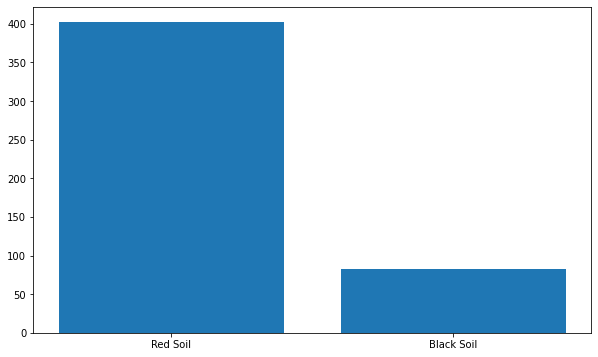

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Cowpea', 'Paddy', 'Pigeonpea', 'Green gram', 'Cow pea',
       'Tobacco', 'Maize', 'Blackgram', 'Chilli', 'Prawns', 'chickpea'],
      dtype=object)

In [14]:
df['Crop'].value_counts()

Cowpea        201
Cotton         87
Paddy          82
Pigeonpea      45
Tobacco        33
Blackgram      11
Maize          10
chickpea        5
Green gram      3
Prawns          3
Chilli          2
Cow pea         2
Name: Crop, dtype: int64

CowPea    203
Cotton     87
Paddy      82
Name: Crop, dtype: int64


<BarContainer object of 3 artists>

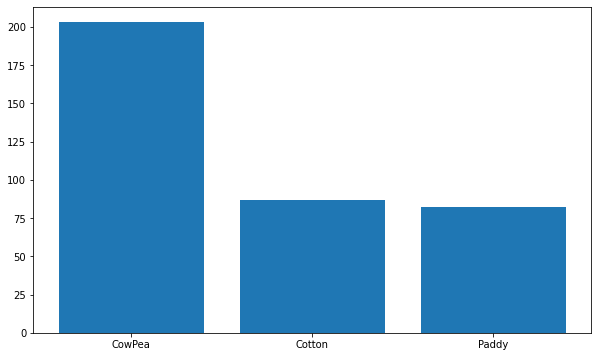

In [15]:
df['Crop'] = df['Crop'].replace('Pigeonpea', 'PigeonPea')
df['Crop'] = df['Crop'].replace(['Cow pea', 'Cowpea'], 'CowPea')
df = df[(df['Crop'] != 'Prawns') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Green gram') & (df['Crop'] != 'chickpea') & (df['Crop'] != 'Maize') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'PigeonPea')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.225520,0.627646,0.145641,0.349761,0.710387,0.644894,0.306670,0.121496,0.562174,0.048194,0.365111,-0.196076
EC,0.225520,1.000000,0.180770,0.106842,0.269661,0.134513,0.266220,0.883446,0.047044,0.671055,0.084508,0.143672,-0.001015
OC,0.627646,0.180770,1.000000,0.347283,0.473994,0.553400,0.684945,0.280316,0.255104,0.634237,0.276063,0.522492,0.112950
P,0.145641,0.106842,0.347283,1.000000,0.496825,0.023922,0.320879,0.213843,0.198732,0.353209,0.439109,0.357966,0.056772
K,0.349761,0.269661,0.473994,0.496825,1.000000,0.147653,0.296714,0.273834,0.129357,0.456390,0.101086,0.301687,0.089939
Ca,0.710387,0.134513,0.553400,0.023922,0.147653,1.000000,0.659068,0.243673,0.036824,0.371171,0.096660,0.403835,0.007595
Mg,0.644894,0.266220,0.684945,0.320879,0.296714,0.659068,1.000000,0.468273,0.143484,0.647208,0.458539,0.718345,0.050831
S,0.306670,0.883446,0.280316,0.213843,0.273834,0.243673,0.468273,1.000000,0.098609,0.752408,0.276360,0.336935,0.016358
Zn,0.121496,0.047044,0.255104,0.198732,0.129357,0.036824,0.143484,0.098609,1.000000,0.191370,0.127318,0.272886,0.083235
B,0.562174,0.671055,0.634237,0.353209,0.456390,0.371171,0.647208,0.752408,0.191370,1.000000,0.284794,0.454291,-0.028914


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['OC', 'Ca', 'Mg', 'S', 'B', 'Cu']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'P', 'K', 'Zn', 'Fe', 'Mn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC      P      K    Zn    Fe   Mn  Black Soil  Red Soil
2557  8.31  0.11  10.71  118.0  0.76  1.96  8.6           0         1
2557    Cotton
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:7] = sc.fit_transform(X[:, 0:7])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6862745098039216


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.04 %
Standard Deviation: 3.88 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6993464052287581


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 62.46 %
Standard Deviation: 5.15 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.92 %
Standard Deviation: 3.13 %


In [38]:
pickle.dump(clf3_3, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7516339869281046


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.40 %
Standard Deviation: 5.10 %


In [44]:
pickle.dump(clf4_4, open('Prakasam_model.pkl', 'wb'))
pickle.dump(sc2, open('Prakasam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7214912280701754
Testing Accuracy:  0.6993464052287581


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 62.71 %
Standard Deviation: 6.65 %


# Catboost

In [49]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.9171602	total: 143ms	remaining: 14.2s
1:	learn: 0.8616617	total: 144ms	remaining: 7.04s
2:	learn: 0.8475446	total: 144ms	remaining: 4.67s
3:	learn: 0.8158559	total: 145ms	remaining: 3.48s
4:	learn: 0.8044864	total: 145ms	remaining: 2.76s
5:	learn: 0.7845437	total: 146ms	remaining: 2.29s
6:	learn: 0.7698287	total: 146ms	remaining: 1.95s
7:	learn: 0.7476408	total: 147ms	remaining: 1.69s
8:	learn: 0.7285889	total: 147ms	remaining: 1.49s
9:	learn: 0.7048116	total: 148ms	remaining: 1.33s
10:	learn: 0.6988527	total: 149ms	remaining: 1.2s
11:	learn: 0.6939034	total: 149ms	remaining: 1.09s
12:	learn: 0.6679116	total: 150ms	remaining: 1s
13:	learn: 0.6361098	total: 151ms	remaining: 929ms
14:	learn: 0.6206133	total: 152ms	remaining: 860ms
15:	learn: 0.6174459	total: 152ms	remaining: 800ms
16:	learn: 0.6066981	total: 153ms	remaining: 746ms
17:	learn: 0.6009466	total: 153ms	remaining: 699ms
18:	learn: 0.5959469	total: 154ms	remaining: 657ms
19:	learn: 0.5837467	total: 155ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9173393937
bestIteration = 99

Training on fold [1/5]

bestTest = 0.8195341552
bestIteration = 99

Training on fold [2/5]

bestTest = 0.8467955626
bestIteration = 98

Training on fold [3/5]

bestTest = 0.8818903805
bestIteration = 99

Training on fold [4/5]

bestTest = 0.8512938181
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0887134	test: 1.0901510	best: 1.0901510 (0)	total: 1.31ms	remaining: 1.31s
1:	learn: 1.0756156	test: 1.0819311	best: 1.0819311 (1)	total: 2.43ms	remaining: 1.21s
2:	learn: 1.0647752	test: 1.0711817	best: 1.0711817 (2)	total: 3.44ms	remaining: 1.14s
3:	learn: 1.0570075	test: 1.0658242	best: 1.0658242 (3)	total: 4.38ms	remaining: 1.09s
4:	learn: 1.0472129	test: 1.0569985	best: 1.0569985 (4)	total: 5.43ms	remaining: 1.08s
5:	learn: 1.0391642	test: 1.0509063	best: 1.0509063 (5)	total: 6.38ms	remaining: 1.06s
6:	learn: 1.0304496	test: 1.0435732	best: 1.0435732 (6)	total: 7.42ms	remaining: 1.05s
7:	learn: 1.0239159	test: 1.0382913	best: 1.0382913 (7)	total: 8.46ms	remaining: 1.05s
8:	learn: 1.0156355	test: 1.0316351	best: 1.0316351 (8)	total: 9.45ms	remaining: 1.04s
9:	learn: 1.0070391	test: 1.0244515	best: 1.0244515 (9)	total: 10.4ms	remaining: 1.03s
10:	learn: 1.0009918	test: 1.0203190	best: 1.0203190 (10)	total: 11.5ms	remaining: 1.03s
11:	learn: 0.9942852	test: 1.0150191	best

133:	learn: 0.6766773	test: 0.8200126	best: 0.8200126 (133)	total: 163ms	remaining: 1.05s
134:	learn: 0.6758725	test: 0.8200711	best: 0.8200126 (133)	total: 165ms	remaining: 1.06s
135:	learn: 0.6750589	test: 0.8191979	best: 0.8191979 (135)	total: 166ms	remaining: 1.06s
136:	learn: 0.6737105	test: 0.8181761	best: 0.8181761 (136)	total: 168ms	remaining: 1.06s
137:	learn: 0.6717956	test: 0.8182132	best: 0.8181761 (136)	total: 170ms	remaining: 1.06s
138:	learn: 0.6708180	test: 0.8182591	best: 0.8181761 (136)	total: 171ms	remaining: 1.06s
139:	learn: 0.6702219	test: 0.8175891	best: 0.8175891 (139)	total: 172ms	remaining: 1.06s
140:	learn: 0.6692332	test: 0.8184973	best: 0.8175891 (139)	total: 174ms	remaining: 1.06s
141:	learn: 0.6669500	test: 0.8166065	best: 0.8166065 (141)	total: 175ms	remaining: 1.06s
142:	learn: 0.6651305	test: 0.8150568	best: 0.8150568 (142)	total: 176ms	remaining: 1.06s
143:	learn: 0.6641337	test: 0.8149388	best: 0.8149388 (143)	total: 178ms	remaining: 1.06s
144:	learn

256:	learn: 0.5541508	test: 0.7692856	best: 0.7691149 (254)	total: 335ms	remaining: 967ms
257:	learn: 0.5527305	test: 0.7693482	best: 0.7691149 (254)	total: 336ms	remaining: 967ms
258:	learn: 0.5521497	test: 0.7690036	best: 0.7690036 (258)	total: 338ms	remaining: 966ms
259:	learn: 0.5511590	test: 0.7689091	best: 0.7689091 (259)	total: 339ms	remaining: 965ms
260:	learn: 0.5503562	test: 0.7681665	best: 0.7681665 (260)	total: 340ms	remaining: 963ms
261:	learn: 0.5497757	test: 0.7676522	best: 0.7676522 (261)	total: 341ms	remaining: 962ms
262:	learn: 0.5490658	test: 0.7673952	best: 0.7673952 (262)	total: 343ms	remaining: 960ms
263:	learn: 0.5481636	test: 0.7668843	best: 0.7668843 (263)	total: 344ms	remaining: 958ms
264:	learn: 0.5468993	test: 0.7652709	best: 0.7652709 (264)	total: 345ms	remaining: 956ms
265:	learn: 0.5466308	test: 0.7653863	best: 0.7652709 (264)	total: 346ms	remaining: 955ms
266:	learn: 0.5454592	test: 0.7651146	best: 0.7651146 (266)	total: 347ms	remaining: 954ms
267:	learn

384:	learn: 0.4595802	test: 0.7334484	best: 0.7334484 (384)	total: 507ms	remaining: 809ms
385:	learn: 0.4593876	test: 0.7334293	best: 0.7334293 (385)	total: 509ms	remaining: 809ms
386:	learn: 0.4586527	test: 0.7335094	best: 0.7334293 (385)	total: 510ms	remaining: 808ms
387:	learn: 0.4583028	test: 0.7334730	best: 0.7334293 (385)	total: 512ms	remaining: 808ms
388:	learn: 0.4575734	test: 0.7333978	best: 0.7333978 (388)	total: 514ms	remaining: 807ms
389:	learn: 0.4572159	test: 0.7331129	best: 0.7331129 (389)	total: 515ms	remaining: 805ms
390:	learn: 0.4565692	test: 0.7331200	best: 0.7331129 (389)	total: 516ms	remaining: 804ms
391:	learn: 0.4557709	test: 0.7322444	best: 0.7322444 (391)	total: 518ms	remaining: 804ms
392:	learn: 0.4550820	test: 0.7325434	best: 0.7322444 (391)	total: 519ms	remaining: 802ms
393:	learn: 0.4546101	test: 0.7319023	best: 0.7319023 (393)	total: 521ms	remaining: 801ms
394:	learn: 0.4538833	test: 0.7317752	best: 0.7317752 (394)	total: 522ms	remaining: 799ms
395:	learn

520:	learn: 0.3859696	test: 0.7179384	best: 0.7177001 (518)	total: 678ms	remaining: 623ms
521:	learn: 0.3855083	test: 0.7174837	best: 0.7174837 (521)	total: 679ms	remaining: 622ms
522:	learn: 0.3851507	test: 0.7176949	best: 0.7174837 (521)	total: 681ms	remaining: 621ms
523:	learn: 0.3845887	test: 0.7171404	best: 0.7171404 (523)	total: 682ms	remaining: 619ms
524:	learn: 0.3843414	test: 0.7166964	best: 0.7166964 (524)	total: 683ms	remaining: 618ms
525:	learn: 0.3838134	test: 0.7164395	best: 0.7164395 (525)	total: 684ms	remaining: 616ms
526:	learn: 0.3834941	test: 0.7162342	best: 0.7162342 (526)	total: 685ms	remaining: 615ms
527:	learn: 0.3828841	test: 0.7156020	best: 0.7156020 (527)	total: 686ms	remaining: 613ms
528:	learn: 0.3823359	test: 0.7157802	best: 0.7156020 (527)	total: 687ms	remaining: 612ms
529:	learn: 0.3819937	test: 0.7157406	best: 0.7156020 (527)	total: 688ms	remaining: 610ms
530:	learn: 0.3813846	test: 0.7153822	best: 0.7153822 (530)	total: 689ms	remaining: 609ms
531:	learn

670:	learn: 0.3279828	test: 0.7037707	best: 0.7034396 (669)	total: 850ms	remaining: 417ms
671:	learn: 0.3276002	test: 0.7040436	best: 0.7034396 (669)	total: 852ms	remaining: 416ms
672:	learn: 0.3270479	test: 0.7034703	best: 0.7034396 (669)	total: 853ms	remaining: 414ms
673:	learn: 0.3266597	test: 0.7037382	best: 0.7034396 (669)	total: 854ms	remaining: 413ms
674:	learn: 0.3263292	test: 0.7038548	best: 0.7034396 (669)	total: 855ms	remaining: 412ms
675:	learn: 0.3260075	test: 0.7033387	best: 0.7033387 (675)	total: 856ms	remaining: 410ms
676:	learn: 0.3255830	test: 0.7034817	best: 0.7033387 (675)	total: 858ms	remaining: 409ms
677:	learn: 0.3254267	test: 0.7036573	best: 0.7033387 (675)	total: 859ms	remaining: 408ms
678:	learn: 0.3250563	test: 0.7031466	best: 0.7031466 (678)	total: 860ms	remaining: 407ms
679:	learn: 0.3246681	test: 0.7030388	best: 0.7030388 (679)	total: 861ms	remaining: 405ms
680:	learn: 0.3242288	test: 0.7026653	best: 0.7026653 (680)	total: 862ms	remaining: 404ms
681:	learn

814:	learn: 0.2827699	test: 0.6942960	best: 0.6942622 (813)	total: 1.02s	remaining: 232ms
815:	learn: 0.2824684	test: 0.6943590	best: 0.6942622 (813)	total: 1.02s	remaining: 231ms
816:	learn: 0.2818126	test: 0.6943607	best: 0.6942622 (813)	total: 1.02s	remaining: 230ms
817:	learn: 0.2815671	test: 0.6942005	best: 0.6942005 (817)	total: 1.03s	remaining: 229ms
818:	learn: 0.2812552	test: 0.6945435	best: 0.6942005 (817)	total: 1.03s	remaining: 227ms
819:	learn: 0.2811130	test: 0.6944566	best: 0.6942005 (817)	total: 1.03s	remaining: 226ms
820:	learn: 0.2809239	test: 0.6943176	best: 0.6942005 (817)	total: 1.03s	remaining: 225ms
821:	learn: 0.2804378	test: 0.6940185	best: 0.6940185 (821)	total: 1.03s	remaining: 223ms
822:	learn: 0.2801788	test: 0.6941869	best: 0.6940185 (821)	total: 1.03s	remaining: 222ms
823:	learn: 0.2800065	test: 0.6944137	best: 0.6940185 (821)	total: 1.03s	remaining: 221ms
824:	learn: 0.2797103	test: 0.6941940	best: 0.6940185 (821)	total: 1.03s	remaining: 220ms
825:	learn

932:	learn: 0.2539338	test: 0.6911793	best: 0.6905905 (902)	total: 1.19s	remaining: 85.5ms
933:	learn: 0.2537867	test: 0.6914602	best: 0.6905905 (902)	total: 1.19s	remaining: 84.3ms
934:	learn: 0.2536235	test: 0.6912455	best: 0.6905905 (902)	total: 1.19s	remaining: 83ms
935:	learn: 0.2533491	test: 0.6911980	best: 0.6905905 (902)	total: 1.19s	remaining: 81.7ms
936:	learn: 0.2531240	test: 0.6913556	best: 0.6905905 (902)	total: 1.2s	remaining: 80.4ms
937:	learn: 0.2528940	test: 0.6907988	best: 0.6905905 (902)	total: 1.2s	remaining: 79.2ms
938:	learn: 0.2526177	test: 0.6906780	best: 0.6905905 (902)	total: 1.2s	remaining: 77.9ms
939:	learn: 0.2523223	test: 0.6906677	best: 0.6905905 (902)	total: 1.2s	remaining: 76.6ms
940:	learn: 0.2522101	test: 0.6905565	best: 0.6905565 (940)	total: 1.2s	remaining: 75.3ms
941:	learn: 0.2520742	test: 0.6906108	best: 0.6905565 (940)	total: 1.2s	remaining: 74ms
942:	learn: 0.2519475	test: 0.6906063	best: 0.6905565 (940)	total: 1.2s	remaining: 72.7ms
943:	learn

82:	learn: 0.5374553	test: 0.7747946	best: 0.7747871 (81)	total: 93.4ms	remaining: 1.03s
83:	learn: 0.5340357	test: 0.7745042	best: 0.7745042 (83)	total: 94.7ms	remaining: 1.03s
84:	learn: 0.5325326	test: 0.7756697	best: 0.7745042 (83)	total: 96ms	remaining: 1.03s
85:	learn: 0.5309417	test: 0.7742440	best: 0.7742440 (85)	total: 97.4ms	remaining: 1.03s
86:	learn: 0.5285213	test: 0.7747815	best: 0.7742440 (85)	total: 98.6ms	remaining: 1.03s
87:	learn: 0.5265017	test: 0.7743047	best: 0.7742440 (85)	total: 99.8ms	remaining: 1.03s
88:	learn: 0.5227651	test: 0.7705367	best: 0.7705367 (88)	total: 101ms	remaining: 1.03s
89:	learn: 0.5202311	test: 0.7689236	best: 0.7689236 (89)	total: 102ms	remaining: 1.03s
90:	learn: 0.5165318	test: 0.7679086	best: 0.7679086 (90)	total: 103ms	remaining: 1.03s
91:	learn: 0.5139484	test: 0.7643608	best: 0.7643608 (91)	total: 104ms	remaining: 1.03s
92:	learn: 0.5108476	test: 0.7619186	best: 0.7619186 (92)	total: 105ms	remaining: 1.03s
93:	learn: 0.5087473	test: 0

217:	learn: 0.3089483	test: 0.7177290	best: 0.7163582 (201)	total: 256ms	remaining: 918ms
218:	learn: 0.3076284	test: 0.7177831	best: 0.7163582 (201)	total: 257ms	remaining: 917ms
219:	learn: 0.3060698	test: 0.7182556	best: 0.7163582 (201)	total: 259ms	remaining: 917ms
220:	learn: 0.3046844	test: 0.7178694	best: 0.7163582 (201)	total: 260ms	remaining: 916ms
221:	learn: 0.3036982	test: 0.7166313	best: 0.7163582 (201)	total: 261ms	remaining: 915ms
222:	learn: 0.3026702	test: 0.7156805	best: 0.7156805 (222)	total: 262ms	remaining: 914ms
223:	learn: 0.3009229	test: 0.7146691	best: 0.7146691 (223)	total: 263ms	remaining: 913ms
224:	learn: 0.2996764	test: 0.7136668	best: 0.7136668 (224)	total: 265ms	remaining: 911ms
225:	learn: 0.2988261	test: 0.7137688	best: 0.7136668 (224)	total: 266ms	remaining: 911ms
226:	learn: 0.2974643	test: 0.7118029	best: 0.7118029 (226)	total: 267ms	remaining: 909ms
227:	learn: 0.2963658	test: 0.7106620	best: 0.7106620 (227)	total: 268ms	remaining: 908ms
228:	learn

383:	learn: 0.1895546	test: 0.6913890	best: 0.6912241 (375)	total: 442ms	remaining: 710ms
384:	learn: 0.1892515	test: 0.6915399	best: 0.6912241 (375)	total: 444ms	remaining: 709ms
385:	learn: 0.1891125	test: 0.6916765	best: 0.6912241 (375)	total: 445ms	remaining: 707ms
386:	learn: 0.1885474	test: 0.6915504	best: 0.6912241 (375)	total: 446ms	remaining: 707ms
387:	learn: 0.1881465	test: 0.6915291	best: 0.6912241 (375)	total: 448ms	remaining: 706ms
388:	learn: 0.1876572	test: 0.6913172	best: 0.6912241 (375)	total: 449ms	remaining: 705ms
389:	learn: 0.1871815	test: 0.6921187	best: 0.6912241 (375)	total: 450ms	remaining: 704ms
390:	learn: 0.1866187	test: 0.6928808	best: 0.6912241 (375)	total: 451ms	remaining: 702ms
391:	learn: 0.1859676	test: 0.6918552	best: 0.6912241 (375)	total: 452ms	remaining: 701ms
392:	learn: 0.1853774	test: 0.6921036	best: 0.6912241 (375)	total: 453ms	remaining: 700ms
393:	learn: 0.1849962	test: 0.6918135	best: 0.6912241 (375)	total: 454ms	remaining: 699ms
394:	learn

506:	learn: 0.1416456	test: 0.6958937	best: 0.6867097 (420)	total: 603ms	remaining: 587ms
507:	learn: 0.1412442	test: 0.6943402	best: 0.6867097 (420)	total: 605ms	remaining: 586ms
508:	learn: 0.1408907	test: 0.6948674	best: 0.6867097 (420)	total: 606ms	remaining: 585ms
509:	learn: 0.1406251	test: 0.6951250	best: 0.6867097 (420)	total: 608ms	remaining: 584ms
510:	learn: 0.1402220	test: 0.6950881	best: 0.6867097 (420)	total: 609ms	remaining: 582ms
511:	learn: 0.1400376	test: 0.6944782	best: 0.6867097 (420)	total: 610ms	remaining: 581ms
512:	learn: 0.1395316	test: 0.6954638	best: 0.6867097 (420)	total: 611ms	remaining: 580ms
513:	learn: 0.1393495	test: 0.6956627	best: 0.6867097 (420)	total: 612ms	remaining: 579ms
514:	learn: 0.1391231	test: 0.6952905	best: 0.6867097 (420)	total: 613ms	remaining: 578ms
515:	learn: 0.1388063	test: 0.6947130	best: 0.6867097 (420)	total: 614ms	remaining: 576ms
516:	learn: 0.1385301	test: 0.6940716	best: 0.6867097 (420)	total: 616ms	remaining: 575ms
517:	learn

663:	learn: 0.1036500	test: 0.6989687	best: 0.6867097 (420)	total: 781ms	remaining: 395ms
664:	learn: 0.1035313	test: 0.6990713	best: 0.6867097 (420)	total: 782ms	remaining: 394ms
665:	learn: 0.1034789	test: 0.6990158	best: 0.6867097 (420)	total: 784ms	remaining: 393ms
666:	learn: 0.1032442	test: 0.6989746	best: 0.6867097 (420)	total: 785ms	remaining: 392ms
667:	learn: 0.1029827	test: 0.6986912	best: 0.6867097 (420)	total: 786ms	remaining: 391ms
668:	learn: 0.1027351	test: 0.6983633	best: 0.6867097 (420)	total: 787ms	remaining: 390ms
669:	learn: 0.1026596	test: 0.6987393	best: 0.6867097 (420)	total: 788ms	remaining: 388ms
670:	learn: 0.1025062	test: 0.6990384	best: 0.6867097 (420)	total: 789ms	remaining: 387ms
671:	learn: 0.1023196	test: 0.6979686	best: 0.6867097 (420)	total: 790ms	remaining: 386ms
672:	learn: 0.1021090	test: 0.6966927	best: 0.6867097 (420)	total: 792ms	remaining: 385ms
673:	learn: 0.1018049	test: 0.6969174	best: 0.6867097 (420)	total: 793ms	remaining: 383ms
674:	learn

812:	learn: 0.0804822	test: 0.6978932	best: 0.6867097 (420)	total: 951ms	remaining: 219ms
813:	learn: 0.0802426	test: 0.6963893	best: 0.6867097 (420)	total: 952ms	remaining: 218ms
814:	learn: 0.0799441	test: 0.6968555	best: 0.6867097 (420)	total: 954ms	remaining: 217ms
815:	learn: 0.0796986	test: 0.6974058	best: 0.6867097 (420)	total: 955ms	remaining: 215ms
816:	learn: 0.0795388	test: 0.6970142	best: 0.6867097 (420)	total: 957ms	remaining: 214ms
817:	learn: 0.0794474	test: 0.6964579	best: 0.6867097 (420)	total: 958ms	remaining: 213ms
818:	learn: 0.0793507	test: 0.6966561	best: 0.6867097 (420)	total: 959ms	remaining: 212ms
819:	learn: 0.0791989	test: 0.6963340	best: 0.6867097 (420)	total: 960ms	remaining: 211ms
820:	learn: 0.0791613	test: 0.6963583	best: 0.6867097 (420)	total: 961ms	remaining: 210ms
821:	learn: 0.0788647	test: 0.6957892	best: 0.6867097 (420)	total: 962ms	remaining: 208ms
822:	learn: 0.0787348	test: 0.6961252	best: 0.6867097 (420)	total: 964ms	remaining: 207ms
823:	learn

962:	learn: 0.0641381	test: 0.6988815	best: 0.6867097 (420)	total: 1.12s	remaining: 43.1ms
963:	learn: 0.0640726	test: 0.6984845	best: 0.6867097 (420)	total: 1.12s	remaining: 42ms
964:	learn: 0.0640028	test: 0.6983393	best: 0.6867097 (420)	total: 1.13s	remaining: 40.8ms
965:	learn: 0.0638870	test: 0.6987180	best: 0.6867097 (420)	total: 1.13s	remaining: 39.6ms
966:	learn: 0.0638079	test: 0.6987055	best: 0.6867097 (420)	total: 1.13s	remaining: 38.5ms
967:	learn: 0.0637518	test: 0.6989993	best: 0.6867097 (420)	total: 1.13s	remaining: 37.3ms
968:	learn: 0.0636513	test: 0.6993377	best: 0.6867097 (420)	total: 1.13s	remaining: 36.1ms
969:	learn: 0.0635752	test: 0.6992039	best: 0.6867097 (420)	total: 1.13s	remaining: 35ms
970:	learn: 0.0635375	test: 0.6993402	best: 0.6867097 (420)	total: 1.13s	remaining: 33.8ms
971:	learn: 0.0634713	test: 0.6986051	best: 0.6867097 (420)	total: 1.13s	remaining: 32.7ms
972:	learn: 0.0633952	test: 0.6986341	best: 0.6867097 (420)	total: 1.14s	remaining: 31.5ms
973

98:	learn: 0.6453094	test: 0.8165376	best: 0.8165376 (98)	total: 302ms	remaining: 2.75s
99:	learn: 0.6435663	test: 0.8160754	best: 0.8160754 (99)	total: 305ms	remaining: 2.75s
100:	learn: 0.6413406	test: 0.8154339	best: 0.8154339 (100)	total: 308ms	remaining: 2.74s
101:	learn: 0.6388514	test: 0.8148650	best: 0.8148650 (101)	total: 311ms	remaining: 2.74s
102:	learn: 0.6374056	test: 0.8142007	best: 0.8142007 (102)	total: 314ms	remaining: 2.73s
103:	learn: 0.6354026	test: 0.8137649	best: 0.8137649 (103)	total: 317ms	remaining: 2.73s
104:	learn: 0.6336396	test: 0.8130888	best: 0.8130888 (104)	total: 322ms	remaining: 2.74s
105:	learn: 0.6313125	test: 0.8122032	best: 0.8122032 (105)	total: 327ms	remaining: 2.75s
106:	learn: 0.6294178	test: 0.8124550	best: 0.8122032 (105)	total: 330ms	remaining: 2.75s
107:	learn: 0.6268070	test: 0.8105966	best: 0.8105966 (107)	total: 332ms	remaining: 2.75s
108:	learn: 0.6257991	test: 0.8102922	best: 0.8102922 (108)	total: 336ms	remaining: 2.75s
109:	learn: 0.

224:	learn: 0.4657069	test: 0.7504840	best: 0.7502937 (223)	total: 665ms	remaining: 2.29s
225:	learn: 0.4647390	test: 0.7501854	best: 0.7501854 (225)	total: 669ms	remaining: 2.29s
226:	learn: 0.4638350	test: 0.7500480	best: 0.7500480 (226)	total: 672ms	remaining: 2.29s
227:	learn: 0.4628869	test: 0.7505225	best: 0.7500480 (226)	total: 675ms	remaining: 2.28s
228:	learn: 0.4619325	test: 0.7496209	best: 0.7496209 (228)	total: 678ms	remaining: 2.28s
229:	learn: 0.4608182	test: 0.7496080	best: 0.7496080 (229)	total: 681ms	remaining: 2.28s
230:	learn: 0.4598544	test: 0.7485332	best: 0.7485332 (230)	total: 684ms	remaining: 2.28s
231:	learn: 0.4585798	test: 0.7481739	best: 0.7481739 (231)	total: 687ms	remaining: 2.27s
232:	learn: 0.4576881	test: 0.7473696	best: 0.7473696 (232)	total: 690ms	remaining: 2.27s
233:	learn: 0.4565733	test: 0.7470070	best: 0.7470070 (233)	total: 693ms	remaining: 2.27s
234:	learn: 0.4555277	test: 0.7474472	best: 0.7470070 (233)	total: 695ms	remaining: 2.26s
235:	learn

347:	learn: 0.3510427	test: 0.7222031	best: 0.7219919 (345)	total: 1.01s	remaining: 1.9s
348:	learn: 0.3502449	test: 0.7224699	best: 0.7219919 (345)	total: 1.02s	remaining: 1.9s
349:	learn: 0.3490962	test: 0.7216933	best: 0.7216933 (349)	total: 1.02s	remaining: 1.9s
350:	learn: 0.3483136	test: 0.7216577	best: 0.7216577 (350)	total: 1.02s	remaining: 1.89s
351:	learn: 0.3473340	test: 0.7208680	best: 0.7208680 (351)	total: 1.03s	remaining: 1.89s
352:	learn: 0.3466325	test: 0.7209026	best: 0.7208680 (351)	total: 1.03s	remaining: 1.89s
353:	learn: 0.3460593	test: 0.7211036	best: 0.7208680 (351)	total: 1.03s	remaining: 1.89s
354:	learn: 0.3453318	test: 0.7208445	best: 0.7208445 (354)	total: 1.04s	remaining: 1.88s
355:	learn: 0.3443989	test: 0.7211937	best: 0.7208445 (354)	total: 1.04s	remaining: 1.88s
356:	learn: 0.3434650	test: 0.7205242	best: 0.7205242 (356)	total: 1.04s	remaining: 1.88s
357:	learn: 0.3429842	test: 0.7205577	best: 0.7205242 (356)	total: 1.04s	remaining: 1.87s
358:	learn: 0

477:	learn: 0.2697373	test: 0.7032111	best: 0.7032111 (477)	total: 1.38s	remaining: 1.5s
478:	learn: 0.2692915	test: 0.7034556	best: 0.7032111 (477)	total: 1.38s	remaining: 1.5s
479:	learn: 0.2689468	test: 0.7031817	best: 0.7031817 (479)	total: 1.39s	remaining: 1.5s
480:	learn: 0.2683869	test: 0.7030786	best: 0.7030786 (480)	total: 1.39s	remaining: 1.5s
481:	learn: 0.2677518	test: 0.7030067	best: 0.7030067 (481)	total: 1.39s	remaining: 1.5s
482:	learn: 0.2671271	test: 0.7028486	best: 0.7028486 (482)	total: 1.4s	remaining: 1.49s
483:	learn: 0.2666933	test: 0.7028402	best: 0.7028402 (483)	total: 1.4s	remaining: 1.49s
484:	learn: 0.2659627	test: 0.7033596	best: 0.7028402 (483)	total: 1.4s	remaining: 1.49s
485:	learn: 0.2655223	test: 0.7034670	best: 0.7028402 (483)	total: 1.41s	remaining: 1.49s
486:	learn: 0.2650734	test: 0.7029923	best: 0.7028402 (483)	total: 1.41s	remaining: 1.48s
487:	learn: 0.2645602	test: 0.7030251	best: 0.7028402 (483)	total: 1.41s	remaining: 1.48s
488:	learn: 0.2640

601:	learn: 0.2189413	test: 0.6952893	best: 0.6939030 (590)	total: 1.73s	remaining: 1.14s
602:	learn: 0.2185389	test: 0.6952424	best: 0.6939030 (590)	total: 1.73s	remaining: 1.14s
603:	learn: 0.2181580	test: 0.6948525	best: 0.6939030 (590)	total: 1.73s	remaining: 1.14s
604:	learn: 0.2178546	test: 0.6951131	best: 0.6939030 (590)	total: 1.74s	remaining: 1.13s
605:	learn: 0.2176671	test: 0.6951362	best: 0.6939030 (590)	total: 1.74s	remaining: 1.13s
606:	learn: 0.2171611	test: 0.6949536	best: 0.6939030 (590)	total: 1.74s	remaining: 1.13s
607:	learn: 0.2167736	test: 0.6952836	best: 0.6939030 (590)	total: 1.75s	remaining: 1.13s
608:	learn: 0.2162093	test: 0.6954398	best: 0.6939030 (590)	total: 1.75s	remaining: 1.12s
609:	learn: 0.2158230	test: 0.6956230	best: 0.6939030 (590)	total: 1.75s	remaining: 1.12s
610:	learn: 0.2155326	test: 0.6952526	best: 0.6939030 (590)	total: 1.76s	remaining: 1.12s
611:	learn: 0.2153173	test: 0.6952550	best: 0.6939030 (590)	total: 1.76s	remaining: 1.11s
612:	learn

727:	learn: 0.1805115	test: 0.6924814	best: 0.6908077 (716)	total: 2.09s	remaining: 782ms
728:	learn: 0.1801469	test: 0.6919977	best: 0.6908077 (716)	total: 2.1s	remaining: 779ms
729:	learn: 0.1798330	test: 0.6920496	best: 0.6908077 (716)	total: 2.1s	remaining: 776ms
730:	learn: 0.1795134	test: 0.6917490	best: 0.6908077 (716)	total: 2.1s	remaining: 774ms
731:	learn: 0.1792631	test: 0.6915539	best: 0.6908077 (716)	total: 2.11s	remaining: 771ms
732:	learn: 0.1790972	test: 0.6916218	best: 0.6908077 (716)	total: 2.11s	remaining: 769ms
733:	learn: 0.1788717	test: 0.6916546	best: 0.6908077 (716)	total: 2.12s	remaining: 767ms
734:	learn: 0.1786246	test: 0.6918119	best: 0.6908077 (716)	total: 2.12s	remaining: 764ms
735:	learn: 0.1783199	test: 0.6915613	best: 0.6908077 (716)	total: 2.12s	remaining: 761ms
736:	learn: 0.1781636	test: 0.6918331	best: 0.6908077 (716)	total: 2.12s	remaining: 758ms
737:	learn: 0.1779166	test: 0.6916180	best: 0.6908077 (716)	total: 2.13s	remaining: 756ms
738:	learn: 0

845:	learn: 0.1527441	test: 0.6892662	best: 0.6886095 (797)	total: 2.44s	remaining: 444ms
846:	learn: 0.1525634	test: 0.6891226	best: 0.6886095 (797)	total: 2.44s	remaining: 441ms
847:	learn: 0.1523179	test: 0.6892921	best: 0.6886095 (797)	total: 2.45s	remaining: 439ms
848:	learn: 0.1520392	test: 0.6891948	best: 0.6886095 (797)	total: 2.45s	remaining: 436ms
849:	learn: 0.1519363	test: 0.6889921	best: 0.6886095 (797)	total: 2.45s	remaining: 433ms
850:	learn: 0.1517473	test: 0.6888880	best: 0.6886095 (797)	total: 2.46s	remaining: 430ms
851:	learn: 0.1516256	test: 0.6887955	best: 0.6886095 (797)	total: 2.46s	remaining: 427ms
852:	learn: 0.1514101	test: 0.6886598	best: 0.6886095 (797)	total: 2.46s	remaining: 424ms
853:	learn: 0.1511012	test: 0.6889820	best: 0.6886095 (797)	total: 2.46s	remaining: 421ms
854:	learn: 0.1509202	test: 0.6884780	best: 0.6884780 (854)	total: 2.47s	remaining: 418ms
855:	learn: 0.1506671	test: 0.6883570	best: 0.6883570 (855)	total: 2.47s	remaining: 416ms
856:	learn

975:	learn: 0.1297854	test: 0.6860831	best: 0.6858813 (952)	total: 2.8s	remaining: 68.9ms
976:	learn: 0.1296012	test: 0.6861827	best: 0.6858813 (952)	total: 2.81s	remaining: 66.1ms
977:	learn: 0.1295079	test: 0.6864091	best: 0.6858813 (952)	total: 2.81s	remaining: 63.2ms
978:	learn: 0.1293349	test: 0.6863074	best: 0.6858813 (952)	total: 2.81s	remaining: 60.3ms
979:	learn: 0.1292105	test: 0.6862999	best: 0.6858813 (952)	total: 2.82s	remaining: 57.5ms
980:	learn: 0.1290877	test: 0.6862256	best: 0.6858813 (952)	total: 2.82s	remaining: 54.6ms
981:	learn: 0.1289609	test: 0.6860618	best: 0.6858813 (952)	total: 2.82s	remaining: 51.8ms
982:	learn: 0.1287495	test: 0.6862361	best: 0.6858813 (952)	total: 2.83s	remaining: 48.9ms
983:	learn: 0.1286158	test: 0.6865550	best: 0.6858813 (952)	total: 2.83s	remaining: 46ms
984:	learn: 0.1284520	test: 0.6867265	best: 0.6858813 (952)	total: 2.83s	remaining: 43.1ms
985:	learn: 0.1283224	test: 0.6865915	best: 0.6858813 (952)	total: 2.84s	remaining: 40.3ms
98

97:	learn: 0.3710667	test: 0.7489683	best: 0.7488154 (90)	total: 271ms	remaining: 2.49s
98:	learn: 0.3688773	test: 0.7496514	best: 0.7488154 (90)	total: 274ms	remaining: 2.5s
99:	learn: 0.3676942	test: 0.7480347	best: 0.7480347 (99)	total: 278ms	remaining: 2.5s
100:	learn: 0.3643126	test: 0.7493244	best: 0.7480347 (99)	total: 280ms	remaining: 2.5s
101:	learn: 0.3610583	test: 0.7479353	best: 0.7479353 (101)	total: 283ms	remaining: 2.5s
102:	learn: 0.3595699	test: 0.7468356	best: 0.7468356 (102)	total: 286ms	remaining: 2.49s
103:	learn: 0.3570508	test: 0.7477522	best: 0.7468356 (102)	total: 290ms	remaining: 2.5s
104:	learn: 0.3547588	test: 0.7487526	best: 0.7468356 (102)	total: 294ms	remaining: 2.51s
105:	learn: 0.3532660	test: 0.7487899	best: 0.7468356 (102)	total: 298ms	remaining: 2.51s
106:	learn: 0.3509299	test: 0.7462305	best: 0.7462305 (106)	total: 300ms	remaining: 2.51s
107:	learn: 0.3483814	test: 0.7452556	best: 0.7452556 (107)	total: 303ms	remaining: 2.5s
108:	learn: 0.3461363	t

227:	learn: 0.1721529	test: 0.7254228	best: 0.7201650 (188)	total: 637ms	remaining: 2.16s
228:	learn: 0.1717078	test: 0.7243670	best: 0.7201650 (188)	total: 641ms	remaining: 2.16s
229:	learn: 0.1709510	test: 0.7252792	best: 0.7201650 (188)	total: 644ms	remaining: 2.15s
230:	learn: 0.1704591	test: 0.7247576	best: 0.7201650 (188)	total: 647ms	remaining: 2.15s
231:	learn: 0.1696088	test: 0.7241076	best: 0.7201650 (188)	total: 650ms	remaining: 2.15s
232:	learn: 0.1688754	test: 0.7234885	best: 0.7201650 (188)	total: 653ms	remaining: 2.15s
233:	learn: 0.1681368	test: 0.7236832	best: 0.7201650 (188)	total: 656ms	remaining: 2.15s
234:	learn: 0.1678070	test: 0.7242459	best: 0.7201650 (188)	total: 660ms	remaining: 2.15s
235:	learn: 0.1671950	test: 0.7236726	best: 0.7201650 (188)	total: 662ms	remaining: 2.14s
236:	learn: 0.1663651	test: 0.7236357	best: 0.7201650 (188)	total: 667ms	remaining: 2.15s
237:	learn: 0.1658478	test: 0.7231079	best: 0.7201650 (188)	total: 670ms	remaining: 2.14s
238:	learn

349:	learn: 0.1057057	test: 0.7229297	best: 0.7155984 (287)	total: 988ms	remaining: 1.83s
350:	learn: 0.1053669	test: 0.7227225	best: 0.7155984 (287)	total: 991ms	remaining: 1.83s
351:	learn: 0.1050752	test: 0.7225934	best: 0.7155984 (287)	total: 994ms	remaining: 1.83s
352:	learn: 0.1046584	test: 0.7226261	best: 0.7155984 (287)	total: 997ms	remaining: 1.83s
353:	learn: 0.1043703	test: 0.7212806	best: 0.7155984 (287)	total: 1s	remaining: 1.82s
354:	learn: 0.1040173	test: 0.7208395	best: 0.7155984 (287)	total: 1s	remaining: 1.82s
355:	learn: 0.1037959	test: 0.7197833	best: 0.7155984 (287)	total: 1.01s	remaining: 1.82s
356:	learn: 0.1034109	test: 0.7187879	best: 0.7155984 (287)	total: 1.01s	remaining: 1.82s
357:	learn: 0.1031296	test: 0.7187086	best: 0.7155984 (287)	total: 1.01s	remaining: 1.82s
358:	learn: 0.1028503	test: 0.7190369	best: 0.7155984 (287)	total: 1.01s	remaining: 1.81s
359:	learn: 0.1023009	test: 0.7192289	best: 0.7155984 (287)	total: 1.02s	remaining: 1.81s
360:	learn: 0.10

478:	learn: 0.0709602	test: 0.7253973	best: 0.7155984 (287)	total: 1.35s	remaining: 1.47s
479:	learn: 0.0707229	test: 0.7253660	best: 0.7155984 (287)	total: 1.35s	remaining: 1.47s
480:	learn: 0.0704652	test: 0.7238301	best: 0.7155984 (287)	total: 1.36s	remaining: 1.46s
481:	learn: 0.0702921	test: 0.7244253	best: 0.7155984 (287)	total: 1.36s	remaining: 1.46s
482:	learn: 0.0701298	test: 0.7246856	best: 0.7155984 (287)	total: 1.36s	remaining: 1.46s
483:	learn: 0.0699055	test: 0.7244800	best: 0.7155984 (287)	total: 1.36s	remaining: 1.46s
484:	learn: 0.0696662	test: 0.7248619	best: 0.7155984 (287)	total: 1.37s	remaining: 1.45s
485:	learn: 0.0694656	test: 0.7249777	best: 0.7155984 (287)	total: 1.37s	remaining: 1.45s
486:	learn: 0.0692085	test: 0.7249082	best: 0.7155984 (287)	total: 1.37s	remaining: 1.45s
487:	learn: 0.0690357	test: 0.7245815	best: 0.7155984 (287)	total: 1.38s	remaining: 1.45s
488:	learn: 0.0688781	test: 0.7247261	best: 0.7155984 (287)	total: 1.38s	remaining: 1.44s
489:	learn

604:	learn: 0.0523958	test: 0.7319374	best: 0.7155984 (287)	total: 1.7s	remaining: 1.11s
605:	learn: 0.0523324	test: 0.7322001	best: 0.7155984 (287)	total: 1.71s	remaining: 1.11s
606:	learn: 0.0522511	test: 0.7322981	best: 0.7155984 (287)	total: 1.71s	remaining: 1.11s
607:	learn: 0.0521399	test: 0.7329462	best: 0.7155984 (287)	total: 1.71s	remaining: 1.1s
608:	learn: 0.0520535	test: 0.7336074	best: 0.7155984 (287)	total: 1.72s	remaining: 1.1s
609:	learn: 0.0519590	test: 0.7335364	best: 0.7155984 (287)	total: 1.72s	remaining: 1.1s
610:	learn: 0.0518600	test: 0.7329874	best: 0.7155984 (287)	total: 1.72s	remaining: 1.1s
611:	learn: 0.0517623	test: 0.7336003	best: 0.7155984 (287)	total: 1.73s	remaining: 1.09s
612:	learn: 0.0516221	test: 0.7332471	best: 0.7155984 (287)	total: 1.73s	remaining: 1.09s
613:	learn: 0.0515218	test: 0.7330958	best: 0.7155984 (287)	total: 1.73s	remaining: 1.09s
614:	learn: 0.0514486	test: 0.7332419	best: 0.7155984 (287)	total: 1.74s	remaining: 1.09s
615:	learn: 0.0

732:	learn: 0.0408399	test: 0.7398067	best: 0.7155984 (287)	total: 2.06s	remaining: 752ms
733:	learn: 0.0407772	test: 0.7399145	best: 0.7155984 (287)	total: 2.07s	remaining: 749ms
734:	learn: 0.0407094	test: 0.7401454	best: 0.7155984 (287)	total: 2.07s	remaining: 746ms
735:	learn: 0.0406257	test: 0.7400212	best: 0.7155984 (287)	total: 2.07s	remaining: 744ms
736:	learn: 0.0405679	test: 0.7402251	best: 0.7155984 (287)	total: 2.08s	remaining: 741ms
737:	learn: 0.0405048	test: 0.7399673	best: 0.7155984 (287)	total: 2.08s	remaining: 738ms
738:	learn: 0.0404452	test: 0.7400601	best: 0.7155984 (287)	total: 2.08s	remaining: 735ms
739:	learn: 0.0403438	test: 0.7404398	best: 0.7155984 (287)	total: 2.08s	remaining: 733ms
740:	learn: 0.0402550	test: 0.7400051	best: 0.7155984 (287)	total: 2.09s	remaining: 730ms
741:	learn: 0.0401946	test: 0.7393124	best: 0.7155984 (287)	total: 2.09s	remaining: 727ms
742:	learn: 0.0400894	test: 0.7392573	best: 0.7155984 (287)	total: 2.09s	remaining: 724ms
743:	learn

855:	learn: 0.0330313	test: 0.7465615	best: 0.7155984 (287)	total: 2.42s	remaining: 406ms
856:	learn: 0.0329858	test: 0.7466776	best: 0.7155984 (287)	total: 2.42s	remaining: 404ms
857:	learn: 0.0329533	test: 0.7467681	best: 0.7155984 (287)	total: 2.42s	remaining: 401ms
858:	learn: 0.0329139	test: 0.7469130	best: 0.7155984 (287)	total: 2.42s	remaining: 398ms
859:	learn: 0.0328612	test: 0.7469955	best: 0.7155984 (287)	total: 2.43s	remaining: 395ms
860:	learn: 0.0328009	test: 0.7469187	best: 0.7155984 (287)	total: 2.43s	remaining: 393ms
861:	learn: 0.0327445	test: 0.7470370	best: 0.7155984 (287)	total: 2.44s	remaining: 390ms
862:	learn: 0.0326718	test: 0.7476312	best: 0.7155984 (287)	total: 2.44s	remaining: 387ms
863:	learn: 0.0326429	test: 0.7478094	best: 0.7155984 (287)	total: 2.44s	remaining: 385ms
864:	learn: 0.0325807	test: 0.7477942	best: 0.7155984 (287)	total: 2.44s	remaining: 382ms
865:	learn: 0.0325347	test: 0.7482786	best: 0.7155984 (287)	total: 2.45s	remaining: 379ms
866:	learn

979:	learn: 0.0279242	test: 0.7549066	best: 0.7155984 (287)	total: 2.77s	remaining: 56.5ms
980:	learn: 0.0278927	test: 0.7549614	best: 0.7155984 (287)	total: 2.77s	remaining: 53.7ms
981:	learn: 0.0278642	test: 0.7547360	best: 0.7155984 (287)	total: 2.78s	remaining: 50.9ms
982:	learn: 0.0278354	test: 0.7545398	best: 0.7155984 (287)	total: 2.78s	remaining: 48.1ms
983:	learn: 0.0277965	test: 0.7545013	best: 0.7155984 (287)	total: 2.78s	remaining: 45.2ms
984:	learn: 0.0277665	test: 0.7545822	best: 0.7155984 (287)	total: 2.79s	remaining: 42.4ms
985:	learn: 0.0277349	test: 0.7544728	best: 0.7155984 (287)	total: 2.79s	remaining: 39.6ms
986:	learn: 0.0276940	test: 0.7545845	best: 0.7155984 (287)	total: 2.79s	remaining: 36.8ms
987:	learn: 0.0276551	test: 0.7545867	best: 0.7155984 (287)	total: 2.8s	remaining: 34ms
988:	learn: 0.0276205	test: 0.7546653	best: 0.7155984 (287)	total: 2.8s	remaining: 31.1ms
989:	learn: 0.0275868	test: 0.7546288	best: 0.7155984 (287)	total: 2.8s	remaining: 28.3ms
990:

74:	learn: 0.6411289	test: 0.8442926	best: 0.8442926 (74)	total: 5.25s	remaining: 1m 4s
75:	learn: 0.6374005	test: 0.8429269	best: 0.8429269 (75)	total: 5.31s	remaining: 1m 4s
76:	learn: 0.6336875	test: 0.8394968	best: 0.8394968 (76)	total: 5.38s	remaining: 1m 4s
77:	learn: 0.6296335	test: 0.8370216	best: 0.8370216 (77)	total: 5.44s	remaining: 1m 4s
78:	learn: 0.6260338	test: 0.8355320	best: 0.8355320 (78)	total: 5.51s	remaining: 1m 4s
79:	learn: 0.6215982	test: 0.8325863	best: 0.8325863 (79)	total: 5.58s	remaining: 1m 4s
80:	learn: 0.6183464	test: 0.8302012	best: 0.8302012 (80)	total: 5.64s	remaining: 1m 4s
81:	learn: 0.6147387	test: 0.8285559	best: 0.8285559 (81)	total: 5.71s	remaining: 1m 3s
82:	learn: 0.6119130	test: 0.8281076	best: 0.8281076 (82)	total: 5.78s	remaining: 1m 3s
83:	learn: 0.6090768	test: 0.8256822	best: 0.8256822 (83)	total: 5.84s	remaining: 1m 3s
84:	learn: 0.6062435	test: 0.8244944	best: 0.8244944 (84)	total: 5.91s	remaining: 1m 3s
85:	learn: 0.6028685	test: 0.823

168:	learn: 0.4159319	test: 0.7497000	best: 0.7497000 (168)	total: 11.5s	remaining: 56.7s
169:	learn: 0.4141441	test: 0.7494637	best: 0.7494637 (169)	total: 11.6s	remaining: 56.6s
170:	learn: 0.4124474	test: 0.7494972	best: 0.7494637 (169)	total: 11.7s	remaining: 56.6s
171:	learn: 0.4108925	test: 0.7488624	best: 0.7488624 (171)	total: 11.7s	remaining: 56.5s
172:	learn: 0.4093563	test: 0.7489954	best: 0.7488624 (171)	total: 11.8s	remaining: 56.4s
173:	learn: 0.4078877	test: 0.7481319	best: 0.7481319 (173)	total: 11.9s	remaining: 56.3s
174:	learn: 0.4064988	test: 0.7473521	best: 0.7473521 (174)	total: 11.9s	remaining: 56.2s
175:	learn: 0.4052293	test: 0.7464582	best: 0.7464582 (175)	total: 12s	remaining: 56.2s
176:	learn: 0.4033779	test: 0.7458156	best: 0.7458156 (176)	total: 12.1s	remaining: 56.1s
177:	learn: 0.4018538	test: 0.7450611	best: 0.7450611 (177)	total: 12.1s	remaining: 56s
178:	learn: 0.4003403	test: 0.7442756	best: 0.7442756 (178)	total: 12.2s	remaining: 55.9s
179:	learn: 0.

262:	learn: 0.2940220	test: 0.7126388	best: 0.7126388 (262)	total: 17.9s	remaining: 50.3s
263:	learn: 0.2929964	test: 0.7120821	best: 0.7120821 (263)	total: 18s	remaining: 50.2s
264:	learn: 0.2919896	test: 0.7118494	best: 0.7118494 (264)	total: 18.1s	remaining: 50.1s
265:	learn: 0.2906895	test: 0.7116240	best: 0.7116240 (265)	total: 18.1s	remaining: 50.1s
266:	learn: 0.2895839	test: 0.7114151	best: 0.7114151 (266)	total: 18.2s	remaining: 50s
267:	learn: 0.2885309	test: 0.7114619	best: 0.7114151 (266)	total: 18.3s	remaining: 49.9s
268:	learn: 0.2874790	test: 0.7114566	best: 0.7114151 (266)	total: 18.4s	remaining: 49.9s
269:	learn: 0.2864094	test: 0.7105745	best: 0.7105745 (269)	total: 18.4s	remaining: 49.8s
270:	learn: 0.2853483	test: 0.7102500	best: 0.7102500 (270)	total: 18.5s	remaining: 49.8s
271:	learn: 0.2843691	test: 0.7099103	best: 0.7099103 (271)	total: 18.6s	remaining: 49.7s
272:	learn: 0.2834231	test: 0.7098657	best: 0.7098657 (272)	total: 18.6s	remaining: 49.6s
273:	learn: 0.

354:	learn: 0.2167855	test: 0.6970187	best: 0.6970187 (354)	total: 24.2s	remaining: 44s
355:	learn: 0.2161705	test: 0.6969696	best: 0.6969696 (355)	total: 24.3s	remaining: 43.9s
356:	learn: 0.2155548	test: 0.6971768	best: 0.6969696 (355)	total: 24.3s	remaining: 43.8s
357:	learn: 0.2148795	test: 0.6969927	best: 0.6969696 (355)	total: 24.4s	remaining: 43.7s
358:	learn: 0.2142981	test: 0.6965504	best: 0.6965504 (358)	total: 24.5s	remaining: 43.7s
359:	learn: 0.2137088	test: 0.6968053	best: 0.6965504 (358)	total: 24.5s	remaining: 43.6s
360:	learn: 0.2132174	test: 0.6968723	best: 0.6965504 (358)	total: 24.6s	remaining: 43.5s
361:	learn: 0.2126159	test: 0.6967720	best: 0.6965504 (358)	total: 24.7s	remaining: 43.5s
362:	learn: 0.2119839	test: 0.6971279	best: 0.6965504 (358)	total: 24.7s	remaining: 43.4s
363:	learn: 0.2114187	test: 0.6967265	best: 0.6965504 (358)	total: 24.8s	remaining: 43.3s
364:	learn: 0.2108731	test: 0.6966146	best: 0.6965504 (358)	total: 24.9s	remaining: 43.3s
365:	learn: 

448:	learn: 0.1677824	test: 0.6877377	best: 0.6876186 (447)	total: 30.6s	remaining: 37.6s
449:	learn: 0.1673786	test: 0.6875365	best: 0.6875365 (449)	total: 30.7s	remaining: 37.5s
450:	learn: 0.1669509	test: 0.6875611	best: 0.6875365 (449)	total: 30.8s	remaining: 37.4s
451:	learn: 0.1665709	test: 0.6872488	best: 0.6872488 (451)	total: 30.8s	remaining: 37.4s
452:	learn: 0.1660819	test: 0.6871549	best: 0.6871549 (452)	total: 30.9s	remaining: 37.3s
453:	learn: 0.1656228	test: 0.6871235	best: 0.6871235 (453)	total: 31s	remaining: 37.2s
454:	learn: 0.1651305	test: 0.6870423	best: 0.6870423 (454)	total: 31s	remaining: 37.2s
455:	learn: 0.1647006	test: 0.6872397	best: 0.6870423 (454)	total: 31.1s	remaining: 37.1s
456:	learn: 0.1642516	test: 0.6870748	best: 0.6870423 (454)	total: 31.2s	remaining: 37s
457:	learn: 0.1638404	test: 0.6872440	best: 0.6870423 (454)	total: 31.2s	remaining: 37s
458:	learn: 0.1634879	test: 0.6874991	best: 0.6870423 (454)	total: 31.3s	remaining: 36.9s
459:	learn: 0.1631

543:	learn: 0.1337587	test: 0.6848501	best: 0.6843714 (531)	total: 37.1s	remaining: 31.1s
544:	learn: 0.1334615	test: 0.6846954	best: 0.6843714 (531)	total: 37.2s	remaining: 31.1s
545:	learn: 0.1331545	test: 0.6846125	best: 0.6843714 (531)	total: 37.3s	remaining: 31s
546:	learn: 0.1328178	test: 0.6845792	best: 0.6843714 (531)	total: 37.4s	remaining: 31s
547:	learn: 0.1325815	test: 0.6845688	best: 0.6843714 (531)	total: 37.4s	remaining: 30.9s
548:	learn: 0.1322172	test: 0.6843686	best: 0.6843686 (548)	total: 37.5s	remaining: 30.8s
549:	learn: 0.1319899	test: 0.6843200	best: 0.6843200 (549)	total: 37.6s	remaining: 30.8s
550:	learn: 0.1317095	test: 0.6841001	best: 0.6841001 (550)	total: 37.7s	remaining: 30.7s
551:	learn: 0.1314134	test: 0.6842234	best: 0.6841001 (550)	total: 37.7s	remaining: 30.6s
552:	learn: 0.1310601	test: 0.6842631	best: 0.6841001 (550)	total: 37.8s	remaining: 30.5s
553:	learn: 0.1307711	test: 0.6841395	best: 0.6841001 (550)	total: 37.9s	remaining: 30.5s
554:	learn: 0.

638:	learn: 0.1100594	test: 0.6820396	best: 0.6811925 (631)	total: 43.6s	remaining: 24.6s
639:	learn: 0.1098459	test: 0.6818554	best: 0.6811925 (631)	total: 43.6s	remaining: 24.5s
640:	learn: 0.1096523	test: 0.6817106	best: 0.6811925 (631)	total: 43.7s	remaining: 24.5s
641:	learn: 0.1094285	test: 0.6817593	best: 0.6811925 (631)	total: 43.8s	remaining: 24.4s
642:	learn: 0.1092156	test: 0.6817193	best: 0.6811925 (631)	total: 43.8s	remaining: 24.3s
643:	learn: 0.1090004	test: 0.6817486	best: 0.6811925 (631)	total: 43.9s	remaining: 24.3s
644:	learn: 0.1088059	test: 0.6814475	best: 0.6811925 (631)	total: 44s	remaining: 24.2s
645:	learn: 0.1085763	test: 0.6814773	best: 0.6811925 (631)	total: 44s	remaining: 24.1s
646:	learn: 0.1083865	test: 0.6816176	best: 0.6811925 (631)	total: 44.1s	remaining: 24.1s
647:	learn: 0.1081941	test: 0.6816556	best: 0.6811925 (631)	total: 44.2s	remaining: 24s
648:	learn: 0.1080277	test: 0.6816449	best: 0.6811925 (631)	total: 44.3s	remaining: 23.9s
649:	learn: 0.10

731:	learn: 0.0933702	test: 0.6828204	best: 0.6811925 (631)	total: 50s	remaining: 18.3s
732:	learn: 0.0932190	test: 0.6827208	best: 0.6811925 (631)	total: 50s	remaining: 18.2s
733:	learn: 0.0930688	test: 0.6827238	best: 0.6811925 (631)	total: 50.1s	remaining: 18.2s
734:	learn: 0.0929344	test: 0.6828822	best: 0.6811925 (631)	total: 50.2s	remaining: 18.1s
735:	learn: 0.0927912	test: 0.6828422	best: 0.6811925 (631)	total: 50.3s	remaining: 18s
736:	learn: 0.0926421	test: 0.6828938	best: 0.6811925 (631)	total: 50.3s	remaining: 18s
737:	learn: 0.0925125	test: 0.6829212	best: 0.6811925 (631)	total: 50.4s	remaining: 17.9s
738:	learn: 0.0923674	test: 0.6827884	best: 0.6811925 (631)	total: 50.5s	remaining: 17.8s
739:	learn: 0.0922334	test: 0.6827273	best: 0.6811925 (631)	total: 50.5s	remaining: 17.8s
740:	learn: 0.0920619	test: 0.6828374	best: 0.6811925 (631)	total: 50.6s	remaining: 17.7s
741:	learn: 0.0919061	test: 0.6828179	best: 0.6811925 (631)	total: 50.7s	remaining: 17.6s
742:	learn: 0.0917

823:	learn: 0.0809218	test: 0.6830949	best: 0.6811925 (631)	total: 56.3s	remaining: 12s
824:	learn: 0.0808050	test: 0.6830501	best: 0.6811925 (631)	total: 56.4s	remaining: 12s
825:	learn: 0.0806765	test: 0.6831303	best: 0.6811925 (631)	total: 56.4s	remaining: 11.9s
826:	learn: 0.0805655	test: 0.6830374	best: 0.6811925 (631)	total: 56.5s	remaining: 11.8s
827:	learn: 0.0804389	test: 0.6830246	best: 0.6811925 (631)	total: 56.6s	remaining: 11.7s
828:	learn: 0.0803243	test: 0.6829665	best: 0.6811925 (631)	total: 56.6s	remaining: 11.7s
829:	learn: 0.0802029	test: 0.6831734	best: 0.6811925 (631)	total: 56.7s	remaining: 11.6s
830:	learn: 0.0800943	test: 0.6832377	best: 0.6811925 (631)	total: 56.8s	remaining: 11.5s
831:	learn: 0.0799400	test: 0.6832453	best: 0.6811925 (631)	total: 56.8s	remaining: 11.5s
832:	learn: 0.0798238	test: 0.6831378	best: 0.6811925 (631)	total: 56.9s	remaining: 11.4s
833:	learn: 0.0796930	test: 0.6829515	best: 0.6811925 (631)	total: 57s	remaining: 11.3s
834:	learn: 0.07

915:	learn: 0.0709268	test: 0.6854204	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.74s
916:	learn: 0.0708377	test: 0.6855879	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.67s
917:	learn: 0.0707293	test: 0.6858720	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.6s
918:	learn: 0.0706351	test: 0.6859706	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.54s
919:	learn: 0.0705415	test: 0.6859736	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.47s
920:	learn: 0.0704453	test: 0.6859130	best: 0.6811925 (631)	total: 1m 2s	remaining: 5.4s
921:	learn: 0.0703588	test: 0.6861235	best: 0.6811925 (631)	total: 1m 3s	remaining: 5.33s
922:	learn: 0.0702538	test: 0.6861155	best: 0.6811925 (631)	total: 1m 3s	remaining: 5.26s
923:	learn: 0.0701569	test: 0.6861890	best: 0.6811925 (631)	total: 1m 3s	remaining: 5.19s
924:	learn: 0.0700604	test: 0.6863747	best: 0.6811925 (631)	total: 1m 3s	remaining: 5.13s
925:	learn: 0.0699644	test: 0.6863318	best: 0.6811925 (631)	total: 1m 3s	remaining: 5.06s
926:	learn: 

7:	learn: 0.8648432	test: 0.9447492	best: 0.9447492 (7)	total: 567ms	remaining: 1m 10s
8:	learn: 0.8423645	test: 0.9353917	best: 0.9353917 (8)	total: 631ms	remaining: 1m 9s
9:	learn: 0.8240259	test: 0.9270065	best: 0.9270065 (9)	total: 692ms	remaining: 1m 8s
10:	learn: 0.8018895	test: 0.9214583	best: 0.9214583 (10)	total: 752ms	remaining: 1m 7s
11:	learn: 0.7839479	test: 0.9118736	best: 0.9118736 (11)	total: 822ms	remaining: 1m 7s
12:	learn: 0.7683897	test: 0.9061132	best: 0.9061132 (12)	total: 889ms	remaining: 1m 7s
13:	learn: 0.7501056	test: 0.8936840	best: 0.8936840 (13)	total: 953ms	remaining: 1m 7s
14:	learn: 0.7346333	test: 0.8833298	best: 0.8833298 (14)	total: 1.03s	remaining: 1m 7s
15:	learn: 0.7176702	test: 0.8738170	best: 0.8738170 (15)	total: 1.1s	remaining: 1m 7s
16:	learn: 0.7044363	test: 0.8706665	best: 0.8706665 (16)	total: 1.17s	remaining: 1m 7s
17:	learn: 0.6917474	test: 0.8640526	best: 0.8640526 (17)	total: 1.23s	remaining: 1m 7s
18:	learn: 0.6772920	test: 0.8564796	b

102:	learn: 0.2293424	test: 0.6926307	best: 0.6926307 (102)	total: 7.04s	remaining: 1m 1s
103:	learn: 0.2270243	test: 0.6921315	best: 0.6921315 (103)	total: 7.12s	remaining: 1m 1s
104:	learn: 0.2247943	test: 0.6919325	best: 0.6919325 (104)	total: 7.18s	remaining: 1m 1s
105:	learn: 0.2222731	test: 0.6897347	best: 0.6897347 (105)	total: 7.24s	remaining: 1m 1s
106:	learn: 0.2198840	test: 0.6877746	best: 0.6877746 (106)	total: 7.31s	remaining: 1m 1s
107:	learn: 0.2177142	test: 0.6884812	best: 0.6877746 (106)	total: 7.39s	remaining: 1m 1s
108:	learn: 0.2152563	test: 0.6872376	best: 0.6872376 (108)	total: 7.47s	remaining: 1m 1s
109:	learn: 0.2130662	test: 0.6886010	best: 0.6872376 (108)	total: 7.54s	remaining: 1m
110:	learn: 0.2111033	test: 0.6886688	best: 0.6872376 (108)	total: 7.6s	remaining: 1m
111:	learn: 0.2088837	test: 0.6898597	best: 0.6872376 (108)	total: 7.66s	remaining: 1m
112:	learn: 0.2069078	test: 0.6895396	best: 0.6872376 (108)	total: 7.73s	remaining: 1m
113:	learn: 0.2049461	t

195:	learn: 0.1090366	test: 0.6715124	best: 0.6677741 (188)	total: 13.3s	remaining: 54.6s
196:	learn: 0.1083434	test: 0.6719853	best: 0.6677741 (188)	total: 13.4s	remaining: 54.6s
197:	learn: 0.1077077	test: 0.6715816	best: 0.6677741 (188)	total: 13.5s	remaining: 54.5s
198:	learn: 0.1067953	test: 0.6708635	best: 0.6677741 (188)	total: 13.5s	remaining: 54.4s
199:	learn: 0.1061446	test: 0.6710504	best: 0.6677741 (188)	total: 13.6s	remaining: 54.4s
200:	learn: 0.1054786	test: 0.6710627	best: 0.6677741 (188)	total: 13.7s	remaining: 54.3s
201:	learn: 0.1049451	test: 0.6704791	best: 0.6677741 (188)	total: 13.7s	remaining: 54.2s
202:	learn: 0.1043116	test: 0.6707960	best: 0.6677741 (188)	total: 13.8s	remaining: 54.1s
203:	learn: 0.1038425	test: 0.6714245	best: 0.6677741 (188)	total: 13.9s	remaining: 54.1s
204:	learn: 0.1032364	test: 0.6714792	best: 0.6677741 (188)	total: 13.9s	remaining: 54s
205:	learn: 0.1027481	test: 0.6712421	best: 0.6677741 (188)	total: 14s	remaining: 53.9s
206:	learn: 0.

288:	learn: 0.0680804	test: 0.6793310	best: 0.6677741 (188)	total: 19.6s	remaining: 48.2s
289:	learn: 0.0677627	test: 0.6792808	best: 0.6677741 (188)	total: 19.7s	remaining: 48.2s
290:	learn: 0.0674865	test: 0.6791315	best: 0.6677741 (188)	total: 19.8s	remaining: 48.1s
291:	learn: 0.0671047	test: 0.6790644	best: 0.6677741 (188)	total: 19.8s	remaining: 48.1s
292:	learn: 0.0668093	test: 0.6796622	best: 0.6677741 (188)	total: 19.9s	remaining: 48s
293:	learn: 0.0665050	test: 0.6795570	best: 0.6677741 (188)	total: 20s	remaining: 47.9s
294:	learn: 0.0662558	test: 0.6799193	best: 0.6677741 (188)	total: 20s	remaining: 47.9s
295:	learn: 0.0660226	test: 0.6800183	best: 0.6677741 (188)	total: 20.1s	remaining: 47.8s
296:	learn: 0.0657158	test: 0.6800464	best: 0.6677741 (188)	total: 20.2s	remaining: 47.7s
297:	learn: 0.0654353	test: 0.6803663	best: 0.6677741 (188)	total: 20.2s	remaining: 47.7s
298:	learn: 0.0651656	test: 0.6801564	best: 0.6677741 (188)	total: 20.3s	remaining: 47.6s
299:	learn: 0.06

381:	learn: 0.0482127	test: 0.6854400	best: 0.6677741 (188)	total: 25.8s	remaining: 41.8s
382:	learn: 0.0480350	test: 0.6860104	best: 0.6677741 (188)	total: 25.9s	remaining: 41.7s
383:	learn: 0.0478985	test: 0.6863091	best: 0.6677741 (188)	total: 26s	remaining: 41.7s
384:	learn: 0.0477492	test: 0.6864809	best: 0.6677741 (188)	total: 26.1s	remaining: 41.6s
385:	learn: 0.0475964	test: 0.6865420	best: 0.6677741 (188)	total: 26.1s	remaining: 41.5s
386:	learn: 0.0474785	test: 0.6864814	best: 0.6677741 (188)	total: 26.2s	remaining: 41.5s
387:	learn: 0.0472949	test: 0.6866629	best: 0.6677741 (188)	total: 26.2s	remaining: 41.4s
388:	learn: 0.0471602	test: 0.6870556	best: 0.6677741 (188)	total: 26.3s	remaining: 41.4s
389:	learn: 0.0470171	test: 0.6873237	best: 0.6677741 (188)	total: 26.4s	remaining: 41.3s
390:	learn: 0.0468855	test: 0.6872757	best: 0.6677741 (188)	total: 26.5s	remaining: 41.2s
391:	learn: 0.0467027	test: 0.6875457	best: 0.6677741 (188)	total: 26.5s	remaining: 41.2s
392:	learn: 

473:	learn: 0.0367758	test: 0.6956133	best: 0.6677741 (188)	total: 32.2s	remaining: 35.7s
474:	learn: 0.0367062	test: 0.6957134	best: 0.6677741 (188)	total: 32.2s	remaining: 35.6s
475:	learn: 0.0366176	test: 0.6959163	best: 0.6677741 (188)	total: 32.3s	remaining: 35.5s
476:	learn: 0.0365259	test: 0.6962535	best: 0.6677741 (188)	total: 32.3s	remaining: 35.5s
477:	learn: 0.0364473	test: 0.6965590	best: 0.6677741 (188)	total: 32.4s	remaining: 35.4s
478:	learn: 0.0363321	test: 0.6967909	best: 0.6677741 (188)	total: 32.5s	remaining: 35.3s
479:	learn: 0.0362435	test: 0.6966481	best: 0.6677741 (188)	total: 32.5s	remaining: 35.3s
480:	learn: 0.0361327	test: 0.6965598	best: 0.6677741 (188)	total: 32.6s	remaining: 35.2s
481:	learn: 0.0360383	test: 0.6965704	best: 0.6677741 (188)	total: 32.7s	remaining: 35.1s
482:	learn: 0.0359518	test: 0.6962137	best: 0.6677741 (188)	total: 32.7s	remaining: 35s
483:	learn: 0.0358549	test: 0.6961464	best: 0.6677741 (188)	total: 32.8s	remaining: 35s
484:	learn: 0.

568:	learn: 0.0294678	test: 0.7042555	best: 0.6677741 (188)	total: 38.7s	remaining: 29.3s
569:	learn: 0.0294121	test: 0.7043320	best: 0.6677741 (188)	total: 38.7s	remaining: 29.2s
570:	learn: 0.0293513	test: 0.7041837	best: 0.6677741 (188)	total: 38.8s	remaining: 29.1s
571:	learn: 0.0292884	test: 0.7041663	best: 0.6677741 (188)	total: 38.9s	remaining: 29.1s
572:	learn: 0.0292311	test: 0.7040062	best: 0.6677741 (188)	total: 38.9s	remaining: 29s
573:	learn: 0.0291719	test: 0.7039802	best: 0.6677741 (188)	total: 39s	remaining: 28.9s
574:	learn: 0.0291114	test: 0.7039804	best: 0.6677741 (188)	total: 39.1s	remaining: 28.9s
575:	learn: 0.0290364	test: 0.7040989	best: 0.6677741 (188)	total: 39.1s	remaining: 28.8s
576:	learn: 0.0289795	test: 0.7045787	best: 0.6677741 (188)	total: 39.2s	remaining: 28.7s
577:	learn: 0.0289076	test: 0.7044004	best: 0.6677741 (188)	total: 39.3s	remaining: 28.7s
578:	learn: 0.0288604	test: 0.7045116	best: 0.6677741 (188)	total: 39.4s	remaining: 28.6s
579:	learn: 0.

660:	learn: 0.0245352	test: 0.7117013	best: 0.6677741 (188)	total: 45s	remaining: 23.1s
661:	learn: 0.0244916	test: 0.7115823	best: 0.6677741 (188)	total: 45.1s	remaining: 23s
662:	learn: 0.0244478	test: 0.7114708	best: 0.6677741 (188)	total: 45.2s	remaining: 22.9s
663:	learn: 0.0244099	test: 0.7114797	best: 0.6677741 (188)	total: 45.2s	remaining: 22.9s
664:	learn: 0.0243655	test: 0.7115960	best: 0.6677741 (188)	total: 45.3s	remaining: 22.8s
665:	learn: 0.0243199	test: 0.7117507	best: 0.6677741 (188)	total: 45.4s	remaining: 22.7s
666:	learn: 0.0242739	test: 0.7115444	best: 0.6677741 (188)	total: 45.4s	remaining: 22.7s
667:	learn: 0.0242403	test: 0.7116276	best: 0.6677741 (188)	total: 45.5s	remaining: 22.6s
668:	learn: 0.0242018	test: 0.7117581	best: 0.6677741 (188)	total: 45.6s	remaining: 22.5s
669:	learn: 0.0241532	test: 0.7118137	best: 0.6677741 (188)	total: 45.6s	remaining: 22.5s
670:	learn: 0.0241058	test: 0.7119272	best: 0.6677741 (188)	total: 45.7s	remaining: 22.4s
671:	learn: 0.

752:	learn: 0.0209441	test: 0.7181565	best: 0.6677741 (188)	total: 51.3s	remaining: 16.8s
753:	learn: 0.0209088	test: 0.7180792	best: 0.6677741 (188)	total: 51.3s	remaining: 16.8s
754:	learn: 0.0208778	test: 0.7181465	best: 0.6677741 (188)	total: 51.4s	remaining: 16.7s
755:	learn: 0.0208450	test: 0.7181636	best: 0.6677741 (188)	total: 51.5s	remaining: 16.6s
756:	learn: 0.0208082	test: 0.7184969	best: 0.6677741 (188)	total: 51.5s	remaining: 16.5s
757:	learn: 0.0207792	test: 0.7180749	best: 0.6677741 (188)	total: 51.6s	remaining: 16.5s
758:	learn: 0.0207488	test: 0.7179966	best: 0.6677741 (188)	total: 51.7s	remaining: 16.4s
759:	learn: 0.0207213	test: 0.7182822	best: 0.6677741 (188)	total: 51.8s	remaining: 16.3s
760:	learn: 0.0206934	test: 0.7182614	best: 0.6677741 (188)	total: 51.8s	remaining: 16.3s
761:	learn: 0.0206639	test: 0.7184088	best: 0.6677741 (188)	total: 51.9s	remaining: 16.2s
762:	learn: 0.0206291	test: 0.7185314	best: 0.6677741 (188)	total: 52s	remaining: 16.1s
763:	learn: 

846:	learn: 0.0182205	test: 0.7255961	best: 0.6677741 (188)	total: 57.9s	remaining: 10.5s
847:	learn: 0.0181966	test: 0.7258245	best: 0.6677741 (188)	total: 57.9s	remaining: 10.4s
848:	learn: 0.0181761	test: 0.7260690	best: 0.6677741 (188)	total: 58s	remaining: 10.3s
849:	learn: 0.0181547	test: 0.7259955	best: 0.6677741 (188)	total: 58.1s	remaining: 10.2s
850:	learn: 0.0181260	test: 0.7260743	best: 0.6677741 (188)	total: 58.1s	remaining: 10.2s
851:	learn: 0.0181007	test: 0.7260911	best: 0.6677741 (188)	total: 58.2s	remaining: 10.1s
852:	learn: 0.0180772	test: 0.7262914	best: 0.6677741 (188)	total: 58.3s	remaining: 10s
853:	learn: 0.0180510	test: 0.7263353	best: 0.6677741 (188)	total: 58.3s	remaining: 9.97s
854:	learn: 0.0180242	test: 0.7263352	best: 0.6677741 (188)	total: 58.4s	remaining: 9.91s
855:	learn: 0.0179964	test: 0.7262439	best: 0.6677741 (188)	total: 58.5s	remaining: 9.84s
856:	learn: 0.0179766	test: 0.7262183	best: 0.6677741 (188)	total: 58.5s	remaining: 9.77s
857:	learn: 0.

940:	learn: 0.0161175	test: 0.7308066	best: 0.6677741 (188)	total: 1m 4s	remaining: 4.04s
941:	learn: 0.0161011	test: 0.7308178	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.97s
942:	learn: 0.0160851	test: 0.7307375	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.9s
943:	learn: 0.0160654	test: 0.7306588	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.83s
944:	learn: 0.0160448	test: 0.7307227	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.76s
945:	learn: 0.0160229	test: 0.7306660	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.69s
946:	learn: 0.0159985	test: 0.7307705	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.63s
947:	learn: 0.0159807	test: 0.7307980	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.56s
948:	learn: 0.0159570	test: 0.7310339	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.49s
949:	learn: 0.0159373	test: 0.7311513	best: 0.6677741 (188)	total: 1m 4s	remaining: 3.42s
950:	learn: 0.0159149	test: 0.7311185	best: 0.6677741 (188)	total: 1m 5s	remaining: 3.35s
951:	learn:

31:	learn: 0.5502160	test: 0.8062850	best: 0.8062850 (31)	total: 2.12s	remaining: 1m 4s
32:	learn: 0.5421014	test: 0.8023520	best: 0.8023520 (32)	total: 2.18s	remaining: 1m 3s
33:	learn: 0.5346914	test: 0.7985459	best: 0.7985459 (33)	total: 2.25s	remaining: 1m 3s
34:	learn: 0.5270613	test: 0.7937243	best: 0.7937243 (34)	total: 2.31s	remaining: 1m 3s
35:	learn: 0.5179922	test: 0.7936827	best: 0.7936827 (35)	total: 2.38s	remaining: 1m 3s
36:	learn: 0.5097337	test: 0.7901498	best: 0.7901498 (36)	total: 2.45s	remaining: 1m 3s
37:	learn: 0.5020179	test: 0.7863594	best: 0.7863594 (37)	total: 2.52s	remaining: 1m 3s
38:	learn: 0.4949558	test: 0.7827232	best: 0.7827232 (38)	total: 2.58s	remaining: 1m 3s
39:	learn: 0.4893284	test: 0.7819292	best: 0.7819292 (39)	total: 2.65s	remaining: 1m 3s
40:	learn: 0.4826335	test: 0.7786171	best: 0.7786171 (40)	total: 2.71s	remaining: 1m 3s
41:	learn: 0.4762444	test: 0.7760068	best: 0.7760068 (41)	total: 2.77s	remaining: 1m 3s
42:	learn: 0.4692073	test: 0.775

128:	learn: 0.1810250	test: 0.6810634	best: 0.6807267 (125)	total: 8.46s	remaining: 57.1s
129:	learn: 0.1791285	test: 0.6801400	best: 0.6801400 (129)	total: 8.53s	remaining: 57.1s
130:	learn: 0.1783359	test: 0.6801386	best: 0.6801386 (130)	total: 8.54s	remaining: 56.6s
131:	learn: 0.1768786	test: 0.6796653	best: 0.6796653 (131)	total: 8.6s	remaining: 56.6s
132:	learn: 0.1753793	test: 0.6792903	best: 0.6792903 (132)	total: 8.66s	remaining: 56.5s
133:	learn: 0.1739141	test: 0.6789460	best: 0.6789460 (133)	total: 8.73s	remaining: 56.4s
134:	learn: 0.1723834	test: 0.6783562	best: 0.6783562 (134)	total: 8.79s	remaining: 56.3s
135:	learn: 0.1710866	test: 0.6786241	best: 0.6783562 (134)	total: 8.85s	remaining: 56.2s
136:	learn: 0.1694829	test: 0.6776096	best: 0.6776096 (136)	total: 8.92s	remaining: 56.2s
137:	learn: 0.1677897	test: 0.6765671	best: 0.6765671 (137)	total: 8.98s	remaining: 56.1s
138:	learn: 0.1664518	test: 0.6764139	best: 0.6764139 (138)	total: 9.04s	remaining: 56s
139:	learn: 0

221:	learn: 0.0959956	test: 0.6664320	best: 0.6664320 (221)	total: 14.5s	remaining: 50.7s
222:	learn: 0.0955533	test: 0.6659949	best: 0.6659949 (222)	total: 14.5s	remaining: 50.6s
223:	learn: 0.0949921	test: 0.6653791	best: 0.6653791 (223)	total: 14.6s	remaining: 50.6s
224:	learn: 0.0944303	test: 0.6655029	best: 0.6653791 (223)	total: 14.7s	remaining: 50.5s
225:	learn: 0.0937414	test: 0.6656777	best: 0.6653791 (223)	total: 14.7s	remaining: 50.4s
226:	learn: 0.0933901	test: 0.6653021	best: 0.6653021 (226)	total: 14.8s	remaining: 50.2s
227:	learn: 0.0928897	test: 0.6651897	best: 0.6651897 (227)	total: 14.8s	remaining: 50.2s
228:	learn: 0.0925520	test: 0.6655747	best: 0.6651897 (227)	total: 14.8s	remaining: 49.9s
229:	learn: 0.0920817	test: 0.6655654	best: 0.6651897 (227)	total: 14.9s	remaining: 49.8s
230:	learn: 0.0915586	test: 0.6659628	best: 0.6651897 (227)	total: 14.9s	remaining: 49.7s
231:	learn: 0.0910771	test: 0.6658112	best: 0.6651897 (227)	total: 15s	remaining: 49.7s
232:	learn: 

314:	learn: 0.0619107	test: 0.6655116	best: 0.6646655 (302)	total: 20.5s	remaining: 44.5s
315:	learn: 0.0616687	test: 0.6653750	best: 0.6646655 (302)	total: 20.5s	remaining: 44.4s
316:	learn: 0.0614384	test: 0.6650655	best: 0.6646655 (302)	total: 20.6s	remaining: 44.4s
317:	learn: 0.0612332	test: 0.6650018	best: 0.6646655 (302)	total: 20.7s	remaining: 44.3s
318:	learn: 0.0609669	test: 0.6637432	best: 0.6637432 (318)	total: 20.7s	remaining: 44.2s
319:	learn: 0.0607224	test: 0.6642580	best: 0.6637432 (318)	total: 20.8s	remaining: 44.2s
320:	learn: 0.0605007	test: 0.6636912	best: 0.6636912 (320)	total: 20.9s	remaining: 44.1s
321:	learn: 0.0602606	test: 0.6631314	best: 0.6631314 (321)	total: 20.9s	remaining: 44.1s
322:	learn: 0.0600504	test: 0.6633604	best: 0.6631314 (321)	total: 21s	remaining: 44s
323:	learn: 0.0598179	test: 0.6631372	best: 0.6631314 (321)	total: 21.1s	remaining: 43.9s
324:	learn: 0.0596736	test: 0.6626086	best: 0.6626086 (324)	total: 21.1s	remaining: 43.8s
325:	learn: 0.

408:	learn: 0.0452871	test: 0.6673588	best: 0.6625377 (341)	total: 26.5s	remaining: 38.2s
409:	learn: 0.0451388	test: 0.6675746	best: 0.6625377 (341)	total: 26.5s	remaining: 38.2s
410:	learn: 0.0450277	test: 0.6677415	best: 0.6625377 (341)	total: 26.6s	remaining: 38.1s
411:	learn: 0.0448812	test: 0.6677570	best: 0.6625377 (341)	total: 26.7s	remaining: 38s
412:	learn: 0.0447623	test: 0.6679824	best: 0.6625377 (341)	total: 26.7s	remaining: 38s
413:	learn: 0.0446395	test: 0.6680809	best: 0.6625377 (341)	total: 26.8s	remaining: 37.9s
414:	learn: 0.0445313	test: 0.6678420	best: 0.6625377 (341)	total: 26.9s	remaining: 37.9s
415:	learn: 0.0444342	test: 0.6676339	best: 0.6625377 (341)	total: 26.9s	remaining: 37.8s
416:	learn: 0.0443345	test: 0.6674459	best: 0.6625377 (341)	total: 27s	remaining: 37.7s
417:	learn: 0.0442000	test: 0.6675273	best: 0.6625377 (341)	total: 27s	remaining: 37.6s
418:	learn: 0.0440703	test: 0.6677569	best: 0.6625377 (341)	total: 27.1s	remaining: 37.6s
419:	learn: 0.0439

503:	learn: 0.0351710	test: 0.6687268	best: 0.6625377 (341)	total: 32.5s	remaining: 32s
504:	learn: 0.0350886	test: 0.6684355	best: 0.6625377 (341)	total: 32.6s	remaining: 31.9s
505:	learn: 0.0350090	test: 0.6686348	best: 0.6625377 (341)	total: 32.6s	remaining: 31.9s
506:	learn: 0.0349299	test: 0.6684310	best: 0.6625377 (341)	total: 32.7s	remaining: 31.8s
507:	learn: 0.0348528	test: 0.6683153	best: 0.6625377 (341)	total: 32.8s	remaining: 31.7s
508:	learn: 0.0347751	test: 0.6685176	best: 0.6625377 (341)	total: 32.8s	remaining: 31.7s
509:	learn: 0.0346935	test: 0.6687076	best: 0.6625377 (341)	total: 32.9s	remaining: 31.6s
510:	learn: 0.0346281	test: 0.6688260	best: 0.6625377 (341)	total: 32.9s	remaining: 31.5s
511:	learn: 0.0345497	test: 0.6690325	best: 0.6625377 (341)	total: 33s	remaining: 31.5s
512:	learn: 0.0344687	test: 0.6692415	best: 0.6625377 (341)	total: 33.1s	remaining: 31.4s
513:	learn: 0.0343744	test: 0.6691864	best: 0.6625377 (341)	total: 33.1s	remaining: 31.3s
514:	learn: 0.

597:	learn: 0.0285513	test: 0.6746371	best: 0.6625377 (341)	total: 38.5s	remaining: 25.9s
598:	learn: 0.0284866	test: 0.6745799	best: 0.6625377 (341)	total: 38.6s	remaining: 25.8s
599:	learn: 0.0284331	test: 0.6746784	best: 0.6625377 (341)	total: 38.6s	remaining: 25.8s
600:	learn: 0.0283713	test: 0.6746520	best: 0.6625377 (341)	total: 38.7s	remaining: 25.7s
601:	learn: 0.0283211	test: 0.6747172	best: 0.6625377 (341)	total: 38.8s	remaining: 25.6s
602:	learn: 0.0282555	test: 0.6744633	best: 0.6625377 (341)	total: 38.9s	remaining: 25.6s
603:	learn: 0.0282034	test: 0.6744554	best: 0.6625377 (341)	total: 38.9s	remaining: 25.5s
604:	learn: 0.0281354	test: 0.6744653	best: 0.6625377 (341)	total: 39s	remaining: 25.4s
605:	learn: 0.0280778	test: 0.6745260	best: 0.6625377 (341)	total: 39s	remaining: 25.4s
606:	learn: 0.0280223	test: 0.6748617	best: 0.6625377 (341)	total: 39.1s	remaining: 25.3s
607:	learn: 0.0279737	test: 0.6748421	best: 0.6625377 (341)	total: 39.2s	remaining: 25.3s
608:	learn: 0.

690:	learn: 0.0239966	test: 0.6799274	best: 0.6625377 (341)	total: 44.7s	remaining: 20s
691:	learn: 0.0239548	test: 0.6800074	best: 0.6625377 (341)	total: 44.7s	remaining: 19.9s
692:	learn: 0.0239134	test: 0.6798684	best: 0.6625377 (341)	total: 44.8s	remaining: 19.8s
693:	learn: 0.0238641	test: 0.6804317	best: 0.6625377 (341)	total: 44.9s	remaining: 19.8s
694:	learn: 0.0238259	test: 0.6804175	best: 0.6625377 (341)	total: 44.9s	remaining: 19.7s
695:	learn: 0.0237910	test: 0.6804089	best: 0.6625377 (341)	total: 45s	remaining: 19.6s
696:	learn: 0.0237466	test: 0.6804561	best: 0.6625377 (341)	total: 45.1s	remaining: 19.6s
697:	learn: 0.0237110	test: 0.6804911	best: 0.6625377 (341)	total: 45.1s	remaining: 19.5s
698:	learn: 0.0236769	test: 0.6808506	best: 0.6625377 (341)	total: 45.2s	remaining: 19.5s
699:	learn: 0.0236419	test: 0.6811686	best: 0.6625377 (341)	total: 45.2s	remaining: 19.4s
700:	learn: 0.0236094	test: 0.6813676	best: 0.6625377 (341)	total: 45.3s	remaining: 19.3s
701:	learn: 0.

783:	learn: 0.0206443	test: 0.6829771	best: 0.6625377 (341)	total: 50.7s	remaining: 14s
784:	learn: 0.0206129	test: 0.6831392	best: 0.6625377 (341)	total: 50.7s	remaining: 13.9s
785:	learn: 0.0205841	test: 0.6831093	best: 0.6625377 (341)	total: 50.8s	remaining: 13.8s
786:	learn: 0.0205503	test: 0.6831603	best: 0.6625377 (341)	total: 50.8s	remaining: 13.8s
787:	learn: 0.0205199	test: 0.6831642	best: 0.6625377 (341)	total: 50.9s	remaining: 13.7s
788:	learn: 0.0204814	test: 0.6831817	best: 0.6625377 (341)	total: 51s	remaining: 13.6s
789:	learn: 0.0204395	test: 0.6830855	best: 0.6625377 (341)	total: 51s	remaining: 13.6s
790:	learn: 0.0204138	test: 0.6831589	best: 0.6625377 (341)	total: 51.1s	remaining: 13.5s
791:	learn: 0.0203855	test: 0.6835223	best: 0.6625377 (341)	total: 51.2s	remaining: 13.4s
792:	learn: 0.0203512	test: 0.6836519	best: 0.6625377 (341)	total: 51.2s	remaining: 13.4s
793:	learn: 0.0203430	test: 0.6835075	best: 0.6625377 (341)	total: 51.2s	remaining: 13.3s
794:	learn: 0.02

875:	learn: 0.0181074	test: 0.6874345	best: 0.6625377 (341)	total: 56.6s	remaining: 8.01s
876:	learn: 0.0180845	test: 0.6875201	best: 0.6625377 (341)	total: 56.7s	remaining: 7.95s
877:	learn: 0.0180589	test: 0.6877998	best: 0.6625377 (341)	total: 56.8s	remaining: 7.89s
878:	learn: 0.0180363	test: 0.6876712	best: 0.6625377 (341)	total: 56.8s	remaining: 7.82s
879:	learn: 0.0180155	test: 0.6876700	best: 0.6625377 (341)	total: 56.9s	remaining: 7.76s
880:	learn: 0.0179940	test: 0.6876956	best: 0.6625377 (341)	total: 56.9s	remaining: 7.69s
881:	learn: 0.0179692	test: 0.6877181	best: 0.6625377 (341)	total: 57s	remaining: 7.63s
882:	learn: 0.0179455	test: 0.6877999	best: 0.6625377 (341)	total: 57.1s	remaining: 7.56s
883:	learn: 0.0179229	test: 0.6879259	best: 0.6625377 (341)	total: 57.2s	remaining: 7.5s
884:	learn: 0.0178971	test: 0.6881457	best: 0.6625377 (341)	total: 57.2s	remaining: 7.43s
885:	learn: 0.0178733	test: 0.6883989	best: 0.6625377 (341)	total: 57.3s	remaining: 7.37s
886:	learn: 0

969:	learn: 0.0161127	test: 0.6928552	best: 0.6625377 (341)	total: 1m 2s	remaining: 1.94s
970:	learn: 0.0160911	test: 0.6929242	best: 0.6625377 (341)	total: 1m 2s	remaining: 1.88s
971:	learn: 0.0160731	test: 0.6929614	best: 0.6625377 (341)	total: 1m 2s	remaining: 1.81s
972:	learn: 0.0160542	test: 0.6930239	best: 0.6625377 (341)	total: 1m 2s	remaining: 1.75s
973:	learn: 0.0160356	test: 0.6931314	best: 0.6625377 (341)	total: 1m 2s	remaining: 1.68s
974:	learn: 0.0160206	test: 0.6930789	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.62s
975:	learn: 0.0160015	test: 0.6930168	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.55s
976:	learn: 0.0159797	test: 0.6931060	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.49s
977:	learn: 0.0159567	test: 0.6932409	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.42s
978:	learn: 0.0159352	test: 0.6932795	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.36s
979:	learn: 0.0159185	test: 0.6933065	best: 0.6625377 (341)	total: 1m 3s	remaining: 1.29s
980:	learn

62:	learn: 0.3793990	test: 0.6797700	best: 0.6797407 (61)	total: 4.08s	remaining: 1m
63:	learn: 0.3774204	test: 0.6790264	best: 0.6790264 (63)	total: 4.09s	remaining: 59.8s
64:	learn: 0.3725567	test: 0.6761767	best: 0.6761767 (64)	total: 4.17s	remaining: 59.9s
65:	learn: 0.3669436	test: 0.6727267	best: 0.6727267 (65)	total: 4.25s	remaining: 1m
66:	learn: 0.3625787	test: 0.6685585	best: 0.6685585 (66)	total: 4.31s	remaining: 1m
67:	learn: 0.3572843	test: 0.6662689	best: 0.6662689 (67)	total: 4.38s	remaining: 1m
68:	learn: 0.3522809	test: 0.6626587	best: 0.6626587 (68)	total: 4.45s	remaining: 60s
69:	learn: 0.3483168	test: 0.6608672	best: 0.6608672 (69)	total: 4.51s	remaining: 59.9s
70:	learn: 0.3434698	test: 0.6601608	best: 0.6601608 (70)	total: 4.58s	remaining: 60s
71:	learn: 0.3393500	test: 0.6586109	best: 0.6586109 (71)	total: 4.65s	remaining: 60s
72:	learn: 0.3350811	test: 0.6558221	best: 0.6558221 (72)	total: 4.72s	remaining: 60s
73:	learn: 0.3311754	test: 0.6534643	best: 0.6534643

155:	learn: 0.1460398	test: 0.5901756	best: 0.5899330 (153)	total: 10.1s	remaining: 54.4s
156:	learn: 0.1451804	test: 0.5898703	best: 0.5898703 (156)	total: 10.1s	remaining: 54.3s
157:	learn: 0.1440678	test: 0.5894226	best: 0.5894226 (157)	total: 10.2s	remaining: 54.2s
158:	learn: 0.1428645	test: 0.5902516	best: 0.5894226 (157)	total: 10.2s	remaining: 54.2s
159:	learn: 0.1419488	test: 0.5903114	best: 0.5894226 (157)	total: 10.3s	remaining: 54.1s
160:	learn: 0.1409381	test: 0.5894678	best: 0.5894226 (157)	total: 10.4s	remaining: 54.1s
161:	learn: 0.1396046	test: 0.5889022	best: 0.5889022 (161)	total: 10.4s	remaining: 54s
162:	learn: 0.1384520	test: 0.5885746	best: 0.5885746 (162)	total: 10.5s	remaining: 53.9s
163:	learn: 0.1375403	test: 0.5874986	best: 0.5874986 (163)	total: 10.6s	remaining: 53.8s
164:	learn: 0.1366445	test: 0.5873847	best: 0.5873847 (164)	total: 10.6s	remaining: 53.8s
165:	learn: 0.1354749	test: 0.5871124	best: 0.5871124 (165)	total: 10.7s	remaining: 53.7s
166:	learn: 

248:	learn: 0.0825166	test: 0.5680319	best: 0.5671485 (239)	total: 16s	remaining: 48.3s
249:	learn: 0.0822083	test: 0.5685004	best: 0.5671485 (239)	total: 16.1s	remaining: 48.3s
250:	learn: 0.0817733	test: 0.5685222	best: 0.5671485 (239)	total: 16.1s	remaining: 48.2s
251:	learn: 0.0814024	test: 0.5683743	best: 0.5671485 (239)	total: 16.2s	remaining: 48.1s
252:	learn: 0.0809724	test: 0.5680333	best: 0.5671485 (239)	total: 16.3s	remaining: 48.1s
253:	learn: 0.0805376	test: 0.5686534	best: 0.5671485 (239)	total: 16.4s	remaining: 48s
254:	learn: 0.0801843	test: 0.5689282	best: 0.5671485 (239)	total: 16.4s	remaining: 48s
255:	learn: 0.0798810	test: 0.5690104	best: 0.5671485 (239)	total: 16.5s	remaining: 47.9s
256:	learn: 0.0794928	test: 0.5690876	best: 0.5671485 (239)	total: 16.5s	remaining: 47.8s
257:	learn: 0.0790870	test: 0.5691192	best: 0.5671485 (239)	total: 16.6s	remaining: 47.8s
258:	learn: 0.0786942	test: 0.5686275	best: 0.5671485 (239)	total: 16.7s	remaining: 47.7s
259:	learn: 0.07

342:	learn: 0.0558187	test: 0.5666309	best: 0.5652951 (328)	total: 22.1s	remaining: 42.3s
343:	learn: 0.0556509	test: 0.5666725	best: 0.5652951 (328)	total: 22.1s	remaining: 42.2s
344:	learn: 0.0554448	test: 0.5666949	best: 0.5652951 (328)	total: 22.2s	remaining: 42.2s
345:	learn: 0.0552384	test: 0.5664020	best: 0.5652951 (328)	total: 22.3s	remaining: 42.1s
346:	learn: 0.0550391	test: 0.5659040	best: 0.5652951 (328)	total: 22.3s	remaining: 42s
347:	learn: 0.0548548	test: 0.5658309	best: 0.5652951 (328)	total: 22.4s	remaining: 42s
348:	learn: 0.0546561	test: 0.5658060	best: 0.5652951 (328)	total: 22.5s	remaining: 41.9s
349:	learn: 0.0544871	test: 0.5661930	best: 0.5652951 (328)	total: 22.5s	remaining: 41.8s
350:	learn: 0.0543342	test: 0.5661732	best: 0.5652951 (328)	total: 22.6s	remaining: 41.8s
351:	learn: 0.0540953	test: 0.5661845	best: 0.5652951 (328)	total: 22.7s	remaining: 41.7s
352:	learn: 0.0539038	test: 0.5661437	best: 0.5652951 (328)	total: 22.7s	remaining: 41.6s
353:	learn: 0.

436:	learn: 0.0411909	test: 0.5686570	best: 0.5652951 (328)	total: 28.1s	remaining: 36.2s
437:	learn: 0.0410637	test: 0.5690993	best: 0.5652951 (328)	total: 28.2s	remaining: 36.1s
438:	learn: 0.0409144	test: 0.5691473	best: 0.5652951 (328)	total: 28.2s	remaining: 36.1s
439:	learn: 0.0407777	test: 0.5695605	best: 0.5652951 (328)	total: 28.3s	remaining: 36s
440:	learn: 0.0406661	test: 0.5696802	best: 0.5652951 (328)	total: 28.4s	remaining: 35.9s
441:	learn: 0.0405580	test: 0.5698142	best: 0.5652951 (328)	total: 28.4s	remaining: 35.9s
442:	learn: 0.0404516	test: 0.5700196	best: 0.5652951 (328)	total: 28.5s	remaining: 35.8s
443:	learn: 0.0403520	test: 0.5699285	best: 0.5652951 (328)	total: 28.5s	remaining: 35.7s
444:	learn: 0.0402484	test: 0.5696217	best: 0.5652951 (328)	total: 28.6s	remaining: 35.7s
445:	learn: 0.0401453	test: 0.5693328	best: 0.5652951 (328)	total: 28.7s	remaining: 35.6s
446:	learn: 0.0400168	test: 0.5693891	best: 0.5652951 (328)	total: 28.7s	remaining: 35.5s
447:	learn: 

529:	learn: 0.0325961	test: 0.5702987	best: 0.5652951 (328)	total: 34.1s	remaining: 30.2s
530:	learn: 0.0325231	test: 0.5703136	best: 0.5652951 (328)	total: 34.1s	remaining: 30.1s
531:	learn: 0.0324501	test: 0.5703683	best: 0.5652951 (328)	total: 34.2s	remaining: 30.1s
532:	learn: 0.0323745	test: 0.5704729	best: 0.5652951 (328)	total: 34.2s	remaining: 30s
533:	learn: 0.0323145	test: 0.5705780	best: 0.5652951 (328)	total: 34.3s	remaining: 29.9s
534:	learn: 0.0322379	test: 0.5706075	best: 0.5652951 (328)	total: 34.4s	remaining: 29.9s
535:	learn: 0.0321575	test: 0.5708647	best: 0.5652951 (328)	total: 34.4s	remaining: 29.8s
536:	learn: 0.0320748	test: 0.5711673	best: 0.5652951 (328)	total: 34.5s	remaining: 29.7s
537:	learn: 0.0320115	test: 0.5712046	best: 0.5652951 (328)	total: 34.6s	remaining: 29.7s
538:	learn: 0.0319421	test: 0.5712809	best: 0.5652951 (328)	total: 34.6s	remaining: 29.6s
539:	learn: 0.0318697	test: 0.5712278	best: 0.5652951 (328)	total: 34.7s	remaining: 29.5s
540:	learn: 

624:	learn: 0.0268385	test: 0.5740105	best: 0.5652951 (328)	total: 40.1s	remaining: 24.1s
625:	learn: 0.0268053	test: 0.5742087	best: 0.5652951 (328)	total: 40.2s	remaining: 24s
626:	learn: 0.0267661	test: 0.5742977	best: 0.5652951 (328)	total: 40.2s	remaining: 23.9s
627:	learn: 0.0267140	test: 0.5742905	best: 0.5652951 (328)	total: 40.3s	remaining: 23.9s
628:	learn: 0.0266806	test: 0.5743445	best: 0.5652951 (328)	total: 40.3s	remaining: 23.8s
629:	learn: 0.0266326	test: 0.5743154	best: 0.5652951 (328)	total: 40.4s	remaining: 23.7s
630:	learn: 0.0265896	test: 0.5742853	best: 0.5652951 (328)	total: 40.5s	remaining: 23.7s
631:	learn: 0.0265545	test: 0.5740711	best: 0.5652951 (328)	total: 40.5s	remaining: 23.6s
632:	learn: 0.0265020	test: 0.5740878	best: 0.5652951 (328)	total: 40.6s	remaining: 23.5s
633:	learn: 0.0264590	test: 0.5740287	best: 0.5652951 (328)	total: 40.7s	remaining: 23.5s
634:	learn: 0.0264026	test: 0.5739761	best: 0.5652951 (328)	total: 40.7s	remaining: 23.4s
635:	learn: 

716:	learn: 0.0228296	test: 0.5754544	best: 0.5652951 (328)	total: 46.2s	remaining: 18.3s
717:	learn: 0.0227914	test: 0.5755582	best: 0.5652951 (328)	total: 46.3s	remaining: 18.2s
718:	learn: 0.0227552	test: 0.5756374	best: 0.5652951 (328)	total: 46.4s	remaining: 18.1s
719:	learn: 0.0227192	test: 0.5757378	best: 0.5652951 (328)	total: 46.4s	remaining: 18.1s
720:	learn: 0.0226650	test: 0.5760440	best: 0.5652951 (328)	total: 46.5s	remaining: 18s
721:	learn: 0.0226285	test: 0.5761356	best: 0.5652951 (328)	total: 46.6s	remaining: 17.9s
722:	learn: 0.0225992	test: 0.5762488	best: 0.5652951 (328)	total: 46.6s	remaining: 17.9s
723:	learn: 0.0225588	test: 0.5763287	best: 0.5652951 (328)	total: 46.7s	remaining: 17.8s
724:	learn: 0.0225264	test: 0.5762207	best: 0.5652951 (328)	total: 46.8s	remaining: 17.7s
725:	learn: 0.0224924	test: 0.5760966	best: 0.5652951 (328)	total: 46.9s	remaining: 17.7s
726:	learn: 0.0224551	test: 0.5762894	best: 0.5652951 (328)	total: 46.9s	remaining: 17.6s
727:	learn: 

811:	learn: 0.0197031	test: 0.5769818	best: 0.5652951 (328)	total: 52.4s	remaining: 12.1s
812:	learn: 0.0196746	test: 0.5769276	best: 0.5652951 (328)	total: 52.5s	remaining: 12.1s
813:	learn: 0.0196510	test: 0.5769651	best: 0.5652951 (328)	total: 52.6s	remaining: 12s
814:	learn: 0.0196296	test: 0.5768600	best: 0.5652951 (328)	total: 52.6s	remaining: 11.9s
815:	learn: 0.0196014	test: 0.5768274	best: 0.5652951 (328)	total: 52.7s	remaining: 11.9s
816:	learn: 0.0195741	test: 0.5768787	best: 0.5652951 (328)	total: 52.8s	remaining: 11.8s
817:	learn: 0.0195496	test: 0.5767637	best: 0.5652951 (328)	total: 52.8s	remaining: 11.8s
818:	learn: 0.0195218	test: 0.5768279	best: 0.5652951 (328)	total: 52.9s	remaining: 11.7s
819:	learn: 0.0195008	test: 0.5767491	best: 0.5652951 (328)	total: 53s	remaining: 11.6s
820:	learn: 0.0194681	test: 0.5767500	best: 0.5652951 (328)	total: 53s	remaining: 11.6s
821:	learn: 0.0194425	test: 0.5768582	best: 0.5652951 (328)	total: 53.1s	remaining: 11.5s
822:	learn: 0.01

903:	learn: 0.0174240	test: 0.5801789	best: 0.5652951 (328)	total: 58.4s	remaining: 6.2s
904:	learn: 0.0174045	test: 0.5801964	best: 0.5652951 (328)	total: 58.4s	remaining: 6.13s
905:	learn: 0.0173872	test: 0.5802479	best: 0.5652951 (328)	total: 58.5s	remaining: 6.07s
906:	learn: 0.0173646	test: 0.5802988	best: 0.5652951 (328)	total: 58.6s	remaining: 6s
907:	learn: 0.0173409	test: 0.5803606	best: 0.5652951 (328)	total: 58.6s	remaining: 5.94s
908:	learn: 0.0173225	test: 0.5805272	best: 0.5652951 (328)	total: 58.7s	remaining: 5.87s
909:	learn: 0.0173005	test: 0.5804790	best: 0.5652951 (328)	total: 58.7s	remaining: 5.81s
910:	learn: 0.0172789	test: 0.5802346	best: 0.5652951 (328)	total: 58.8s	remaining: 5.74s
911:	learn: 0.0172570	test: 0.5803428	best: 0.5652951 (328)	total: 58.8s	remaining: 5.67s
912:	learn: 0.0172323	test: 0.5804813	best: 0.5652951 (328)	total: 58.9s	remaining: 5.61s
913:	learn: 0.0172065	test: 0.5805302	best: 0.5652951 (328)	total: 59s	remaining: 5.55s
914:	learn: 0.01

996:	learn: 0.0155492	test: 0.5817699	best: 0.5652951 (328)	total: 1m 4s	remaining: 193ms
997:	learn: 0.0155338	test: 0.5819280	best: 0.5652951 (328)	total: 1m 4s	remaining: 129ms
998:	learn: 0.0155130	test: 0.5821204	best: 0.5652951 (328)	total: 1m 4s	remaining: 64.3ms
999:	learn: 0.0154993	test: 0.5821009	best: 0.5652951 (328)	total: 1m 4s	remaining: 0us

bestTest = 0.5652950641
bestIteration = 328

Training on fold [2/3]
0:	learn: 1.0677521	test: 1.0780484	best: 1.0780484 (0)	total: 63.7ms	remaining: 1m 3s
1:	learn: 1.0327411	test: 1.0559161	best: 1.0559161 (1)	total: 126ms	remaining: 1m 2s
2:	learn: 0.9998671	test: 1.0383968	best: 1.0383968 (2)	total: 188ms	remaining: 1m 2s
3:	learn: 0.9712855	test: 1.0253949	best: 1.0253949 (3)	total: 249ms	remaining: 1m 2s
4:	learn: 0.9461622	test: 1.0099841	best: 1.0099841 (4)	total: 317ms	remaining: 1m 3s
5:	learn: 0.9242070	test: 0.9962854	best: 0.9962854 (5)	total: 388ms	remaining: 1m 4s
6:	learn: 0.8963805	test: 0.9849387	best: 0.9849387 (6)

93:	learn: 0.2498897	test: 0.6924979	best: 0.6912554 (89)	total: 6.07s	remaining: 58.5s
94:	learn: 0.2473110	test: 0.6927339	best: 0.6912554 (89)	total: 6.13s	remaining: 58.4s
95:	learn: 0.2442441	test: 0.6906884	best: 0.6906884 (95)	total: 6.2s	remaining: 58.4s
96:	learn: 0.2413542	test: 0.6899495	best: 0.6899495 (96)	total: 6.26s	remaining: 58.3s
97:	learn: 0.2387403	test: 0.6893979	best: 0.6893979 (97)	total: 6.33s	remaining: 58.3s
98:	learn: 0.2361320	test: 0.6892820	best: 0.6892820 (98)	total: 6.39s	remaining: 58.2s
99:	learn: 0.2334968	test: 0.6882977	best: 0.6882977 (99)	total: 6.45s	remaining: 58.1s
100:	learn: 0.2310057	test: 0.6879954	best: 0.6879954 (100)	total: 6.52s	remaining: 58s
101:	learn: 0.2285101	test: 0.6871363	best: 0.6871363 (101)	total: 6.58s	remaining: 57.9s
102:	learn: 0.2262356	test: 0.6866973	best: 0.6866973 (102)	total: 6.65s	remaining: 57.9s
103:	learn: 0.2236165	test: 0.6865471	best: 0.6865471 (103)	total: 6.71s	remaining: 57.8s
104:	learn: 0.2212393	test:

188:	learn: 0.1106349	test: 0.6688242	best: 0.6670003 (174)	total: 12s	remaining: 51.7s
189:	learn: 0.1098661	test: 0.6685723	best: 0.6670003 (174)	total: 12.1s	remaining: 51.6s
190:	learn: 0.1090579	test: 0.6688905	best: 0.6670003 (174)	total: 12.2s	remaining: 51.5s
191:	learn: 0.1084156	test: 0.6687835	best: 0.6670003 (174)	total: 12.2s	remaining: 51.5s
192:	learn: 0.1075620	test: 0.6690754	best: 0.6670003 (174)	total: 12.3s	remaining: 51.4s
193:	learn: 0.1068320	test: 0.6690052	best: 0.6670003 (174)	total: 12.4s	remaining: 51.3s
194:	learn: 0.1061347	test: 0.6695530	best: 0.6670003 (174)	total: 12.4s	remaining: 51.3s
195:	learn: 0.1055637	test: 0.6693918	best: 0.6670003 (174)	total: 12.5s	remaining: 51.2s
196:	learn: 0.1048761	test: 0.6690805	best: 0.6670003 (174)	total: 12.6s	remaining: 51.2s
197:	learn: 0.1041567	test: 0.6683996	best: 0.6670003 (174)	total: 12.6s	remaining: 51.1s
198:	learn: 0.1036288	test: 0.6688799	best: 0.6670003 (174)	total: 12.7s	remaining: 51s
199:	learn: 0.

284:	learn: 0.0665422	test: 0.6665707	best: 0.6639971 (256)	total: 18s	remaining: 45.2s
285:	learn: 0.0662610	test: 0.6662418	best: 0.6639971 (256)	total: 18.1s	remaining: 45.1s
286:	learn: 0.0659134	test: 0.6661041	best: 0.6639971 (256)	total: 18.1s	remaining: 45.1s
287:	learn: 0.0656470	test: 0.6662457	best: 0.6639971 (256)	total: 18.2s	remaining: 45s
288:	learn: 0.0653470	test: 0.6662128	best: 0.6639971 (256)	total: 18.3s	remaining: 45s
289:	learn: 0.0650871	test: 0.6662508	best: 0.6639971 (256)	total: 18.3s	remaining: 44.9s
290:	learn: 0.0648254	test: 0.6659756	best: 0.6639971 (256)	total: 18.4s	remaining: 44.9s
291:	learn: 0.0645158	test: 0.6655306	best: 0.6639971 (256)	total: 18.5s	remaining: 44.8s
292:	learn: 0.0642773	test: 0.6655935	best: 0.6639971 (256)	total: 18.5s	remaining: 44.7s
293:	learn: 0.0639650	test: 0.6659002	best: 0.6639971 (256)	total: 18.6s	remaining: 44.7s
294:	learn: 0.0636802	test: 0.6661431	best: 0.6639971 (256)	total: 18.7s	remaining: 44.6s
295:	learn: 0.06

379:	learn: 0.0465729	test: 0.6676308	best: 0.6639971 (256)	total: 24.1s	remaining: 39.2s
380:	learn: 0.0464399	test: 0.6675139	best: 0.6639971 (256)	total: 24.1s	remaining: 39.2s
381:	learn: 0.0462736	test: 0.6680399	best: 0.6639971 (256)	total: 24.2s	remaining: 39.1s
382:	learn: 0.0461331	test: 0.6680529	best: 0.6639971 (256)	total: 24.2s	remaining: 39s
383:	learn: 0.0459869	test: 0.6682574	best: 0.6639971 (256)	total: 24.3s	remaining: 39s
384:	learn: 0.0458172	test: 0.6681745	best: 0.6639971 (256)	total: 24.3s	remaining: 38.9s
385:	learn: 0.0456821	test: 0.6683802	best: 0.6639971 (256)	total: 24.4s	remaining: 38.8s
386:	learn: 0.0455566	test: 0.6686582	best: 0.6639971 (256)	total: 24.5s	remaining: 38.7s
387:	learn: 0.0454062	test: 0.6683793	best: 0.6639971 (256)	total: 24.5s	remaining: 38.7s
388:	learn: 0.0452722	test: 0.6686069	best: 0.6639971 (256)	total: 24.6s	remaining: 38.6s
389:	learn: 0.0451310	test: 0.6689148	best: 0.6639971 (256)	total: 24.7s	remaining: 38.6s
390:	learn: 0.

473:	learn: 0.0356665	test: 0.6748575	best: 0.6639971 (256)	total: 29.9s	remaining: 33.2s
474:	learn: 0.0355686	test: 0.6752096	best: 0.6639971 (256)	total: 30s	remaining: 33.2s
475:	learn: 0.0354990	test: 0.6750436	best: 0.6639971 (256)	total: 30.1s	remaining: 33.1s
476:	learn: 0.0354070	test: 0.6752304	best: 0.6639971 (256)	total: 30.1s	remaining: 33s
477:	learn: 0.0353339	test: 0.6753291	best: 0.6639971 (256)	total: 30.2s	remaining: 33s
478:	learn: 0.0352391	test: 0.6754761	best: 0.6639971 (256)	total: 30.3s	remaining: 32.9s
479:	learn: 0.0351556	test: 0.6754304	best: 0.6639971 (256)	total: 30.3s	remaining: 32.9s
480:	learn: 0.0350592	test: 0.6755812	best: 0.6639971 (256)	total: 30.4s	remaining: 32.8s
481:	learn: 0.0349854	test: 0.6756499	best: 0.6639971 (256)	total: 30.5s	remaining: 32.7s
482:	learn: 0.0348638	test: 0.6756585	best: 0.6639971 (256)	total: 30.5s	remaining: 32.7s
483:	learn: 0.0347721	test: 0.6757687	best: 0.6639971 (256)	total: 30.6s	remaining: 32.6s
484:	learn: 0.03

568:	learn: 0.0285892	test: 0.6809012	best: 0.6639971 (256)	total: 36s	remaining: 27.2s
569:	learn: 0.0285275	test: 0.6811730	best: 0.6639971 (256)	total: 36s	remaining: 27.2s
570:	learn: 0.0284731	test: 0.6813216	best: 0.6639971 (256)	total: 36.1s	remaining: 27.1s
571:	learn: 0.0284055	test: 0.6815443	best: 0.6639971 (256)	total: 36.1s	remaining: 27s
572:	learn: 0.0283364	test: 0.6816089	best: 0.6639971 (256)	total: 36.2s	remaining: 27s
573:	learn: 0.0282748	test: 0.6815629	best: 0.6639971 (256)	total: 36.3s	remaining: 26.9s
574:	learn: 0.0282290	test: 0.6816386	best: 0.6639971 (256)	total: 36.3s	remaining: 26.9s
575:	learn: 0.0281619	test: 0.6818123	best: 0.6639971 (256)	total: 36.4s	remaining: 26.8s
576:	learn: 0.0281120	test: 0.6817656	best: 0.6639971 (256)	total: 36.5s	remaining: 26.7s
577:	learn: 0.0280572	test: 0.6818551	best: 0.6639971 (256)	total: 36.5s	remaining: 26.7s
578:	learn: 0.0279895	test: 0.6821302	best: 0.6639971 (256)	total: 36.6s	remaining: 26.6s
579:	learn: 0.0279

661:	learn: 0.0238835	test: 0.6852787	best: 0.6639971 (256)	total: 41.8s	remaining: 21.3s
662:	learn: 0.0238490	test: 0.6856316	best: 0.6639971 (256)	total: 41.9s	remaining: 21.3s
663:	learn: 0.0238103	test: 0.6855974	best: 0.6639971 (256)	total: 41.9s	remaining: 21.2s
664:	learn: 0.0237651	test: 0.6857866	best: 0.6639971 (256)	total: 42s	remaining: 21.2s
665:	learn: 0.0237220	test: 0.6856791	best: 0.6639971 (256)	total: 42.1s	remaining: 21.1s
666:	learn: 0.0236828	test: 0.6856683	best: 0.6639971 (256)	total: 42.1s	remaining: 21s
667:	learn: 0.0236418	test: 0.6856538	best: 0.6639971 (256)	total: 42.2s	remaining: 21s
668:	learn: 0.0236002	test: 0.6856558	best: 0.6639971 (256)	total: 42.2s	remaining: 20.9s
669:	learn: 0.0235639	test: 0.6857253	best: 0.6639971 (256)	total: 42.3s	remaining: 20.8s
670:	learn: 0.0235306	test: 0.6858300	best: 0.6639971 (256)	total: 42.3s	remaining: 20.7s
671:	learn: 0.0234969	test: 0.6858693	best: 0.6639971 (256)	total: 42.4s	remaining: 20.7s
672:	learn: 0.02

756:	learn: 0.0203571	test: 0.6895858	best: 0.6639971 (256)	total: 47.7s	remaining: 15.3s
757:	learn: 0.0203262	test: 0.6895928	best: 0.6639971 (256)	total: 47.8s	remaining: 15.3s
758:	learn: 0.0202908	test: 0.6895216	best: 0.6639971 (256)	total: 47.8s	remaining: 15.2s
759:	learn: 0.0202541	test: 0.6896017	best: 0.6639971 (256)	total: 47.9s	remaining: 15.1s
760:	learn: 0.0202213	test: 0.6896048	best: 0.6639971 (256)	total: 48s	remaining: 15.1s
761:	learn: 0.0201978	test: 0.6896119	best: 0.6639971 (256)	total: 48s	remaining: 15s
762:	learn: 0.0201741	test: 0.6897689	best: 0.6639971 (256)	total: 48.1s	remaining: 14.9s
763:	learn: 0.0201425	test: 0.6898915	best: 0.6639971 (256)	total: 48.2s	remaining: 14.9s
764:	learn: 0.0201177	test: 0.6900127	best: 0.6639971 (256)	total: 48.2s	remaining: 14.8s
765:	learn: 0.0200831	test: 0.6898492	best: 0.6639971 (256)	total: 48.3s	remaining: 14.8s
766:	learn: 0.0200527	test: 0.6898793	best: 0.6639971 (256)	total: 48.4s	remaining: 14.7s
767:	learn: 0.02

848:	learn: 0.0178258	test: 0.6946922	best: 0.6639971 (256)	total: 53.6s	remaining: 9.53s
849:	learn: 0.0178028	test: 0.6947430	best: 0.6639971 (256)	total: 53.7s	remaining: 9.47s
850:	learn: 0.0177792	test: 0.6947602	best: 0.6639971 (256)	total: 53.7s	remaining: 9.41s
851:	learn: 0.0177569	test: 0.6947579	best: 0.6639971 (256)	total: 53.8s	remaining: 9.34s
852:	learn: 0.0177377	test: 0.6946553	best: 0.6639971 (256)	total: 53.8s	remaining: 9.28s
853:	learn: 0.0177132	test: 0.6946492	best: 0.6639971 (256)	total: 53.9s	remaining: 9.21s
854:	learn: 0.0176929	test: 0.6946755	best: 0.6639971 (256)	total: 54s	remaining: 9.15s
855:	learn: 0.0176698	test: 0.6947671	best: 0.6639971 (256)	total: 54s	remaining: 9.09s
856:	learn: 0.0176459	test: 0.6948270	best: 0.6639971 (256)	total: 54.1s	remaining: 9.03s
857:	learn: 0.0176155	test: 0.6948323	best: 0.6639971 (256)	total: 54.2s	remaining: 8.96s
858:	learn: 0.0175948	test: 0.6950033	best: 0.6639971 (256)	total: 54.2s	remaining: 8.9s
859:	learn: 0.0

942:	learn: 0.0157593	test: 0.6989190	best: 0.6639971 (256)	total: 59.6s	remaining: 3.6s
943:	learn: 0.0157356	test: 0.6990909	best: 0.6639971 (256)	total: 59.7s	remaining: 3.54s
944:	learn: 0.0157214	test: 0.6990856	best: 0.6639971 (256)	total: 59.7s	remaining: 3.48s
945:	learn: 0.0157004	test: 0.6991564	best: 0.6639971 (256)	total: 59.8s	remaining: 3.41s
946:	learn: 0.0156814	test: 0.6991557	best: 0.6639971 (256)	total: 59.8s	remaining: 3.35s
947:	learn: 0.0156659	test: 0.6991163	best: 0.6639971 (256)	total: 59.9s	remaining: 3.29s
948:	learn: 0.0156471	test: 0.6992217	best: 0.6639971 (256)	total: 60s	remaining: 3.22s
949:	learn: 0.0156290	test: 0.6993835	best: 0.6639971 (256)	total: 1m	remaining: 3.16s
950:	learn: 0.0156166	test: 0.6993559	best: 0.6639971 (256)	total: 1m	remaining: 3.1s
951:	learn: 0.0156024	test: 0.6993587	best: 0.6639971 (256)	total: 1m	remaining: 3.03s
952:	learn: 0.0155865	test: 0.6993266	best: 0.6639971 (256)	total: 1m	remaining: 2.97s
953:	learn: 0.0155667	test

60:	learn: 0.3749231	total: 3.88s	remaining: 59.7s
61:	learn: 0.3701393	total: 3.94s	remaining: 59.6s
62:	learn: 0.3659361	total: 4s	remaining: 59.6s
63:	learn: 0.3611548	total: 4.07s	remaining: 59.6s
64:	learn: 0.3568253	total: 4.13s	remaining: 59.5s
65:	learn: 0.3523840	total: 4.2s	remaining: 59.4s
66:	learn: 0.3488896	total: 4.26s	remaining: 59.4s
67:	learn: 0.3448408	total: 4.33s	remaining: 59.3s
68:	learn: 0.3405478	total: 4.39s	remaining: 59.2s
69:	learn: 0.3369428	total: 4.46s	remaining: 59.2s
70:	learn: 0.3331166	total: 4.51s	remaining: 59s
71:	learn: 0.3289016	total: 4.57s	remaining: 58.9s
72:	learn: 0.3247308	total: 4.64s	remaining: 58.9s
73:	learn: 0.3209141	total: 4.7s	remaining: 58.8s
74:	learn: 0.3177782	total: 4.76s	remaining: 58.7s
75:	learn: 0.3141766	total: 4.83s	remaining: 58.7s
76:	learn: 0.3111357	total: 4.89s	remaining: 58.6s
77:	learn: 0.3076239	total: 4.95s	remaining: 58.6s
78:	learn: 0.3036519	total: 5.02s	remaining: 58.5s
79:	learn: 0.3008135	total: 5.08s	rema

220:	learn: 0.0978913	total: 14s	remaining: 49.2s
221:	learn: 0.0973914	total: 14s	remaining: 49.2s
222:	learn: 0.0967955	total: 14.1s	remaining: 49.1s
223:	learn: 0.0962024	total: 14.2s	remaining: 49s
224:	learn: 0.0957436	total: 14.2s	remaining: 49s
225:	learn: 0.0954210	total: 14.3s	remaining: 48.9s
226:	learn: 0.0948631	total: 14.3s	remaining: 48.9s
227:	learn: 0.0943380	total: 14.4s	remaining: 48.8s
228:	learn: 0.0938477	total: 14.5s	remaining: 48.7s
229:	learn: 0.0933855	total: 14.5s	remaining: 48.7s
230:	learn: 0.0930056	total: 14.6s	remaining: 48.6s
231:	learn: 0.0925952	total: 14.7s	remaining: 48.6s
232:	learn: 0.0921352	total: 14.7s	remaining: 48.5s
233:	learn: 0.0917180	total: 14.8s	remaining: 48.4s
234:	learn: 0.0913263	total: 14.9s	remaining: 48.4s
235:	learn: 0.0907929	total: 14.9s	remaining: 48.4s
236:	learn: 0.0902377	total: 15s	remaining: 48.3s
237:	learn: 0.0898419	total: 15.1s	remaining: 48.2s
238:	learn: 0.0894232	total: 15.1s	remaining: 48.2s
239:	learn: 0.0889519	

379:	learn: 0.0501305	total: 24.1s	remaining: 39.4s
380:	learn: 0.0499638	total: 24.2s	remaining: 39.3s
381:	learn: 0.0498329	total: 24.3s	remaining: 39.3s
382:	learn: 0.0496645	total: 24.3s	remaining: 39.2s
383:	learn: 0.0495214	total: 24.4s	remaining: 39.2s
384:	learn: 0.0493839	total: 24.5s	remaining: 39.1s
385:	learn: 0.0492230	total: 24.5s	remaining: 39s
386:	learn: 0.0490622	total: 24.6s	remaining: 39s
387:	learn: 0.0489313	total: 24.7s	remaining: 38.9s
388:	learn: 0.0488598	total: 24.7s	remaining: 38.7s
389:	learn: 0.0487236	total: 24.7s	remaining: 38.7s
390:	learn: 0.0485544	total: 24.8s	remaining: 38.6s
391:	learn: 0.0484061	total: 24.9s	remaining: 38.5s
392:	learn: 0.0482734	total: 24.9s	remaining: 38.5s
393:	learn: 0.0481113	total: 25s	remaining: 38.4s
394:	learn: 0.0480128	total: 25s	remaining: 38.3s
395:	learn: 0.0478769	total: 25.1s	remaining: 38.2s
396:	learn: 0.0477337	total: 25.1s	remaining: 38.2s
397:	learn: 0.0475716	total: 25.2s	remaining: 38.1s
398:	learn: 0.047397

540:	learn: 0.0325519	total: 34.3s	remaining: 29.1s
541:	learn: 0.0324702	total: 34.4s	remaining: 29.1s
542:	learn: 0.0324056	total: 34.5s	remaining: 29s
543:	learn: 0.0323307	total: 34.5s	remaining: 28.9s
544:	learn: 0.0322618	total: 34.6s	remaining: 28.9s
545:	learn: 0.0321954	total: 34.7s	remaining: 28.8s
546:	learn: 0.0320901	total: 34.7s	remaining: 28.8s
547:	learn: 0.0319994	total: 34.8s	remaining: 28.7s
548:	learn: 0.0319374	total: 34.8s	remaining: 28.6s
549:	learn: 0.0318725	total: 34.9s	remaining: 28.6s
550:	learn: 0.0318090	total: 35s	remaining: 28.5s
551:	learn: 0.0317396	total: 35.1s	remaining: 28.4s
552:	learn: 0.0316768	total: 35.1s	remaining: 28.4s
553:	learn: 0.0315857	total: 35.2s	remaining: 28.3s
554:	learn: 0.0315275	total: 35.2s	remaining: 28.3s
555:	learn: 0.0314643	total: 35.3s	remaining: 28.2s
556:	learn: 0.0314067	total: 35.4s	remaining: 28.1s
557:	learn: 0.0313327	total: 35.4s	remaining: 28.1s
558:	learn: 0.0312612	total: 35.5s	remaining: 28s
559:	learn: 0.0311

701:	learn: 0.0237829	total: 44.6s	remaining: 18.9s
702:	learn: 0.0237416	total: 44.7s	remaining: 18.9s
703:	learn: 0.0237005	total: 44.8s	remaining: 18.8s
704:	learn: 0.0236654	total: 44.8s	remaining: 18.8s
705:	learn: 0.0236301	total: 44.9s	remaining: 18.7s
706:	learn: 0.0235940	total: 45s	remaining: 18.6s
707:	learn: 0.0235645	total: 45s	remaining: 18.6s
708:	learn: 0.0235291	total: 45.1s	remaining: 18.5s
709:	learn: 0.0234930	total: 45.1s	remaining: 18.4s
710:	learn: 0.0234613	total: 45.2s	remaining: 18.4s
711:	learn: 0.0234179	total: 45.3s	remaining: 18.3s
712:	learn: 0.0233801	total: 45.3s	remaining: 18.2s
713:	learn: 0.0233417	total: 45.4s	remaining: 18.2s
714:	learn: 0.0233055	total: 45.5s	remaining: 18.1s
715:	learn: 0.0232674	total: 45.5s	remaining: 18.1s
716:	learn: 0.0232396	total: 45.6s	remaining: 18s
717:	learn: 0.0231915	total: 45.6s	remaining: 17.9s
718:	learn: 0.0231493	total: 45.7s	remaining: 17.9s
719:	learn: 0.0231059	total: 45.8s	remaining: 17.8s
720:	learn: 0.0230

860:	learn: 0.0187393	total: 54.9s	remaining: 8.86s
861:	learn: 0.0187205	total: 55s	remaining: 8.8s
862:	learn: 0.0186891	total: 55s	remaining: 8.73s
863:	learn: 0.0186697	total: 55.1s	remaining: 8.67s
864:	learn: 0.0186495	total: 55.2s	remaining: 8.61s
865:	learn: 0.0186268	total: 55.2s	remaining: 8.54s
866:	learn: 0.0186008	total: 55.3s	remaining: 8.48s
867:	learn: 0.0185818	total: 55.4s	remaining: 8.42s
868:	learn: 0.0185471	total: 55.4s	remaining: 8.35s
869:	learn: 0.0185225	total: 55.5s	remaining: 8.29s
870:	learn: 0.0184971	total: 55.6s	remaining: 8.23s
871:	learn: 0.0184674	total: 55.6s	remaining: 8.16s
872:	learn: 0.0184452	total: 55.7s	remaining: 8.1s
873:	learn: 0.0184217	total: 55.8s	remaining: 8.04s
874:	learn: 0.0183979	total: 55.8s	remaining: 7.98s
875:	learn: 0.0183701	total: 55.9s	remaining: 7.92s
876:	learn: 0.0183477	total: 56s	remaining: 7.85s
877:	learn: 0.0183199	total: 56.1s	remaining: 7.79s
878:	learn: 0.0182967	total: 56.1s	remaining: 7.73s
879:	learn: 0.018272

21:	learn: 0.6488910	total: 1.41s	remaining: 1m 2s
22:	learn: 0.6351000	total: 1.48s	remaining: 1m 2s
23:	learn: 0.6238154	total: 1.54s	remaining: 1m 2s
24:	learn: 0.6131692	total: 1.6s	remaining: 1m 2s
25:	learn: 0.6002418	total: 1.67s	remaining: 1m 2s
26:	learn: 0.5913618	total: 1.73s	remaining: 1m 2s
27:	learn: 0.5820647	total: 1.79s	remaining: 1m 2s
28:	learn: 0.5691673	total: 1.86s	remaining: 1m 2s
29:	learn: 0.5595020	total: 1.92s	remaining: 1m 2s
30:	learn: 0.5511485	total: 1.99s	remaining: 1m 2s
31:	learn: 0.5432714	total: 2.06s	remaining: 1m 2s
32:	learn: 0.5329229	total: 2.13s	remaining: 1m 2s
33:	learn: 0.5258231	total: 2.19s	remaining: 1m 2s
34:	learn: 0.5190442	total: 2.26s	remaining: 1m 2s
35:	learn: 0.5118935	total: 2.32s	remaining: 1m 2s
36:	learn: 0.5042560	total: 2.39s	remaining: 1m 2s
37:	learn: 0.4975052	total: 2.45s	remaining: 1m 2s
38:	learn: 0.4901487	total: 2.5s	remaining: 1m 1s
39:	learn: 0.4837966	total: 2.58s	remaining: 1m 1s
40:	learn: 0.4763915	total: 2.64s

183:	learn: 0.1205570	total: 11.8s	remaining: 52.3s
184:	learn: 0.1197556	total: 11.9s	remaining: 52.3s
185:	learn: 0.1190707	total: 11.9s	remaining: 52.2s
186:	learn: 0.1181280	total: 12s	remaining: 52.1s
187:	learn: 0.1174251	total: 12.1s	remaining: 52.1s
188:	learn: 0.1165886	total: 12.1s	remaining: 52s
189:	learn: 0.1157647	total: 12.2s	remaining: 52s
190:	learn: 0.1151571	total: 12.3s	remaining: 51.9s
191:	learn: 0.1142415	total: 12.3s	remaining: 51.9s
192:	learn: 0.1136986	total: 12.4s	remaining: 51.8s
193:	learn: 0.1129953	total: 12.5s	remaining: 51.7s
194:	learn: 0.1124359	total: 12.5s	remaining: 51.7s
195:	learn: 0.1115997	total: 12.6s	remaining: 51.6s
196:	learn: 0.1108107	total: 12.6s	remaining: 51.5s
197:	learn: 0.1100594	total: 12.7s	remaining: 51.5s
198:	learn: 0.1093994	total: 12.8s	remaining: 51.4s
199:	learn: 0.1086789	total: 12.8s	remaining: 51.3s
200:	learn: 0.1079429	total: 12.9s	remaining: 51.3s
201:	learn: 0.1072617	total: 13s	remaining: 51.2s
202:	learn: 0.106555

343:	learn: 0.0562980	total: 22s	remaining: 42s
344:	learn: 0.0561292	total: 22.1s	remaining: 42s
345:	learn: 0.0559402	total: 22.2s	remaining: 41.9s
346:	learn: 0.0557418	total: 22.2s	remaining: 41.8s
347:	learn: 0.0555423	total: 22.3s	remaining: 41.8s
348:	learn: 0.0553294	total: 22.4s	remaining: 41.7s
349:	learn: 0.0550857	total: 22.4s	remaining: 41.6s
350:	learn: 0.0549396	total: 22.5s	remaining: 41.6s
351:	learn: 0.0547262	total: 22.6s	remaining: 41.5s
352:	learn: 0.0544660	total: 22.6s	remaining: 41.5s
353:	learn: 0.0542423	total: 22.7s	remaining: 41.4s
354:	learn: 0.0540783	total: 22.8s	remaining: 41.4s
355:	learn: 0.0538884	total: 22.8s	remaining: 41.3s
356:	learn: 0.0537098	total: 22.9s	remaining: 41.2s
357:	learn: 0.0535486	total: 23s	remaining: 41.2s
358:	learn: 0.0533779	total: 23s	remaining: 41.1s
359:	learn: 0.0532381	total: 23.1s	remaining: 41s
360:	learn: 0.0530875	total: 23.1s	remaining: 41s
361:	learn: 0.0529020	total: 23.2s	remaining: 40.9s
362:	learn: 0.0527411	tota

503:	learn: 0.0354209	total: 32.3s	remaining: 31.8s
504:	learn: 0.0353352	total: 32.4s	remaining: 31.7s
505:	learn: 0.0352369	total: 32.4s	remaining: 31.7s
506:	learn: 0.0351417	total: 32.5s	remaining: 31.6s
507:	learn: 0.0350660	total: 32.6s	remaining: 31.6s
508:	learn: 0.0349904	total: 32.6s	remaining: 31.5s
509:	learn: 0.0349128	total: 32.7s	remaining: 31.4s
510:	learn: 0.0348250	total: 32.8s	remaining: 31.4s
511:	learn: 0.0347515	total: 32.8s	remaining: 31.3s
512:	learn: 0.0346753	total: 32.9s	remaining: 31.2s
513:	learn: 0.0346024	total: 33s	remaining: 31.2s
514:	learn: 0.0345218	total: 33s	remaining: 31.1s
515:	learn: 0.0344405	total: 33.1s	remaining: 31s
516:	learn: 0.0343730	total: 33.2s	remaining: 31s
517:	learn: 0.0342906	total: 33.2s	remaining: 30.9s
518:	learn: 0.0342297	total: 33.3s	remaining: 30.9s
519:	learn: 0.0341536	total: 33.4s	remaining: 30.8s
520:	learn: 0.0340729	total: 33.4s	remaining: 30.7s
521:	learn: 0.0340004	total: 33.5s	remaining: 30.7s
522:	learn: 0.033923

662:	learn: 0.0255051	total: 43s	remaining: 21.9s
663:	learn: 0.0254519	total: 43.1s	remaining: 21.8s
664:	learn: 0.0254127	total: 43.1s	remaining: 21.7s
665:	learn: 0.0253658	total: 43.2s	remaining: 21.7s
666:	learn: 0.0253240	total: 43.3s	remaining: 21.6s
667:	learn: 0.0252770	total: 43.3s	remaining: 21.5s
668:	learn: 0.0252215	total: 43.4s	remaining: 21.5s
669:	learn: 0.0251690	total: 43.5s	remaining: 21.4s
670:	learn: 0.0251316	total: 43.5s	remaining: 21.3s
671:	learn: 0.0250918	total: 43.6s	remaining: 21.3s
672:	learn: 0.0250367	total: 43.7s	remaining: 21.2s
673:	learn: 0.0249946	total: 43.7s	remaining: 21.2s
674:	learn: 0.0249566	total: 43.8s	remaining: 21.1s
675:	learn: 0.0249086	total: 43.9s	remaining: 21s
676:	learn: 0.0248740	total: 43.9s	remaining: 21s
677:	learn: 0.0248319	total: 44s	remaining: 20.9s
678:	learn: 0.0247872	total: 44.1s	remaining: 20.8s
679:	learn: 0.0247420	total: 44.1s	remaining: 20.8s
680:	learn: 0.0246947	total: 44.2s	remaining: 20.7s
681:	learn: 0.024658

823:	learn: 0.0196930	total: 53.7s	remaining: 11.5s
824:	learn: 0.0196721	total: 53.7s	remaining: 11.4s
825:	learn: 0.0196458	total: 53.8s	remaining: 11.3s
826:	learn: 0.0196155	total: 53.9s	remaining: 11.3s
827:	learn: 0.0195898	total: 53.9s	remaining: 11.2s
828:	learn: 0.0195575	total: 54s	remaining: 11.1s
829:	learn: 0.0195342	total: 54s	remaining: 11.1s
830:	learn: 0.0195114	total: 54.1s	remaining: 11s
831:	learn: 0.0194825	total: 54.2s	remaining: 10.9s
832:	learn: 0.0194548	total: 54.2s	remaining: 10.9s
833:	learn: 0.0194256	total: 54.3s	remaining: 10.8s
834:	learn: 0.0193985	total: 54.4s	remaining: 10.7s
835:	learn: 0.0193687	total: 54.4s	remaining: 10.7s
836:	learn: 0.0193503	total: 54.5s	remaining: 10.6s
837:	learn: 0.0193244	total: 54.6s	remaining: 10.6s
838:	learn: 0.0192982	total: 54.6s	remaining: 10.5s
839:	learn: 0.0192630	total: 54.7s	remaining: 10.4s
840:	learn: 0.0192348	total: 54.8s	remaining: 10.4s
841:	learn: 0.0192076	total: 54.9s	remaining: 10.3s
842:	learn: 0.0191

986:	learn: 0.0159623	total: 1m 4s	remaining: 850ms
987:	learn: 0.0159450	total: 1m 4s	remaining: 785ms
988:	learn: 0.0159264	total: 1m 4s	remaining: 720ms
989:	learn: 0.0159061	total: 1m 4s	remaining: 654ms
990:	learn: 0.0158862	total: 1m 4s	remaining: 589ms
991:	learn: 0.0158628	total: 1m 4s	remaining: 523ms
992:	learn: 0.0158483	total: 1m 4s	remaining: 458ms
993:	learn: 0.0158319	total: 1m 5s	remaining: 393ms
994:	learn: 0.0158126	total: 1m 5s	remaining: 327ms
995:	learn: 0.0157894	total: 1m 5s	remaining: 262ms
996:	learn: 0.0157684	total: 1m 5s	remaining: 196ms
997:	learn: 0.0157444	total: 1m 5s	remaining: 131ms
998:	learn: 0.0157244	total: 1m 5s	remaining: 65.4ms
999:	learn: 0.0157093	total: 1m 5s	remaining: 0us
0:	learn: 1.0572708	total: 63.4ms	remaining: 1m 3s
1:	learn: 1.0265604	total: 139ms	remaining: 1m 9s
2:	learn: 0.9944017	total: 202ms	remaining: 1m 7s
3:	learn: 0.9660817	total: 267ms	remaining: 1m 6s
4:	learn: 0.9410322	total: 333ms	remaining: 1m 6s
5:	learn: 0.9161443	to

150:	learn: 0.1555919	total: 9.95s	remaining: 56s
151:	learn: 0.1545552	total: 10s	remaining: 55.9s
152:	learn: 0.1531760	total: 10.1s	remaining: 55.9s
153:	learn: 0.1521756	total: 10.2s	remaining: 55.8s
154:	learn: 0.1511289	total: 10.2s	remaining: 55.7s
155:	learn: 0.1500907	total: 10.3s	remaining: 55.6s
156:	learn: 0.1489957	total: 10.4s	remaining: 55.6s
157:	learn: 0.1480431	total: 10.4s	remaining: 55.6s
158:	learn: 0.1468409	total: 10.5s	remaining: 55.5s
159:	learn: 0.1459061	total: 10.6s	remaining: 55.4s
160:	learn: 0.1450321	total: 10.6s	remaining: 55.4s
161:	learn: 0.1435547	total: 10.7s	remaining: 55.3s
162:	learn: 0.1425493	total: 10.8s	remaining: 55.3s
163:	learn: 0.1415670	total: 10.8s	remaining: 55.2s
164:	learn: 0.1406209	total: 10.9s	remaining: 55.1s
165:	learn: 0.1395976	total: 11s	remaining: 55.1s
166:	learn: 0.1387740	total: 11s	remaining: 55s
167:	learn: 0.1378254	total: 11.1s	remaining: 54.9s
168:	learn: 0.1369068	total: 11.2s	remaining: 54.8s
169:	learn: 0.1360488	

311:	learn: 0.0646522	total: 20.7s	remaining: 45.6s
312:	learn: 0.0644023	total: 20.8s	remaining: 45.6s
313:	learn: 0.0641366	total: 20.8s	remaining: 45.5s
314:	learn: 0.0638224	total: 20.9s	remaining: 45.5s
315:	learn: 0.0636361	total: 21s	remaining: 45.4s
316:	learn: 0.0633833	total: 21s	remaining: 45.3s
317:	learn: 0.0631026	total: 21.1s	remaining: 45.2s
318:	learn: 0.0628418	total: 21.2s	remaining: 45.2s
319:	learn: 0.0625126	total: 21.2s	remaining: 45.1s
320:	learn: 0.0623091	total: 21.3s	remaining: 45s
321:	learn: 0.0620853	total: 21.4s	remaining: 45s
322:	learn: 0.0618958	total: 21.4s	remaining: 44.9s
323:	learn: 0.0616307	total: 21.5s	remaining: 44.9s
324:	learn: 0.0613674	total: 21.6s	remaining: 44.8s
325:	learn: 0.0610583	total: 21.6s	remaining: 44.7s
326:	learn: 0.0608558	total: 21.7s	remaining: 44.7s
327:	learn: 0.0605961	total: 21.8s	remaining: 44.6s
328:	learn: 0.0604239	total: 21.8s	remaining: 44.5s
329:	learn: 0.0601940	total: 21.9s	remaining: 44.5s
330:	learn: 0.059955

470:	learn: 0.0387346	total: 31.2s	remaining: 35s
471:	learn: 0.0386434	total: 31.2s	remaining: 34.9s
472:	learn: 0.0385414	total: 31.3s	remaining: 34.9s
473:	learn: 0.0384178	total: 31.4s	remaining: 34.8s
474:	learn: 0.0383036	total: 31.4s	remaining: 34.7s
475:	learn: 0.0382010	total: 31.5s	remaining: 34.7s
476:	learn: 0.0380968	total: 31.5s	remaining: 34.6s
477:	learn: 0.0379970	total: 31.6s	remaining: 34.5s
478:	learn: 0.0378877	total: 31.7s	remaining: 34.5s
479:	learn: 0.0378128	total: 31.8s	remaining: 34.4s
480:	learn: 0.0377042	total: 31.8s	remaining: 34.4s
481:	learn: 0.0376066	total: 31.9s	remaining: 34.3s
482:	learn: 0.0374827	total: 32s	remaining: 34.2s
483:	learn: 0.0373980	total: 32s	remaining: 34.2s
484:	learn: 0.0372869	total: 32.1s	remaining: 34.1s
485:	learn: 0.0371727	total: 32.2s	remaining: 34s
486:	learn: 0.0370864	total: 32.2s	remaining: 34s
487:	learn: 0.0369984	total: 32.3s	remaining: 33.9s
488:	learn: 0.0369141	total: 32.4s	remaining: 33.8s
489:	learn: 0.0368177	

629:	learn: 0.0270755	total: 41.9s	remaining: 24.6s
630:	learn: 0.0270204	total: 42s	remaining: 24.5s
631:	learn: 0.0269789	total: 42s	remaining: 24.5s
632:	learn: 0.0269400	total: 42.1s	remaining: 24.4s
633:	learn: 0.0268913	total: 42.1s	remaining: 24.3s
634:	learn: 0.0268351	total: 42.2s	remaining: 24.2s
635:	learn: 0.0267839	total: 42.3s	remaining: 24.2s
636:	learn: 0.0267357	total: 42.3s	remaining: 24.1s
637:	learn: 0.0266912	total: 42.4s	remaining: 24.1s
638:	learn: 0.0266477	total: 42.5s	remaining: 24s
639:	learn: 0.0265979	total: 42.5s	remaining: 23.9s
640:	learn: 0.0265395	total: 42.6s	remaining: 23.9s
641:	learn: 0.0264933	total: 42.7s	remaining: 23.8s
642:	learn: 0.0264388	total: 42.7s	remaining: 23.7s
643:	learn: 0.0263948	total: 42.8s	remaining: 23.7s
644:	learn: 0.0263443	total: 42.9s	remaining: 23.6s
645:	learn: 0.0262943	total: 42.9s	remaining: 23.5s
646:	learn: 0.0262525	total: 43s	remaining: 23.5s
647:	learn: 0.0261964	total: 43.1s	remaining: 23.4s
648:	learn: 0.026153

790:	learn: 0.0206452	total: 52.5s	remaining: 13.9s
791:	learn: 0.0206175	total: 52.6s	remaining: 13.8s
792:	learn: 0.0205814	total: 52.6s	remaining: 13.7s
793:	learn: 0.0205579	total: 52.7s	remaining: 13.7s
794:	learn: 0.0205224	total: 52.8s	remaining: 13.6s
795:	learn: 0.0204983	total: 52.8s	remaining: 13.5s
796:	learn: 0.0204679	total: 52.9s	remaining: 13.5s
797:	learn: 0.0204326	total: 53s	remaining: 13.4s
798:	learn: 0.0204050	total: 53s	remaining: 13.3s
799:	learn: 0.0203760	total: 53.1s	remaining: 13.3s
800:	learn: 0.0203535	total: 53.2s	remaining: 13.2s
801:	learn: 0.0203216	total: 53.2s	remaining: 13.1s
802:	learn: 0.0202906	total: 53.3s	remaining: 13.1s
803:	learn: 0.0202597	total: 53.4s	remaining: 13s
804:	learn: 0.0202288	total: 53.4s	remaining: 12.9s
805:	learn: 0.0202003	total: 53.5s	remaining: 12.9s
806:	learn: 0.0201731	total: 53.6s	remaining: 12.8s
807:	learn: 0.0201439	total: 53.6s	remaining: 12.7s
808:	learn: 0.0201061	total: 53.7s	remaining: 12.7s
809:	learn: 0.0200

951:	learn: 0.0166065	total: 1m 3s	remaining: 3.19s
952:	learn: 0.0165830	total: 1m 3s	remaining: 3.12s
953:	learn: 0.0165595	total: 1m 3s	remaining: 3.06s
954:	learn: 0.0165405	total: 1m 3s	remaining: 2.99s
955:	learn: 0.0165212	total: 1m 3s	remaining: 2.92s
956:	learn: 0.0164998	total: 1m 3s	remaining: 2.86s
957:	learn: 0.0164825	total: 1m 3s	remaining: 2.79s
958:	learn: 0.0164615	total: 1m 3s	remaining: 2.73s
959:	learn: 0.0164438	total: 1m 3s	remaining: 2.66s
960:	learn: 0.0164238	total: 1m 3s	remaining: 2.59s
961:	learn: 0.0164033	total: 1m 3s	remaining: 2.53s
962:	learn: 0.0163894	total: 1m 4s	remaining: 2.46s
963:	learn: 0.0163695	total: 1m 4s	remaining: 2.39s
964:	learn: 0.0163471	total: 1m 4s	remaining: 2.33s
965:	learn: 0.0163227	total: 1m 4s	remaining: 2.26s
966:	learn: 0.0163043	total: 1m 4s	remaining: 2.19s
967:	learn: 0.0162878	total: 1m 4s	remaining: 2.13s
968:	learn: 0.0162735	total: 1m 4s	remaining: 2.06s
969:	learn: 0.0162550	total: 1m 4s	remaining: 1.99s
970:	learn: 

114:	learn: 0.2115722	total: 7.45s	remaining: 57.3s
115:	learn: 0.2098085	total: 7.51s	remaining: 57.3s
116:	learn: 0.2079555	total: 7.58s	remaining: 57.2s
117:	learn: 0.2060449	total: 7.64s	remaining: 57.1s
118:	learn: 0.2043692	total: 7.71s	remaining: 57.1s
119:	learn: 0.2024181	total: 7.77s	remaining: 57s
120:	learn: 0.2000705	total: 7.83s	remaining: 56.9s
121:	learn: 0.1983648	total: 7.9s	remaining: 56.9s
122:	learn: 0.1961062	total: 7.97s	remaining: 56.8s
123:	learn: 0.1942478	total: 8.04s	remaining: 56.8s
124:	learn: 0.1926065	total: 8.11s	remaining: 56.8s
125:	learn: 0.1909649	total: 8.17s	remaining: 56.7s
126:	learn: 0.1888124	total: 8.24s	remaining: 56.6s
127:	learn: 0.1871179	total: 8.3s	remaining: 56.6s
128:	learn: 0.1857067	total: 8.37s	remaining: 56.5s
129:	learn: 0.1837682	total: 8.43s	remaining: 56.4s
130:	learn: 0.1823130	total: 8.5s	remaining: 56.4s
131:	learn: 0.1809688	total: 8.56s	remaining: 56.3s
132:	learn: 0.1791916	total: 8.63s	remaining: 56.2s
133:	learn: 0.177

275:	learn: 0.0755522	total: 18s	remaining: 47.2s
276:	learn: 0.0751828	total: 18s	remaining: 47.1s
277:	learn: 0.0749096	total: 18.1s	remaining: 47s
278:	learn: 0.0746908	total: 18.2s	remaining: 47s
279:	learn: 0.0743404	total: 18.2s	remaining: 46.9s
280:	learn: 0.0739838	total: 18.3s	remaining: 46.8s
281:	learn: 0.0736411	total: 18.4s	remaining: 46.8s
282:	learn: 0.0733211	total: 18.4s	remaining: 46.7s
283:	learn: 0.0729056	total: 18.5s	remaining: 46.6s
284:	learn: 0.0726345	total: 18.6s	remaining: 46.6s
285:	learn: 0.0722436	total: 18.6s	remaining: 46.5s
286:	learn: 0.0719359	total: 18.7s	remaining: 46.4s
287:	learn: 0.0716405	total: 18.8s	remaining: 46.4s
288:	learn: 0.0713221	total: 18.8s	remaining: 46.3s
289:	learn: 0.0710699	total: 18.9s	remaining: 46.2s
290:	learn: 0.0707137	total: 19s	remaining: 46.2s
291:	learn: 0.0703978	total: 19s	remaining: 46.1s
292:	learn: 0.0701537	total: 19.1s	remaining: 46s
293:	learn: 0.0698153	total: 19.1s	remaining: 46s
294:	learn: 0.0695535	total:

434:	learn: 0.0431142	total: 28.4s	remaining: 36.9s
435:	learn: 0.0429680	total: 28.5s	remaining: 36.9s
436:	learn: 0.0428514	total: 28.6s	remaining: 36.8s
437:	learn: 0.0427528	total: 28.6s	remaining: 36.7s
438:	learn: 0.0426500	total: 28.7s	remaining: 36.6s
439:	learn: 0.0425300	total: 28.7s	remaining: 36.6s
440:	learn: 0.0424274	total: 28.8s	remaining: 36.5s
441:	learn: 0.0422997	total: 28.9s	remaining: 36.5s
442:	learn: 0.0421945	total: 28.9s	remaining: 36.4s
443:	learn: 0.0420642	total: 29s	remaining: 36.3s
444:	learn: 0.0419396	total: 29.1s	remaining: 36.3s
445:	learn: 0.0418107	total: 29.1s	remaining: 36.2s
446:	learn: 0.0417168	total: 29.2s	remaining: 36.1s
447:	learn: 0.0416023	total: 29.3s	remaining: 36.1s
448:	learn: 0.0415402	total: 29.3s	remaining: 36s
449:	learn: 0.0414244	total: 29.4s	remaining: 35.9s
450:	learn: 0.0413335	total: 29.5s	remaining: 35.9s
451:	learn: 0.0412271	total: 29.5s	remaining: 35.8s
452:	learn: 0.0411174	total: 29.6s	remaining: 35.8s
453:	learn: 0.04

596:	learn: 0.0292912	total: 38.9s	remaining: 26.3s
597:	learn: 0.0292252	total: 39s	remaining: 26.2s
598:	learn: 0.0291650	total: 39s	remaining: 26.1s
599:	learn: 0.0290981	total: 39.1s	remaining: 26.1s
600:	learn: 0.0290314	total: 39.2s	remaining: 26s
601:	learn: 0.0289685	total: 39.2s	remaining: 25.9s
602:	learn: 0.0289237	total: 39.3s	remaining: 25.9s
603:	learn: 0.0288606	total: 39.4s	remaining: 25.8s
604:	learn: 0.0287987	total: 39.4s	remaining: 25.7s
605:	learn: 0.0287420	total: 39.5s	remaining: 25.7s
606:	learn: 0.0286928	total: 39.6s	remaining: 25.6s
607:	learn: 0.0286307	total: 39.6s	remaining: 25.6s
608:	learn: 0.0285764	total: 39.7s	remaining: 25.5s
609:	learn: 0.0285164	total: 39.7s	remaining: 25.4s
610:	learn: 0.0284464	total: 39.8s	remaining: 25.3s
611:	learn: 0.0284120	total: 39.9s	remaining: 25.3s
612:	learn: 0.0283500	total: 39.9s	remaining: 25.2s
613:	learn: 0.0282996	total: 40s	remaining: 25.1s
614:	learn: 0.0282497	total: 40.1s	remaining: 25.1s
615:	learn: 0.028193

756:	learn: 0.0219315	total: 49.5s	remaining: 15.9s
757:	learn: 0.0218942	total: 49.6s	remaining: 15.8s
758:	learn: 0.0218380	total: 49.6s	remaining: 15.8s
759:	learn: 0.0218076	total: 49.7s	remaining: 15.7s
760:	learn: 0.0217790	total: 49.8s	remaining: 15.6s
761:	learn: 0.0217518	total: 49.8s	remaining: 15.6s
762:	learn: 0.0217216	total: 49.9s	remaining: 15.5s
763:	learn: 0.0216850	total: 50s	remaining: 15.4s
764:	learn: 0.0216514	total: 50s	remaining: 15.4s
765:	learn: 0.0216182	total: 50.1s	remaining: 15.3s
766:	learn: 0.0215871	total: 50.2s	remaining: 15.2s
767:	learn: 0.0215491	total: 50.2s	remaining: 15.2s
768:	learn: 0.0215190	total: 50.3s	remaining: 15.1s
769:	learn: 0.0214891	total: 50.4s	remaining: 15s
770:	learn: 0.0214530	total: 50.4s	remaining: 15s
771:	learn: 0.0214176	total: 50.5s	remaining: 14.9s
772:	learn: 0.0213941	total: 50.6s	remaining: 14.9s
773:	learn: 0.0213618	total: 50.7s	remaining: 14.8s
774:	learn: 0.0213312	total: 50.7s	remaining: 14.7s
775:	learn: 0.021305

916:	learn: 0.0174802	total: 59.8s	remaining: 5.42s
917:	learn: 0.0174618	total: 59.9s	remaining: 5.35s
918:	learn: 0.0174337	total: 60s	remaining: 5.29s
919:	learn: 0.0174091	total: 1m	remaining: 5.22s
920:	learn: 0.0173799	total: 1m	remaining: 5.16s
921:	learn: 0.0173526	total: 1m	remaining: 5.09s
922:	learn: 0.0173282	total: 1m	remaining: 5.03s
923:	learn: 0.0173021	total: 1m	remaining: 4.96s
924:	learn: 0.0172829	total: 1m	remaining: 4.89s
925:	learn: 0.0172644	total: 1m	remaining: 4.83s
926:	learn: 0.0172411	total: 1m	remaining: 4.76s
927:	learn: 0.0172201	total: 1m	remaining: 4.7s
928:	learn: 0.0172004	total: 1m	remaining: 4.63s
929:	learn: 0.0171743	total: 1m	remaining: 4.57s
930:	learn: 0.0171515	total: 1m	remaining: 4.5s
931:	learn: 0.0171279	total: 1m	remaining: 4.44s
932:	learn: 0.0171065	total: 1m	remaining: 4.37s
933:	learn: 0.0170848	total: 1m	remaining: 4.31s
934:	learn: 0.0170588	total: 1m 1s	remaining: 4.24s
935:	learn: 0.0170352	total: 1m 1s	remaining: 4.18s
936:	lear

77:	learn: 0.3065393	total: 5.15s	remaining: 1m
78:	learn: 0.3031920	total: 5.22s	remaining: 1m
79:	learn: 0.2996289	total: 5.28s	remaining: 1m
80:	learn: 0.2969690	total: 5.35s	remaining: 1m
81:	learn: 0.2928459	total: 5.4s	remaining: 1m
82:	learn: 0.2899810	total: 5.46s	remaining: 1m
83:	learn: 0.2870510	total: 5.53s	remaining: 1m
84:	learn: 0.2841289	total: 5.6s	remaining: 1m
85:	learn: 0.2807005	total: 5.67s	remaining: 1m
86:	learn: 0.2778031	total: 5.73s	remaining: 1m
87:	learn: 0.2744843	total: 5.8s	remaining: 1m
88:	learn: 0.2715241	total: 5.87s	remaining: 1m
89:	learn: 0.2691471	total: 5.95s	remaining: 1m
90:	learn: 0.2653683	total: 6.01s	remaining: 1m
91:	learn: 0.2627336	total: 6.08s	remaining: 60s
92:	learn: 0.2597635	total: 6.16s	remaining: 1m
93:	learn: 0.2568844	total: 6.22s	remaining: 60s
94:	learn: 0.2541780	total: 6.28s	remaining: 59.9s
95:	learn: 0.2513410	total: 6.35s	remaining: 59.8s
96:	learn: 0.2487768	total: 6.42s	remaining: 59.7s
97:	learn: 0.2467017	total: 6.48

237:	learn: 0.0890194	total: 15.8s	remaining: 50.6s
238:	learn: 0.0885609	total: 15.9s	remaining: 50.6s
239:	learn: 0.0881821	total: 16s	remaining: 50.5s
240:	learn: 0.0876617	total: 16s	remaining: 50.5s
241:	learn: 0.0872432	total: 16.1s	remaining: 50.4s
242:	learn: 0.0867062	total: 16.2s	remaining: 50.3s
243:	learn: 0.0863957	total: 16.2s	remaining: 50.3s
244:	learn: 0.0859651	total: 16.3s	remaining: 50.2s
245:	learn: 0.0855086	total: 16.4s	remaining: 50.1s
246:	learn: 0.0851305	total: 16.4s	remaining: 50.1s
247:	learn: 0.0847617	total: 16.5s	remaining: 50s
248:	learn: 0.0843827	total: 16.6s	remaining: 49.9s
249:	learn: 0.0839793	total: 16.6s	remaining: 49.9s
250:	learn: 0.0835320	total: 16.7s	remaining: 49.8s
251:	learn: 0.0832061	total: 16.7s	remaining: 49.7s
252:	learn: 0.0828129	total: 16.8s	remaining: 49.6s
253:	learn: 0.0822985	total: 16.9s	remaining: 49.6s
254:	learn: 0.0819003	total: 16.9s	remaining: 49.5s
255:	learn: 0.0814433	total: 17s	remaining: 49.4s
256:	learn: 0.081048

398:	learn: 0.0468056	total: 26.4s	remaining: 39.8s
399:	learn: 0.0466590	total: 26.5s	remaining: 39.7s
400:	learn: 0.0465130	total: 26.6s	remaining: 39.7s
401:	learn: 0.0463806	total: 26.6s	remaining: 39.6s
402:	learn: 0.0462570	total: 26.7s	remaining: 39.6s
403:	learn: 0.0461214	total: 26.8s	remaining: 39.5s
404:	learn: 0.0459547	total: 26.8s	remaining: 39.4s
405:	learn: 0.0458111	total: 26.9s	remaining: 39.4s
406:	learn: 0.0456601	total: 27s	remaining: 39.3s
407:	learn: 0.0455350	total: 27s	remaining: 39.2s
408:	learn: 0.0453942	total: 27.1s	remaining: 39.2s
409:	learn: 0.0452735	total: 27.2s	remaining: 39.1s
410:	learn: 0.0451322	total: 27.2s	remaining: 39s
411:	learn: 0.0450187	total: 27.3s	remaining: 39s
412:	learn: 0.0448480	total: 27.4s	remaining: 38.9s
413:	learn: 0.0447368	total: 27.4s	remaining: 38.8s
414:	learn: 0.0446067	total: 27.5s	remaining: 38.8s
415:	learn: 0.0444245	total: 27.6s	remaining: 38.7s
416:	learn: 0.0443086	total: 27.6s	remaining: 38.6s
417:	learn: 0.044189

558:	learn: 0.0312234	total: 37s	remaining: 29.2s
559:	learn: 0.0311530	total: 37s	remaining: 29.1s
560:	learn: 0.0310836	total: 37.1s	remaining: 29s
561:	learn: 0.0310348	total: 37.2s	remaining: 29s
562:	learn: 0.0309755	total: 37.2s	remaining: 28.9s
563:	learn: 0.0309096	total: 37.3s	remaining: 28.8s
564:	learn: 0.0308395	total: 37.3s	remaining: 28.7s
565:	learn: 0.0307673	total: 37.4s	remaining: 28.7s
566:	learn: 0.0307099	total: 37.5s	remaining: 28.6s
567:	learn: 0.0306426	total: 37.5s	remaining: 28.5s
568:	learn: 0.0305697	total: 37.6s	remaining: 28.5s
569:	learn: 0.0304996	total: 37.7s	remaining: 28.4s
570:	learn: 0.0304331	total: 37.7s	remaining: 28.4s
571:	learn: 0.0303848	total: 37.8s	remaining: 28.3s
572:	learn: 0.0303181	total: 37.9s	remaining: 28.2s
573:	learn: 0.0302540	total: 37.9s	remaining: 28.2s
574:	learn: 0.0301836	total: 38s	remaining: 28.1s
575:	learn: 0.0301239	total: 38.1s	remaining: 28s
576:	learn: 0.0300646	total: 38.1s	remaining: 28s
577:	learn: 0.0300149	tota

717:	learn: 0.0230280	total: 47.4s	remaining: 18.6s
718:	learn: 0.0229852	total: 47.5s	remaining: 18.5s
719:	learn: 0.0229452	total: 47.5s	remaining: 18.5s
720:	learn: 0.0229031	total: 47.6s	remaining: 18.4s
721:	learn: 0.0228591	total: 47.7s	remaining: 18.3s
722:	learn: 0.0228212	total: 47.7s	remaining: 18.3s
723:	learn: 0.0227730	total: 47.8s	remaining: 18.2s
724:	learn: 0.0227417	total: 47.9s	remaining: 18.1s
725:	learn: 0.0227028	total: 47.9s	remaining: 18.1s
726:	learn: 0.0226666	total: 48s	remaining: 18s
727:	learn: 0.0226256	total: 48s	remaining: 18s
728:	learn: 0.0225955	total: 48.1s	remaining: 17.9s
729:	learn: 0.0225591	total: 48.2s	remaining: 17.8s
730:	learn: 0.0225271	total: 48.2s	remaining: 17.8s
731:	learn: 0.0224860	total: 48.3s	remaining: 17.7s
732:	learn: 0.0224496	total: 48.4s	remaining: 17.6s
733:	learn: 0.0224164	total: 48.4s	remaining: 17.6s
734:	learn: 0.0223872	total: 48.5s	remaining: 17.5s
735:	learn: 0.0223481	total: 48.6s	remaining: 17.4s
736:	learn: 0.022315

879:	learn: 0.0181214	total: 58.1s	remaining: 7.92s
880:	learn: 0.0180954	total: 58.1s	remaining: 7.85s
881:	learn: 0.0180750	total: 58.2s	remaining: 7.79s
882:	learn: 0.0180512	total: 58.3s	remaining: 7.72s
883:	learn: 0.0180298	total: 58.3s	remaining: 7.66s
884:	learn: 0.0180061	total: 58.4s	remaining: 7.59s
885:	learn: 0.0179881	total: 58.5s	remaining: 7.52s
886:	learn: 0.0179619	total: 58.5s	remaining: 7.46s
887:	learn: 0.0179388	total: 58.6s	remaining: 7.39s
888:	learn: 0.0179135	total: 58.7s	remaining: 7.32s
889:	learn: 0.0178893	total: 58.7s	remaining: 7.26s
890:	learn: 0.0178632	total: 58.8s	remaining: 7.19s
891:	learn: 0.0178395	total: 58.9s	remaining: 7.13s
892:	learn: 0.0178204	total: 58.9s	remaining: 7.06s
893:	learn: 0.0177975	total: 59s	remaining: 6.99s
894:	learn: 0.0177778	total: 59.1s	remaining: 6.93s
895:	learn: 0.0177557	total: 59.1s	remaining: 6.86s
896:	learn: 0.0177345	total: 59.2s	remaining: 6.8s
897:	learn: 0.0177146	total: 59.3s	remaining: 6.73s
898:	learn: 0.0

42:	learn: 0.4847422	total: 2.85s	remaining: 1m 3s
43:	learn: 0.4782182	total: 2.91s	remaining: 1m 3s
44:	learn: 0.4728021	total: 2.97s	remaining: 1m 3s
45:	learn: 0.4668088	total: 3.04s	remaining: 1m 3s
46:	learn: 0.4618783	total: 3.11s	remaining: 1m 3s
47:	learn: 0.4577383	total: 3.17s	remaining: 1m 2s
48:	learn: 0.4517630	total: 3.24s	remaining: 1m 2s
49:	learn: 0.4464277	total: 3.31s	remaining: 1m 2s
50:	learn: 0.4409934	total: 3.37s	remaining: 1m 2s
51:	learn: 0.4360950	total: 3.44s	remaining: 1m 2s
52:	learn: 0.4301301	total: 3.5s	remaining: 1m 2s
53:	learn: 0.4262062	total: 3.57s	remaining: 1m 2s
54:	learn: 0.4203716	total: 3.63s	remaining: 1m 2s
55:	learn: 0.4164473	total: 3.69s	remaining: 1m 2s
56:	learn: 0.4116893	total: 3.76s	remaining: 1m 2s
57:	learn: 0.4072167	total: 3.83s	remaining: 1m 2s
58:	learn: 0.4025078	total: 3.89s	remaining: 1m 2s
59:	learn: 0.3979414	total: 3.96s	remaining: 1m 2s
60:	learn: 0.3936417	total: 4.02s	remaining: 1m 1s
61:	learn: 0.3896730	total: 4.09

204:	learn: 0.1136968	total: 13.5s	remaining: 52.4s
205:	learn: 0.1129844	total: 13.6s	remaining: 52.3s
206:	learn: 0.1122357	total: 13.6s	remaining: 52.3s
207:	learn: 0.1116418	total: 13.7s	remaining: 52.2s
208:	learn: 0.1109915	total: 13.8s	remaining: 52.1s
209:	learn: 0.1105308	total: 13.8s	remaining: 52s
210:	learn: 0.1098823	total: 13.9s	remaining: 52s
211:	learn: 0.1091733	total: 14s	remaining: 51.9s
212:	learn: 0.1084648	total: 14s	remaining: 51.8s
213:	learn: 0.1077558	total: 14.1s	remaining: 51.8s
214:	learn: 0.1070760	total: 14.2s	remaining: 51.7s
215:	learn: 0.1062765	total: 14.2s	remaining: 51.7s
216:	learn: 0.1054224	total: 14.3s	remaining: 51.6s
217:	learn: 0.1047698	total: 14.4s	remaining: 51.5s
218:	learn: 0.1041383	total: 14.4s	remaining: 51.5s
219:	learn: 0.1035988	total: 14.5s	remaining: 51.4s
220:	learn: 0.1031187	total: 14.6s	remaining: 51.3s
221:	learn: 0.1025768	total: 14.6s	remaining: 51.3s
222:	learn: 0.1019552	total: 14.7s	remaining: 51.2s
223:	learn: 0.101356

363:	learn: 0.0551881	total: 24.1s	remaining: 42.1s
364:	learn: 0.0549735	total: 24.2s	remaining: 42s
365:	learn: 0.0547467	total: 24.2s	remaining: 41.9s
366:	learn: 0.0546035	total: 24.3s	remaining: 41.9s
367:	learn: 0.0544245	total: 24.3s	remaining: 41.8s
368:	learn: 0.0542740	total: 24.4s	remaining: 41.7s
369:	learn: 0.0541186	total: 24.5s	remaining: 41.7s
370:	learn: 0.0539270	total: 24.5s	remaining: 41.6s
371:	learn: 0.0537449	total: 24.6s	remaining: 41.5s
372:	learn: 0.0535872	total: 24.7s	remaining: 41.5s
373:	learn: 0.0534187	total: 24.7s	remaining: 41.4s
374:	learn: 0.0532234	total: 24.8s	remaining: 41.3s
375:	learn: 0.0530562	total: 24.9s	remaining: 41.3s
376:	learn: 0.0529074	total: 24.9s	remaining: 41.2s
377:	learn: 0.0527370	total: 25s	remaining: 41.2s
378:	learn: 0.0525955	total: 25.1s	remaining: 41.1s
379:	learn: 0.0524148	total: 25.2s	remaining: 41s
380:	learn: 0.0522362	total: 25.2s	remaining: 41s
381:	learn: 0.0520731	total: 25.3s	remaining: 40.9s
382:	learn: 0.051826

522:	learn: 0.0354647	total: 34.5s	remaining: 31.5s
523:	learn: 0.0353858	total: 34.6s	remaining: 31.4s
524:	learn: 0.0352805	total: 34.6s	remaining: 31.3s
525:	learn: 0.0352051	total: 34.7s	remaining: 31.3s
526:	learn: 0.0351227	total: 34.8s	remaining: 31.2s
527:	learn: 0.0350476	total: 34.8s	remaining: 31.1s
528:	learn: 0.0349665	total: 34.9s	remaining: 31.1s
529:	learn: 0.0348872	total: 35s	remaining: 31s
530:	learn: 0.0348236	total: 35s	remaining: 30.9s
531:	learn: 0.0347538	total: 35.1s	remaining: 30.9s
532:	learn: 0.0346960	total: 35.1s	remaining: 30.8s
533:	learn: 0.0346279	total: 35.2s	remaining: 30.7s
534:	learn: 0.0345349	total: 35.3s	remaining: 30.7s
535:	learn: 0.0344596	total: 35.3s	remaining: 30.6s
536:	learn: 0.0343821	total: 35.4s	remaining: 30.5s
537:	learn: 0.0342998	total: 35.5s	remaining: 30.5s
538:	learn: 0.0342318	total: 35.5s	remaining: 30.4s
539:	learn: 0.0341418	total: 35.6s	remaining: 30.3s
540:	learn: 0.0340791	total: 35.7s	remaining: 30.3s
541:	learn: 0.0340

683:	learn: 0.0255482	total: 45.1s	remaining: 20.9s
684:	learn: 0.0255021	total: 45.2s	remaining: 20.8s
685:	learn: 0.0254562	total: 45.3s	remaining: 20.7s
686:	learn: 0.0254081	total: 45.4s	remaining: 20.7s
687:	learn: 0.0253686	total: 45.4s	remaining: 20.6s
688:	learn: 0.0253283	total: 45.5s	remaining: 20.5s
689:	learn: 0.0253020	total: 45.6s	remaining: 20.5s
690:	learn: 0.0252407	total: 45.6s	remaining: 20.4s
691:	learn: 0.0251986	total: 45.7s	remaining: 20.3s
692:	learn: 0.0251570	total: 45.8s	remaining: 20.3s
693:	learn: 0.0251093	total: 45.8s	remaining: 20.2s
694:	learn: 0.0250732	total: 45.9s	remaining: 20.1s
695:	learn: 0.0250314	total: 45.9s	remaining: 20.1s
696:	learn: 0.0249952	total: 46s	remaining: 20s
697:	learn: 0.0249425	total: 46.1s	remaining: 19.9s
698:	learn: 0.0248881	total: 46.1s	remaining: 19.9s
699:	learn: 0.0248437	total: 46.2s	remaining: 19.8s
700:	learn: 0.0247962	total: 46.3s	remaining: 19.7s
701:	learn: 0.0247501	total: 46.3s	remaining: 19.7s
702:	learn: 0.02

845:	learn: 0.0197947	total: 55.9s	remaining: 10.2s
846:	learn: 0.0197696	total: 55.9s	remaining: 10.1s
847:	learn: 0.0197443	total: 56s	remaining: 10s
848:	learn: 0.0197102	total: 56.1s	remaining: 9.97s
849:	learn: 0.0196903	total: 56.1s	remaining: 9.91s
850:	learn: 0.0196642	total: 56.2s	remaining: 9.84s
851:	learn: 0.0196326	total: 56.3s	remaining: 9.77s
852:	learn: 0.0196073	total: 56.3s	remaining: 9.71s
853:	learn: 0.0195756	total: 56.4s	remaining: 9.64s
854:	learn: 0.0195446	total: 56.5s	remaining: 9.58s
855:	learn: 0.0195206	total: 56.6s	remaining: 9.52s
856:	learn: 0.0194955	total: 56.7s	remaining: 9.45s
857:	learn: 0.0194764	total: 56.7s	remaining: 9.39s
858:	learn: 0.0194466	total: 56.8s	remaining: 9.33s
859:	learn: 0.0194245	total: 56.9s	remaining: 9.26s
860:	learn: 0.0193974	total: 57s	remaining: 9.2s
861:	learn: 0.0193758	total: 57.1s	remaining: 9.13s
862:	learn: 0.0193459	total: 57.1s	remaining: 9.07s
863:	learn: 0.0193191	total: 57.2s	remaining: 9s
864:	learn: 0.0192919	

6:	learn: 0.8827949	total: 449ms	remaining: 1m 3s
7:	learn: 0.8627366	total: 516ms	remaining: 1m 3s
8:	learn: 0.8417350	total: 580ms	remaining: 1m 3s
9:	learn: 0.8223002	total: 645ms	remaining: 1m 3s
10:	learn: 0.8041477	total: 712ms	remaining: 1m 4s
11:	learn: 0.7867704	total: 776ms	remaining: 1m 3s
12:	learn: 0.7696985	total: 839ms	remaining: 1m 3s
13:	learn: 0.7526074	total: 905ms	remaining: 1m 3s
14:	learn: 0.7334141	total: 970ms	remaining: 1m 3s
15:	learn: 0.7169998	total: 1.03s	remaining: 1m 3s
16:	learn: 0.7032467	total: 1.1s	remaining: 1m 3s
17:	learn: 0.6902883	total: 1.17s	remaining: 1m 3s
18:	learn: 0.6792774	total: 1.23s	remaining: 1m 3s
19:	learn: 0.6671941	total: 1.29s	remaining: 1m 3s
20:	learn: 0.6559199	total: 1.36s	remaining: 1m 3s
21:	learn: 0.6448994	total: 1.43s	remaining: 1m 3s
22:	learn: 0.6338414	total: 1.49s	remaining: 1m 3s
23:	learn: 0.6221254	total: 1.56s	remaining: 1m 3s
24:	learn: 0.6108702	total: 1.62s	remaining: 1m 3s
25:	learn: 0.6009952	total: 1.68s	re

168:	learn: 0.1326983	total: 11.1s	remaining: 54.7s
169:	learn: 0.1317331	total: 11.2s	remaining: 54.6s
170:	learn: 0.1307629	total: 11.3s	remaining: 54.6s
171:	learn: 0.1298889	total: 11.3s	remaining: 54.5s
172:	learn: 0.1290093	total: 11.4s	remaining: 54.4s
173:	learn: 0.1280954	total: 11.4s	remaining: 54.4s
174:	learn: 0.1271837	total: 11.5s	remaining: 54.3s
175:	learn: 0.1261579	total: 11.6s	remaining: 54.2s
176:	learn: 0.1252118	total: 11.6s	remaining: 54.1s
177:	learn: 0.1241503	total: 11.7s	remaining: 54.1s
178:	learn: 0.1234314	total: 11.8s	remaining: 54s
179:	learn: 0.1226444	total: 11.8s	remaining: 53.9s
180:	learn: 0.1216700	total: 11.9s	remaining: 53.9s
181:	learn: 0.1208688	total: 12s	remaining: 53.8s
182:	learn: 0.1202869	total: 12s	remaining: 53.7s
183:	learn: 0.1196953	total: 12.1s	remaining: 53.7s
184:	learn: 0.1188415	total: 12.2s	remaining: 53.6s
185:	learn: 0.1180398	total: 12.2s	remaining: 53.5s
186:	learn: 0.1173477	total: 12.3s	remaining: 53.5s
187:	learn: 0.1166

327:	learn: 0.0585948	total: 21.4s	remaining: 43.9s
328:	learn: 0.0583536	total: 21.5s	remaining: 43.8s
329:	learn: 0.0580979	total: 21.6s	remaining: 43.8s
330:	learn: 0.0579136	total: 21.6s	remaining: 43.7s
331:	learn: 0.0577857	total: 21.7s	remaining: 43.7s
332:	learn: 0.0575883	total: 21.8s	remaining: 43.6s
333:	learn: 0.0574071	total: 21.8s	remaining: 43.5s
334:	learn: 0.0572296	total: 21.9s	remaining: 43.5s
335:	learn: 0.0570370	total: 22s	remaining: 43.4s
336:	learn: 0.0568173	total: 22s	remaining: 43.3s
337:	learn: 0.0566167	total: 22.1s	remaining: 43.3s
338:	learn: 0.0563731	total: 22.2s	remaining: 43.2s
339:	learn: 0.0561480	total: 22.2s	remaining: 43.1s
340:	learn: 0.0559731	total: 22.3s	remaining: 43.1s
341:	learn: 0.0557496	total: 22.4s	remaining: 43s
342:	learn: 0.0555683	total: 22.4s	remaining: 43s
343:	learn: 0.0553571	total: 22.5s	remaining: 42.9s
344:	learn: 0.0551449	total: 22.6s	remaining: 42.8s
345:	learn: 0.0549219	total: 22.6s	remaining: 42.8s
346:	learn: 0.054687

488:	learn: 0.0358222	total: 32s	remaining: 33.4s
489:	learn: 0.0357253	total: 32s	remaining: 33.3s
490:	learn: 0.0356442	total: 32.1s	remaining: 33.3s
491:	learn: 0.0355539	total: 32.2s	remaining: 33.2s
492:	learn: 0.0354556	total: 32.2s	remaining: 33.1s
493:	learn: 0.0353709	total: 32.3s	remaining: 33.1s
494:	learn: 0.0352705	total: 32.4s	remaining: 33s
495:	learn: 0.0351596	total: 32.4s	remaining: 33s
496:	learn: 0.0350665	total: 32.5s	remaining: 32.9s
497:	learn: 0.0349952	total: 32.6s	remaining: 32.8s
498:	learn: 0.0349057	total: 32.7s	remaining: 32.8s
499:	learn: 0.0347930	total: 32.7s	remaining: 32.7s
500:	learn: 0.0347088	total: 32.8s	remaining: 32.7s
501:	learn: 0.0346332	total: 32.8s	remaining: 32.6s
502:	learn: 0.0345530	total: 32.9s	remaining: 32.5s
503:	learn: 0.0344683	total: 33s	remaining: 32.5s
504:	learn: 0.0343647	total: 33s	remaining: 32.4s
505:	learn: 0.0342921	total: 33.1s	remaining: 32.3s
506:	learn: 0.0342277	total: 33.2s	remaining: 32.3s
507:	learn: 0.0341331	to

649:	learn: 0.0253036	total: 41.7s	remaining: 22.4s
650:	learn: 0.0252485	total: 41.7s	remaining: 22.4s
651:	learn: 0.0251948	total: 41.8s	remaining: 22.3s
652:	learn: 0.0251454	total: 41.8s	remaining: 22.2s
653:	learn: 0.0251052	total: 41.9s	remaining: 22.2s
654:	learn: 0.0250562	total: 42s	remaining: 22.1s
655:	learn: 0.0250022	total: 42s	remaining: 22s
656:	learn: 0.0249623	total: 42.1s	remaining: 22s
657:	learn: 0.0249225	total: 42.1s	remaining: 21.9s
658:	learn: 0.0248732	total: 42.2s	remaining: 21.8s
659:	learn: 0.0248288	total: 42.3s	remaining: 21.8s
660:	learn: 0.0247899	total: 42.3s	remaining: 21.7s
661:	learn: 0.0247422	total: 42.4s	remaining: 21.6s
662:	learn: 0.0247106	total: 42.4s	remaining: 21.6s
663:	learn: 0.0246768	total: 42.5s	remaining: 21.5s
664:	learn: 0.0246253	total: 42.5s	remaining: 21.4s
665:	learn: 0.0245776	total: 42.6s	remaining: 21.4s
666:	learn: 0.0245521	total: 42.6s	remaining: 21.3s
667:	learn: 0.0245168	total: 42.7s	remaining: 21.2s
668:	learn: 0.024476

809:	learn: 0.0195350	total: 50.9s	remaining: 11.9s
810:	learn: 0.0195086	total: 51s	remaining: 11.9s
811:	learn: 0.0194831	total: 51.1s	remaining: 11.8s
812:	learn: 0.0194566	total: 51.1s	remaining: 11.8s
813:	learn: 0.0194364	total: 51.2s	remaining: 11.7s
814:	learn: 0.0194002	total: 51.2s	remaining: 11.6s
815:	learn: 0.0193720	total: 51.3s	remaining: 11.6s
816:	learn: 0.0193474	total: 51.4s	remaining: 11.5s
817:	learn: 0.0193212	total: 51.4s	remaining: 11.4s
818:	learn: 0.0192914	total: 51.5s	remaining: 11.4s
819:	learn: 0.0192534	total: 51.5s	remaining: 11.3s
820:	learn: 0.0192281	total: 51.6s	remaining: 11.3s
821:	learn: 0.0191990	total: 51.7s	remaining: 11.2s
822:	learn: 0.0191622	total: 51.7s	remaining: 11.1s
823:	learn: 0.0191444	total: 51.8s	remaining: 11.1s
824:	learn: 0.0191068	total: 51.8s	remaining: 11s
825:	learn: 0.0190758	total: 51.9s	remaining: 10.9s
826:	learn: 0.0190455	total: 52s	remaining: 10.9s
827:	learn: 0.0190133	total: 52s	remaining: 10.8s
828:	learn: 0.018985

970:	learn: 0.0157019	total: 1m	remaining: 1.81s
971:	learn: 0.0156804	total: 1m	remaining: 1.74s
972:	learn: 0.0156612	total: 1m	remaining: 1.68s
973:	learn: 0.0156455	total: 1m	remaining: 1.62s
974:	learn: 0.0156289	total: 1m	remaining: 1.56s
975:	learn: 0.0156146	total: 1m	remaining: 1.5s
976:	learn: 0.0155952	total: 1m	remaining: 1.43s
977:	learn: 0.0155759	total: 1m	remaining: 1.37s
978:	learn: 0.0155563	total: 1m	remaining: 1.31s
979:	learn: 0.0155372	total: 1m 1s	remaining: 1.25s
980:	learn: 0.0155221	total: 1m 1s	remaining: 1.18s
981:	learn: 0.0155058	total: 1m 1s	remaining: 1.12s
982:	learn: 0.0154858	total: 1m 1s	remaining: 1.06s
983:	learn: 0.0154685	total: 1m 1s	remaining: 997ms
984:	learn: 0.0154516	total: 1m 1s	remaining: 934ms
985:	learn: 0.0154324	total: 1m 1s	remaining: 872ms
986:	learn: 0.0154189	total: 1m 1s	remaining: 810ms
987:	learn: 0.0154025	total: 1m 1s	remaining: 748ms
988:	learn: 0.0153895	total: 1m 1s	remaining: 685ms
989:	learn: 0.0153739	total: 1m 1s	remai

132:	learn: 0.1797410	total: 8.27s	remaining: 53.9s
133:	learn: 0.1784580	total: 8.33s	remaining: 53.8s
134:	learn: 0.1772012	total: 8.39s	remaining: 53.8s
135:	learn: 0.1759495	total: 8.45s	remaining: 53.7s
136:	learn: 0.1742809	total: 8.52s	remaining: 53.7s
137:	learn: 0.1728859	total: 8.58s	remaining: 53.6s
138:	learn: 0.1715395	total: 8.64s	remaining: 53.6s
139:	learn: 0.1704496	total: 8.7s	remaining: 53.5s
140:	learn: 0.1690850	total: 8.76s	remaining: 53.4s
141:	learn: 0.1676520	total: 8.82s	remaining: 53.3s
142:	learn: 0.1663963	total: 8.89s	remaining: 53.3s
143:	learn: 0.1651371	total: 8.94s	remaining: 53.2s
144:	learn: 0.1637183	total: 9s	remaining: 53.1s
145:	learn: 0.1624999	total: 9.07s	remaining: 53.1s
146:	learn: 0.1614057	total: 9.12s	remaining: 52.9s
147:	learn: 0.1597670	total: 9.19s	remaining: 52.9s
148:	learn: 0.1583024	total: 9.26s	remaining: 52.9s
149:	learn: 0.1572352	total: 9.32s	remaining: 52.8s
150:	learn: 0.1559179	total: 9.39s	remaining: 52.8s
151:	learn: 0.15

292:	learn: 0.0704634	total: 18.6s	remaining: 44.8s
293:	learn: 0.0701906	total: 18.7s	remaining: 44.8s
294:	learn: 0.0699402	total: 18.7s	remaining: 44.7s
295:	learn: 0.0695880	total: 18.8s	remaining: 44.7s
296:	learn: 0.0693122	total: 18.8s	remaining: 44.6s
297:	learn: 0.0690391	total: 18.9s	remaining: 44.5s
298:	learn: 0.0687525	total: 19s	remaining: 44.5s
299:	learn: 0.0684399	total: 19s	remaining: 44.4s
300:	learn: 0.0681313	total: 19.1s	remaining: 44.4s
301:	learn: 0.0678140	total: 19.2s	remaining: 44.3s
302:	learn: 0.0675049	total: 19.2s	remaining: 44.2s
303:	learn: 0.0671751	total: 19.3s	remaining: 44.2s
304:	learn: 0.0668995	total: 19.4s	remaining: 44.1s
305:	learn: 0.0666507	total: 19.4s	remaining: 44.1s
306:	learn: 0.0663437	total: 19.5s	remaining: 44s
307:	learn: 0.0660548	total: 19.6s	remaining: 43.9s
308:	learn: 0.0657833	total: 19.6s	remaining: 43.9s
309:	learn: 0.0655491	total: 19.7s	remaining: 43.8s
310:	learn: 0.0652615	total: 19.8s	remaining: 43.8s
311:	learn: 0.0650

453:	learn: 0.0408100	total: 29s	remaining: 34.8s
454:	learn: 0.0407083	total: 29s	remaining: 34.8s
455:	learn: 0.0405811	total: 29.1s	remaining: 34.7s
456:	learn: 0.0404653	total: 29.2s	remaining: 34.6s
457:	learn: 0.0403740	total: 29.2s	remaining: 34.6s
458:	learn: 0.0402537	total: 29.3s	remaining: 34.5s
459:	learn: 0.0401692	total: 29.4s	remaining: 34.5s
460:	learn: 0.0400505	total: 29.4s	remaining: 34.4s
461:	learn: 0.0399300	total: 29.5s	remaining: 34.3s
462:	learn: 0.0398331	total: 29.5s	remaining: 34.3s
463:	learn: 0.0397400	total: 29.6s	remaining: 34.2s
464:	learn: 0.0396169	total: 29.7s	remaining: 34.1s
465:	learn: 0.0395154	total: 29.7s	remaining: 34.1s
466:	learn: 0.0394102	total: 29.8s	remaining: 34s
467:	learn: 0.0393006	total: 29.9s	remaining: 34s
468:	learn: 0.0391793	total: 29.9s	remaining: 33.9s
469:	learn: 0.0390714	total: 30s	remaining: 33.8s
470:	learn: 0.0389726	total: 30.1s	remaining: 33.8s
471:	learn: 0.0388422	total: 30.1s	remaining: 33.7s
472:	learn: 0.0387257	

614:	learn: 0.0280521	total: 39.4s	remaining: 24.7s
615:	learn: 0.0279902	total: 39.5s	remaining: 24.6s
616:	learn: 0.0279358	total: 39.5s	remaining: 24.5s
617:	learn: 0.0278815	total: 39.6s	remaining: 24.5s
618:	learn: 0.0278350	total: 39.7s	remaining: 24.4s
619:	learn: 0.0277770	total: 39.7s	remaining: 24.3s
620:	learn: 0.0277164	total: 39.8s	remaining: 24.3s
621:	learn: 0.0276616	total: 39.9s	remaining: 24.2s
622:	learn: 0.0275935	total: 39.9s	remaining: 24.2s
623:	learn: 0.0275495	total: 40s	remaining: 24.1s
624:	learn: 0.0275034	total: 40s	remaining: 24s
625:	learn: 0.0274412	total: 40.1s	remaining: 24s
626:	learn: 0.0274001	total: 40.2s	remaining: 23.9s
627:	learn: 0.0273401	total: 40.2s	remaining: 23.8s
628:	learn: 0.0272893	total: 40.3s	remaining: 23.8s
629:	learn: 0.0272336	total: 40.4s	remaining: 23.7s
630:	learn: 0.0271962	total: 40.4s	remaining: 23.6s
631:	learn: 0.0271305	total: 40.5s	remaining: 23.6s
632:	learn: 0.0270797	total: 40.6s	remaining: 23.5s
633:	learn: 0.027027

775:	learn: 0.0212283	total: 49.8s	remaining: 14.4s
776:	learn: 0.0211922	total: 49.8s	remaining: 14.3s
777:	learn: 0.0211687	total: 49.9s	remaining: 14.2s
778:	learn: 0.0211381	total: 50s	remaining: 14.2s
779:	learn: 0.0211066	total: 50s	remaining: 14.1s
780:	learn: 0.0210657	total: 50.1s	remaining: 14s
781:	learn: 0.0210312	total: 50.2s	remaining: 14s
782:	learn: 0.0210004	total: 50.2s	remaining: 13.9s
783:	learn: 0.0209551	total: 50.3s	remaining: 13.9s
784:	learn: 0.0209274	total: 50.4s	remaining: 13.8s
785:	learn: 0.0208907	total: 50.4s	remaining: 13.7s
786:	learn: 0.0208536	total: 50.5s	remaining: 13.7s
787:	learn: 0.0208239	total: 50.6s	remaining: 13.6s
788:	learn: 0.0207840	total: 50.6s	remaining: 13.5s
789:	learn: 0.0207601	total: 50.7s	remaining: 13.5s
790:	learn: 0.0207224	total: 50.8s	remaining: 13.4s
791:	learn: 0.0206919	total: 50.8s	remaining: 13.3s
792:	learn: 0.0206576	total: 50.9s	remaining: 13.3s
793:	learn: 0.0206287	total: 50.9s	remaining: 13.2s
794:	learn: 0.020603

934:	learn: 0.0169485	total: 1m	remaining: 4.17s
935:	learn: 0.0169266	total: 1m	remaining: 4.11s
936:	learn: 0.0169117	total: 1m	remaining: 4.04s
937:	learn: 0.0168881	total: 1m	remaining: 3.98s
938:	learn: 0.0168703	total: 1m	remaining: 3.92s
939:	learn: 0.0168508	total: 1m	remaining: 3.85s
940:	learn: 0.0168282	total: 1m	remaining: 3.79s
941:	learn: 0.0168048	total: 1m	remaining: 3.72s
942:	learn: 0.0167847	total: 1m	remaining: 3.66s
943:	learn: 0.0167645	total: 1m	remaining: 3.6s
944:	learn: 0.0167485	total: 1m	remaining: 3.53s
945:	learn: 0.0167280	total: 1m	remaining: 3.47s
946:	learn: 0.0167040	total: 1m	remaining: 3.4s
947:	learn: 0.0166797	total: 1m	remaining: 3.34s
948:	learn: 0.0166589	total: 1m	remaining: 3.27s
949:	learn: 0.0166364	total: 1m 1s	remaining: 3.21s
950:	learn: 0.0166205	total: 1m 1s	remaining: 3.15s
951:	learn: 0.0165976	total: 1m 1s	remaining: 3.08s
952:	learn: 0.0165736	total: 1m 1s	remaining: 3.02s
953:	learn: 0.0165505	total: 1m 1s	remaining: 2.95s
954:	le

98:	learn: 0.2409075	total: 6.33s	remaining: 57.6s
99:	learn: 0.2386049	total: 6.39s	remaining: 57.6s
100:	learn: 0.2364421	total: 6.46s	remaining: 57.5s
101:	learn: 0.2334968	total: 6.53s	remaining: 57.4s
102:	learn: 0.2316558	total: 6.59s	remaining: 57.4s
103:	learn: 0.2291537	total: 6.65s	remaining: 57.3s
104:	learn: 0.2271651	total: 6.72s	remaining: 57.3s
105:	learn: 0.2243702	total: 6.78s	remaining: 57.2s
106:	learn: 0.2225167	total: 6.83s	remaining: 57s
107:	learn: 0.2207739	total: 6.89s	remaining: 56.9s
108:	learn: 0.2187836	total: 6.96s	remaining: 56.9s
109:	learn: 0.2164386	total: 7.02s	remaining: 56.8s
110:	learn: 0.2141063	total: 7.09s	remaining: 56.8s
111:	learn: 0.2119194	total: 7.16s	remaining: 56.7s
112:	learn: 0.2099191	total: 7.22s	remaining: 56.7s
113:	learn: 0.2081528	total: 7.29s	remaining: 56.6s
114:	learn: 0.2064156	total: 7.35s	remaining: 56.6s
115:	learn: 0.2042549	total: 7.42s	remaining: 56.5s
116:	learn: 0.2018784	total: 7.48s	remaining: 56.4s
117:	learn: 0.19

259:	learn: 0.0802673	total: 16.6s	remaining: 47.2s
260:	learn: 0.0799709	total: 16.6s	remaining: 47.1s
261:	learn: 0.0796498	total: 16.7s	remaining: 47.1s
262:	learn: 0.0791738	total: 16.8s	remaining: 47s
263:	learn: 0.0788048	total: 16.8s	remaining: 47s
264:	learn: 0.0784653	total: 16.9s	remaining: 46.9s
265:	learn: 0.0780251	total: 17s	remaining: 46.8s
266:	learn: 0.0776605	total: 17.1s	remaining: 46.8s
267:	learn: 0.0772977	total: 17.1s	remaining: 46.7s
268:	learn: 0.0769352	total: 17.2s	remaining: 46.6s
269:	learn: 0.0765919	total: 17.2s	remaining: 46.6s
270:	learn: 0.0762368	total: 17.3s	remaining: 46.5s
271:	learn: 0.0758167	total: 17.4s	remaining: 46.5s
272:	learn: 0.0754392	total: 17.4s	remaining: 46.4s
273:	learn: 0.0750525	total: 17.5s	remaining: 46.4s
274:	learn: 0.0746979	total: 17.6s	remaining: 46.3s
275:	learn: 0.0743906	total: 17.6s	remaining: 46.3s
276:	learn: 0.0740067	total: 17.7s	remaining: 46.2s
277:	learn: 0.0737047	total: 17.8s	remaining: 46.1s
278:	learn: 0.0734

418:	learn: 0.0444621	total: 26.7s	remaining: 37s
419:	learn: 0.0443291	total: 26.8s	remaining: 37s
420:	learn: 0.0442055	total: 26.8s	remaining: 36.9s
421:	learn: 0.0440646	total: 26.9s	remaining: 36.9s
422:	learn: 0.0439458	total: 27s	remaining: 36.8s
423:	learn: 0.0438232	total: 27s	remaining: 36.7s
424:	learn: 0.0437021	total: 27.1s	remaining: 36.7s
425:	learn: 0.0435252	total: 27.2s	remaining: 36.6s
426:	learn: 0.0433992	total: 27.2s	remaining: 36.5s
427:	learn: 0.0432447	total: 27.3s	remaining: 36.5s
428:	learn: 0.0430826	total: 27.4s	remaining: 36.4s
429:	learn: 0.0429580	total: 27.4s	remaining: 36.4s
430:	learn: 0.0428220	total: 27.5s	remaining: 36.3s
431:	learn: 0.0426845	total: 27.5s	remaining: 36.2s
432:	learn: 0.0425345	total: 27.6s	remaining: 36.1s
433:	learn: 0.0424347	total: 27.7s	remaining: 36.1s
434:	learn: 0.0423342	total: 27.7s	remaining: 36s
435:	learn: 0.0422048	total: 27.8s	remaining: 36s
436:	learn: 0.0420971	total: 27.9s	remaining: 35.9s
437:	learn: 0.0419841	to

578:	learn: 0.0299912	total: 37s	remaining: 26.9s
579:	learn: 0.0299278	total: 37s	remaining: 26.8s
580:	learn: 0.0298671	total: 37.1s	remaining: 26.7s
581:	learn: 0.0298163	total: 37.2s	remaining: 26.7s
582:	learn: 0.0297498	total: 37.2s	remaining: 26.6s
583:	learn: 0.0296548	total: 37.3s	remaining: 26.6s
584:	learn: 0.0295959	total: 37.3s	remaining: 26.5s
585:	learn: 0.0295320	total: 37.4s	remaining: 26.4s
586:	learn: 0.0294695	total: 37.5s	remaining: 26.4s
587:	learn: 0.0294006	total: 37.5s	remaining: 26.3s
588:	learn: 0.0293393	total: 37.6s	remaining: 26.2s
589:	learn: 0.0292834	total: 37.7s	remaining: 26.2s
590:	learn: 0.0292206	total: 37.7s	remaining: 26.1s
591:	learn: 0.0291662	total: 37.8s	remaining: 26s
592:	learn: 0.0291176	total: 37.8s	remaining: 26s
593:	learn: 0.0290524	total: 37.9s	remaining: 25.9s
594:	learn: 0.0290159	total: 38s	remaining: 25.8s
595:	learn: 0.0289506	total: 38s	remaining: 25.8s
596:	learn: 0.0288971	total: 38.1s	remaining: 25.7s
597:	learn: 0.0288383	to

737:	learn: 0.0223496	total: 47.1s	remaining: 16.7s
738:	learn: 0.0223195	total: 47.2s	remaining: 16.7s
739:	learn: 0.0222853	total: 47.3s	remaining: 16.6s
740:	learn: 0.0222524	total: 47.3s	remaining: 16.5s
741:	learn: 0.0222221	total: 47.4s	remaining: 16.5s
742:	learn: 0.0221806	total: 47.5s	remaining: 16.4s
743:	learn: 0.0221446	total: 47.5s	remaining: 16.4s
744:	learn: 0.0221048	total: 47.6s	remaining: 16.3s
745:	learn: 0.0220643	total: 47.7s	remaining: 16.2s
746:	learn: 0.0220305	total: 47.7s	remaining: 16.2s
747:	learn: 0.0220016	total: 47.8s	remaining: 16.1s
748:	learn: 0.0219691	total: 47.9s	remaining: 16s
749:	learn: 0.0219281	total: 47.9s	remaining: 16s
750:	learn: 0.0218878	total: 48s	remaining: 15.9s
751:	learn: 0.0218530	total: 48s	remaining: 15.8s
752:	learn: 0.0218177	total: 48.1s	remaining: 15.8s
753:	learn: 0.0217865	total: 48.2s	remaining: 15.7s
754:	learn: 0.0217509	total: 48.2s	remaining: 15.7s
755:	learn: 0.0217212	total: 48.3s	remaining: 15.6s
756:	learn: 0.021689

896:	learn: 0.0176705	total: 57.4s	remaining: 6.59s
897:	learn: 0.0176522	total: 57.4s	remaining: 6.52s
898:	learn: 0.0176305	total: 57.5s	remaining: 6.46s
899:	learn: 0.0176085	total: 57.6s	remaining: 6.4s
900:	learn: 0.0175850	total: 57.6s	remaining: 6.33s
901:	learn: 0.0175616	total: 57.7s	remaining: 6.27s
902:	learn: 0.0175409	total: 57.8s	remaining: 6.21s
903:	learn: 0.0175164	total: 57.8s	remaining: 6.14s
904:	learn: 0.0174947	total: 57.9s	remaining: 6.08s
905:	learn: 0.0174749	total: 58s	remaining: 6.01s
906:	learn: 0.0174489	total: 58s	remaining: 5.95s
907:	learn: 0.0174262	total: 58.1s	remaining: 5.89s
908:	learn: 0.0174002	total: 58.2s	remaining: 5.82s
909:	learn: 0.0173767	total: 58.2s	remaining: 5.76s
910:	learn: 0.0173511	total: 58.3s	remaining: 5.69s
911:	learn: 0.0173316	total: 58.3s	remaining: 5.63s
912:	learn: 0.0173141	total: 58.4s	remaining: 5.57s
913:	learn: 0.0172906	total: 58.5s	remaining: 5.5s
914:	learn: 0.0172669	total: 58.5s	remaining: 5.44s
915:	learn: 0.0172

59:	learn: 0.3819093	total: 4.05s	remaining: 1m 3s
60:	learn: 0.3769235	total: 4.12s	remaining: 1m 3s
61:	learn: 0.3718425	total: 4.18s	remaining: 1m 3s
62:	learn: 0.3677950	total: 4.24s	remaining: 1m 3s
63:	learn: 0.3637232	total: 4.3s	remaining: 1m 2s
64:	learn: 0.3590637	total: 4.36s	remaining: 1m 2s
65:	learn: 0.3564251	total: 4.43s	remaining: 1m 2s
66:	learn: 0.3521815	total: 4.49s	remaining: 1m 2s
67:	learn: 0.3485364	total: 4.55s	remaining: 1m 2s
68:	learn: 0.3448058	total: 4.62s	remaining: 1m 2s
69:	learn: 0.3409295	total: 4.68s	remaining: 1m 2s
70:	learn: 0.3369736	total: 4.74s	remaining: 1m 2s
71:	learn: 0.3334568	total: 4.81s	remaining: 1m 1s
72:	learn: 0.3289071	total: 4.87s	remaining: 1m 1s
73:	learn: 0.3247753	total: 4.93s	remaining: 1m 1s
74:	learn: 0.3215529	total: 5s	remaining: 1m 1s
75:	learn: 0.3176217	total: 5.06s	remaining: 1m 1s
76:	learn: 0.3144285	total: 5.12s	remaining: 1m 1s
77:	learn: 0.3107201	total: 5.18s	remaining: 1m 1s
78:	learn: 0.3061135	total: 5.25s	r

221:	learn: 0.0994691	total: 14.5s	remaining: 50.7s
222:	learn: 0.0988879	total: 14.5s	remaining: 50.7s
223:	learn: 0.0983925	total: 14.6s	remaining: 50.6s
224:	learn: 0.0979095	total: 14.7s	remaining: 50.5s
225:	learn: 0.0974527	total: 14.7s	remaining: 50.5s
226:	learn: 0.0969036	total: 14.8s	remaining: 50.4s
227:	learn: 0.0964251	total: 14.9s	remaining: 50.3s
228:	learn: 0.0958395	total: 14.9s	remaining: 50.2s
229:	learn: 0.0952915	total: 15s	remaining: 50.2s
230:	learn: 0.0947920	total: 15.1s	remaining: 50.1s
231:	learn: 0.0943988	total: 15.1s	remaining: 50s
232:	learn: 0.0938696	total: 15.2s	remaining: 50s
233:	learn: 0.0933420	total: 15.2s	remaining: 49.9s
234:	learn: 0.0928840	total: 15.3s	remaining: 49.8s
235:	learn: 0.0924735	total: 15.4s	remaining: 49.7s
236:	learn: 0.0919780	total: 15.4s	remaining: 49.6s
237:	learn: 0.0914548	total: 15.5s	remaining: 49.6s
238:	learn: 0.0910386	total: 15.5s	remaining: 49.5s
239:	learn: 0.0906018	total: 15.6s	remaining: 49.4s
240:	learn: 0.0900

380:	learn: 0.0513616	total: 24.7s	remaining: 40.1s
381:	learn: 0.0512398	total: 24.8s	remaining: 40.1s
382:	learn: 0.0510939	total: 24.8s	remaining: 40s
383:	learn: 0.0509309	total: 24.9s	remaining: 39.9s
384:	learn: 0.0507402	total: 25s	remaining: 39.9s
385:	learn: 0.0505676	total: 25s	remaining: 39.8s
386:	learn: 0.0503936	total: 25.1s	remaining: 39.7s
387:	learn: 0.0502401	total: 25.2s	remaining: 39.7s
388:	learn: 0.0501154	total: 25.2s	remaining: 39.5s
389:	learn: 0.0499356	total: 25.2s	remaining: 39.5s
390:	learn: 0.0497444	total: 25.3s	remaining: 39.4s
391:	learn: 0.0495580	total: 25.4s	remaining: 39.3s
392:	learn: 0.0494187	total: 25.4s	remaining: 39.3s
393:	learn: 0.0492334	total: 25.5s	remaining: 39.2s
394:	learn: 0.0490555	total: 25.6s	remaining: 39.1s
395:	learn: 0.0488993	total: 25.6s	remaining: 39.1s
396:	learn: 0.0486629	total: 25.7s	remaining: 39s
397:	learn: 0.0485136	total: 25.8s	remaining: 39s
398:	learn: 0.0483414	total: 25.8s	remaining: 38.9s
399:	learn: 0.0482013	

540:	learn: 0.0334602	total: 35.1s	remaining: 29.8s
541:	learn: 0.0333789	total: 35.2s	remaining: 29.7s
542:	learn: 0.0332934	total: 35.2s	remaining: 29.6s
543:	learn: 0.0332177	total: 35.3s	remaining: 29.6s
544:	learn: 0.0331365	total: 35.4s	remaining: 29.5s
545:	learn: 0.0330654	total: 35.4s	remaining: 29.4s
546:	learn: 0.0329965	total: 35.5s	remaining: 29.4s
547:	learn: 0.0329471	total: 35.5s	remaining: 29.3s
548:	learn: 0.0328808	total: 35.6s	remaining: 29.3s
549:	learn: 0.0328186	total: 35.7s	remaining: 29.2s
550:	learn: 0.0327579	total: 35.7s	remaining: 29.1s
551:	learn: 0.0326893	total: 35.8s	remaining: 29s
552:	learn: 0.0326343	total: 35.9s	remaining: 29s
553:	learn: 0.0325592	total: 35.9s	remaining: 28.9s
554:	learn: 0.0324890	total: 36s	remaining: 28.8s
555:	learn: 0.0324110	total: 36s	remaining: 28.8s
556:	learn: 0.0323447	total: 36.1s	remaining: 28.7s
557:	learn: 0.0322790	total: 36.2s	remaining: 28.7s
558:	learn: 0.0321970	total: 36.2s	remaining: 28.6s
559:	learn: 0.032118

700:	learn: 0.0245698	total: 45.3s	remaining: 19.3s
701:	learn: 0.0245249	total: 45.4s	remaining: 19.3s
702:	learn: 0.0244800	total: 45.4s	remaining: 19.2s
703:	learn: 0.0244411	total: 45.5s	remaining: 19.1s
704:	learn: 0.0244024	total: 45.6s	remaining: 19.1s
705:	learn: 0.0243635	total: 45.6s	remaining: 19s
706:	learn: 0.0243190	total: 45.7s	remaining: 18.9s
707:	learn: 0.0242765	total: 45.8s	remaining: 18.9s
708:	learn: 0.0242344	total: 45.8s	remaining: 18.8s
709:	learn: 0.0241904	total: 45.9s	remaining: 18.7s
710:	learn: 0.0241513	total: 46s	remaining: 18.7s
711:	learn: 0.0241093	total: 46s	remaining: 18.6s
712:	learn: 0.0240707	total: 46.1s	remaining: 18.5s
713:	learn: 0.0240250	total: 46.2s	remaining: 18.5s
714:	learn: 0.0239767	total: 46.2s	remaining: 18.4s
715:	learn: 0.0239401	total: 46.3s	remaining: 18.4s
716:	learn: 0.0238989	total: 46.4s	remaining: 18.3s
717:	learn: 0.0238585	total: 46.4s	remaining: 18.2s
718:	learn: 0.0238177	total: 46.5s	remaining: 18.2s
719:	learn: 0.0237

861:	learn: 0.0191999	total: 56s	remaining: 8.97s
862:	learn: 0.0191701	total: 56.1s	remaining: 8.9s
863:	learn: 0.0191460	total: 56.1s	remaining: 8.84s
864:	learn: 0.0191110	total: 56.2s	remaining: 8.77s
865:	learn: 0.0190907	total: 56.3s	remaining: 8.7s
866:	learn: 0.0190624	total: 56.3s	remaining: 8.64s
867:	learn: 0.0190297	total: 56.4s	remaining: 8.57s
868:	learn: 0.0190027	total: 56.4s	remaining: 8.51s
869:	learn: 0.0189751	total: 56.5s	remaining: 8.45s
870:	learn: 0.0189513	total: 56.6s	remaining: 8.38s
871:	learn: 0.0189309	total: 56.7s	remaining: 8.32s
872:	learn: 0.0189054	total: 56.7s	remaining: 8.25s
873:	learn: 0.0188789	total: 56.8s	remaining: 8.19s
874:	learn: 0.0188501	total: 56.9s	remaining: 8.12s
875:	learn: 0.0188268	total: 56.9s	remaining: 8.06s
876:	learn: 0.0188015	total: 57s	remaining: 7.99s
877:	learn: 0.0187777	total: 57s	remaining: 7.92s
878:	learn: 0.0187483	total: 57.1s	remaining: 7.86s
879:	learn: 0.0187175	total: 57.2s	remaining: 7.79s
880:	learn: 0.018690